# CPSC 597 Project
# Predicting Future Prices of Ethereum with LSTM

## Created by John Tu
## Advisor: Dr. Rong Jin
## Reviewer: Dr. Kanika Sood

### Based on the following examples from the tutorials: 
### https://www.kaggle.com/code/meetnagadia/bitcoin-price-prediction-using-lstm
### https://www.analyticsvidhya.com/blog/2021/05/bitcoin-price-prediction-using-recurrent-neural-networks-and-lstm/

In [1]:
# Be sure to use drive to access Google Drive files.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Using pandas, import the csv file and display the first 15 rows original dataset.
import pandas as pd
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ETH-USD.csv')
dataset.head(15)

Date        Open        High         Low       Close   Adj Close  \
0   2017-11-09  308.644989  329.451996  307.056000  320.884003  320.884003   
1   2017-11-10  320.670990  324.717987  294.541992  299.252991  299.252991   
2   2017-11-11  298.585999  319.453003  298.191986  314.681000  314.681000   
3   2017-11-12  314.690002  319.153015  298.513000  307.907990  307.907990   
4   2017-11-13  307.024994  328.415009  307.024994  316.716003  316.716003   
5   2017-11-14  316.763000  340.177002  316.763000  337.631012  337.631012   
6   2017-11-15  337.963989  340.911987  329.812988  333.356995  333.356995   
7   2017-11-16  333.442993  336.158997  323.605988  330.924011  330.924011   
8   2017-11-17  330.166992  334.963989  327.523010  332.394012  332.394012   
9   2017-11-18  331.980011  349.615997  327.687012  347.612000  347.612000   
10  2017-11-19  347.401001  371.290985  344.739990  354.385986  354.385986   
11  2017-11-20  354.093994  372.136993  353.289001  366.730011  366.730011   
12  2017-11-21  367.442993  372.470001  350.692993  360.401001  360.401001   
13  2017-11-22  360.312012  381.420013  360.147003  380.652008  380.652008   
14  2017-11-23  381.438995  425.548004  376.088013  410.165985  410.165985   

        Volume  
0    893249984  
1    885985984  
2    842300992  
3   1613479936  
4   1041889984  
5   1069680000  
6    722665984  
7    797254016  
8    621732992  
9    649638976  
10  1181529984  
11   807027008  
12   949912000  
13   800819008  
14  1845680000

In [3]:
# Now inspect the last 15 rows of the dataset.
dataset.tail(15)

Date         Open         High          Low        Close  \
1978  2023-04-10  1859.741211  1917.300171  1848.164185  1911.207520   
1979  2023-04-11  1911.375854  1936.728271  1886.534180  1892.189697   
1980  2023-04-12  1891.949707  1929.881226  1860.036865  1920.682129   
1981  2023-04-13  1917.698364  2022.150146  1901.860352  2012.634644   
1982  2023-04-14  2013.930664  2126.316650  2011.503296  2101.635498   
1983  2023-04-15  2101.616455  2111.075439  2076.510742  2092.466797   
1984  2023-04-16  2092.281006  2137.445068  2076.832031  2120.005859   
1985  2023-04-17  2120.001221  2120.113525  2063.038574  2076.242920   
1986  2023-04-18  2075.855225  2121.531494  2057.653809  2104.537354   
1987  2023-04-19  2103.946289  2104.857178  1928.582886  1936.403442   
1988  2023-04-20  1936.417969  1979.573364  1918.132813  1943.097656   
1989  2023-04-21  1943.409912  1955.649170  1827.788940  1849.999878   
1990  2023-04-22  1849.286499  1886.781616  1845.849243  1874.228638   
1991  2023-04-23  1874.171509  1882.229736  1838.992432  1862.062012   
1992  2023-04-24  1862.014648  1888.193726  1815.724609  1833.186401   

        Adj Close       Volume  
1978  1911.207520   8380134275  
1979  1892.189697   8877222956  
1980  1920.682129  11010714187  
1981  2012.634644  12546950499  
1982  2101.635498  16298099411  
1983  2092.466797   8036468153  
1984  2120.005859   7898126856  
1985  2076.242920   9648882546  
1986  2104.537354   9134015143  
1987  1936.403442  13779745451  
1988  1943.097656  11324135406  
1989  1849.999878  12044274581  
1990  1874.228638   6970642726  
1991  1862.062012   6607451862  
1992  1833.186401   8498483200

In [4]:
dataset.isna().sum() # Check how many missing values are there in the dataset.

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
dataset.isna().any() # Verify if there are any missing values in the dataset.

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

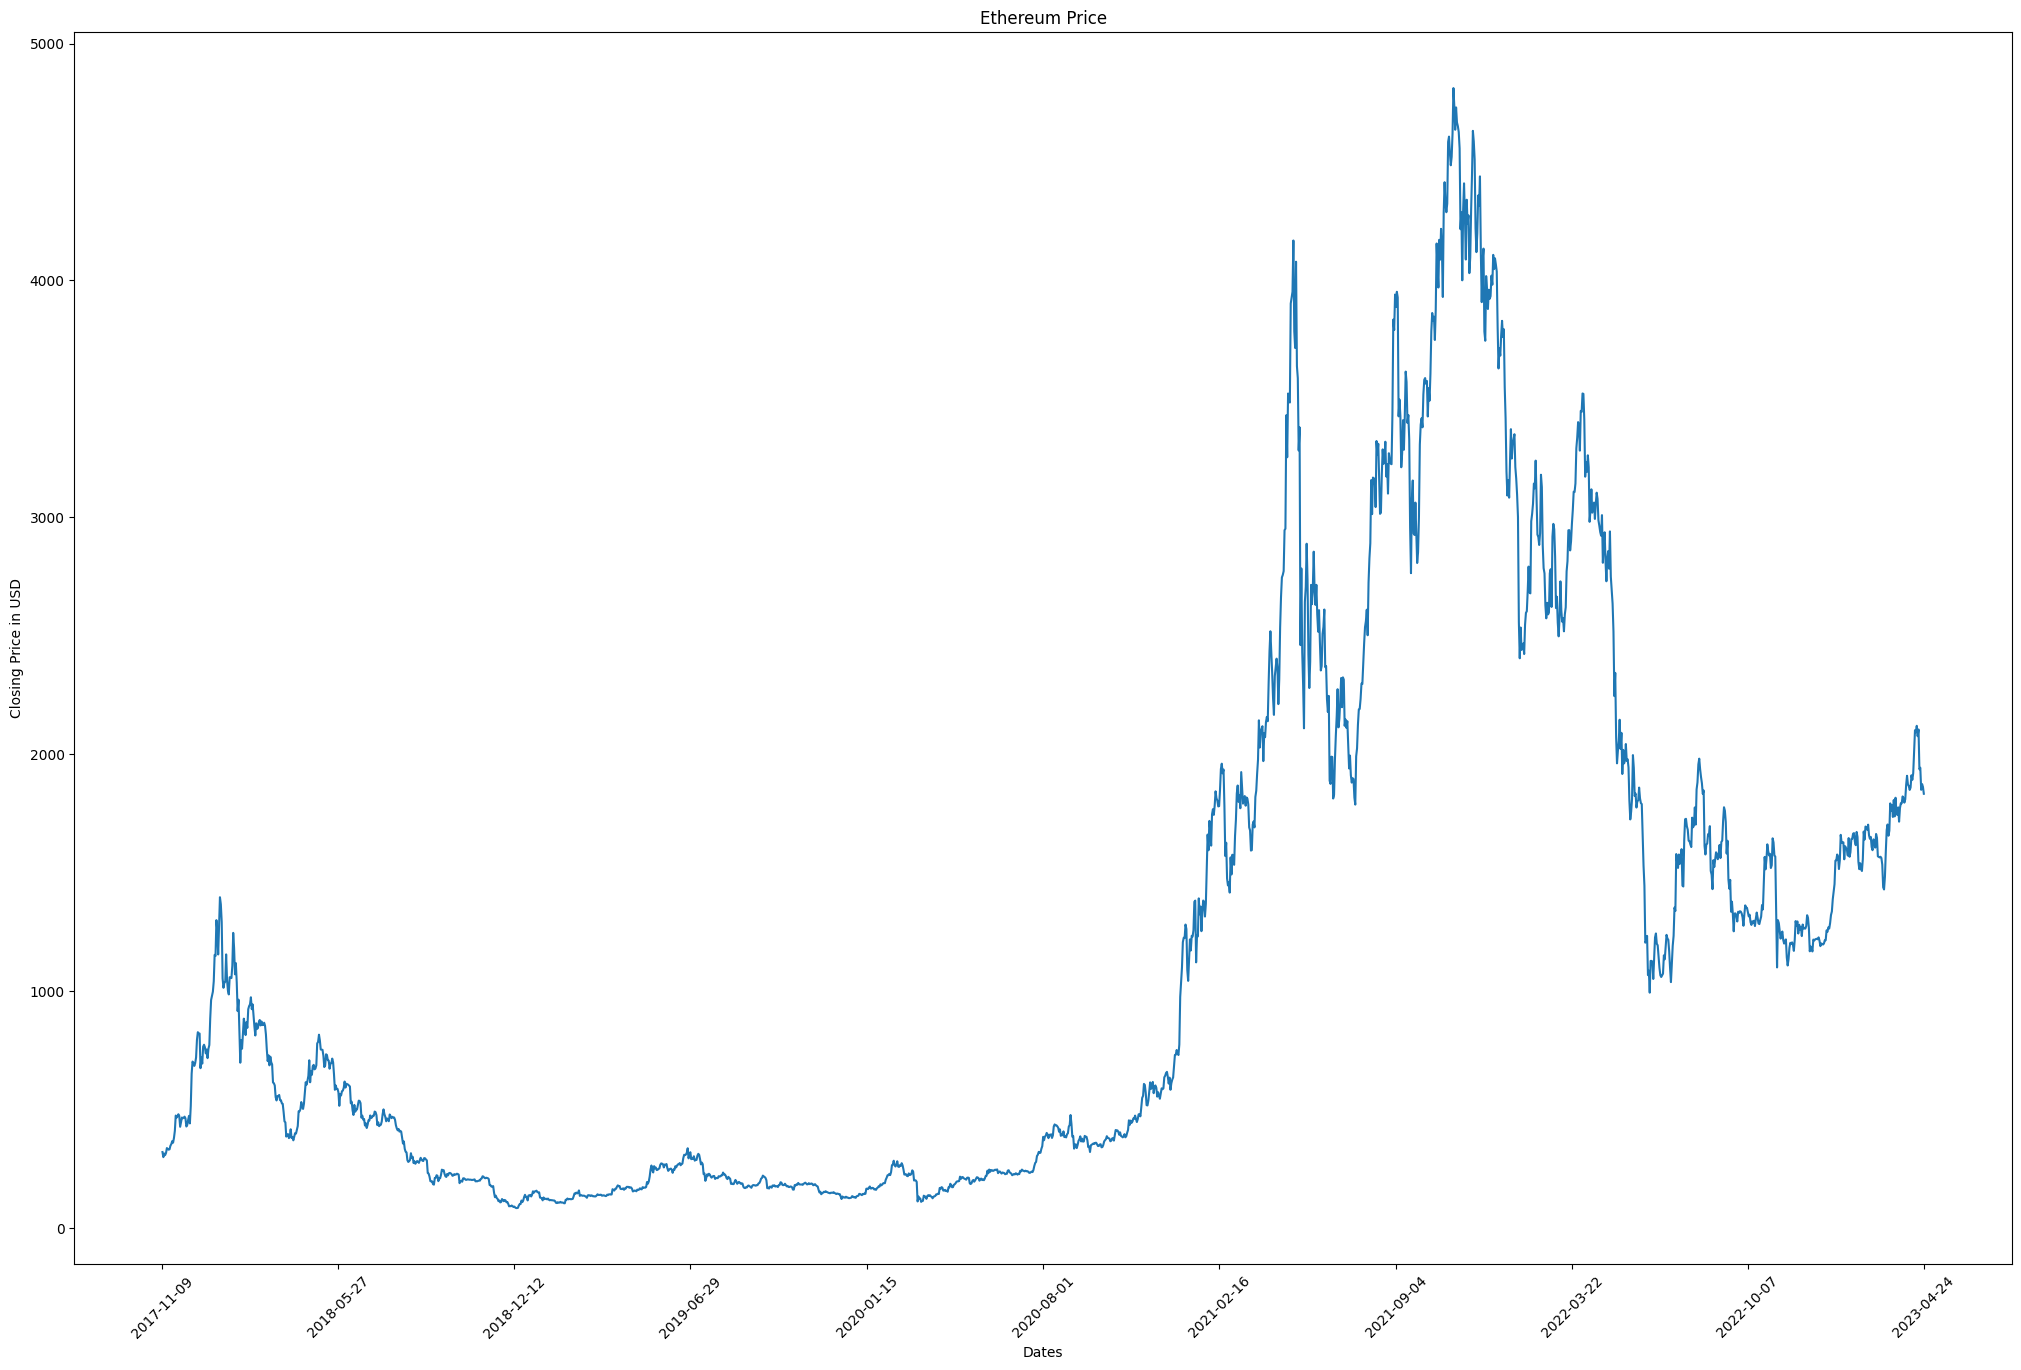

In [6]:
# Plot the graph of the Ethereum price list.
from matplotlib import pyplot as plt

# Manually specify the x-ticks and labels of the pyplot. Consider dividing the plot into 11 sections.
# Except the first and last x-tick, multiply by 0.1 each and add up 0.1 for every subsequent x-tick
# until the x-tick before the very last one. Be sure to convert into integer or else an error will be thrown.
date_xtick = [0, int(len(dataset)*0.1), int(len(dataset)*0.2), int(len(dataset)*0.3), int(len(dataset)*0.4), int(len(dataset)*0.5),
              int(len(dataset)*0.6), int(len(dataset)*0.7), int(len(dataset)*0.8), int(len(dataset)*0.9), int(len(dataset)-1)]
date_label = [dataset['Date'].iloc[0], dataset['Date'].iloc[int(len(dataset)*0.1)], dataset['Date'].iloc[int(len(dataset)*0.2)],
              dataset['Date'].iloc[int(len(dataset)*0.3)], dataset['Date'].iloc[int(len(dataset)*0.4)], dataset['Date'].iloc[int(len(dataset)*0.5)],
              dataset['Date'].iloc[int(len(dataset)*0.6)], dataset['Date'].iloc[int(len(dataset)*0.7)], dataset['Date'].iloc[int(len(dataset)*0.8)],
              dataset['Date'].iloc[int(len(dataset)*0.9)], dataset['Date'].iloc[int(len(dataset)-1)]] # Manually set up the dates for the x-axis.
plt.figure(figsize=(25, 16)) # Make the plot appear larger for better clarity.
plt.plot(dataset['Close'])
plt.xticks(date_xtick, date_label, rotation=45)
plt.title("Ethereum Price")
plt.xlabel("Dates")
plt.ylabel("Closing Price in USD")
plt.show()

In [7]:
# Save the original data columns for later use.
#original_data = dataset[['Date', 'Open']]
#original_data = dataset[['Date', 'High']]
#original_data = dataset[['Date', 'Low']]
original_data = dataset[['Date', 'Close']]
print("Shape of original data: {}".format(original_data.shape))

Shape of original data: (1993, 2)


In [8]:
# Be sure to import skicit and numpy as they will be needed for data preparation.
from sklearn import *
import numpy as np

In [9]:
# Choose which column to focus on for price prediction.
#column_data = dataset['Open']
#column_data = dataset['High']
#column_data = dataset['Low']
column_data = dataset['Close']

In [10]:
# Select the number of time steps to perform when creating the features and labels
# from the training and test sets.
num_steps = 30
# num_steps = 60
# num_steps = 90
# num_steps = 180

In [11]:
def prepare_dataset(data, input_date):
  # Divide the dataset into training and test sets based on the specified date.
  training_data = data.loc[(data['Date'] < input_date)]
  test_data = data.loc[(data['Date'] >= input_date)]

  print("Shape of training and test data: {} and {}".format(training_data.shape, test_data.shape))

  return training_data, test_data

In [12]:
training_data, test_data = prepare_dataset(original_data, "2022-04-01")
training_data = training_data.drop(['Date'], axis=1)
test_data = test_data.drop(['Date'], axis=1)

Shape of training and test data: (1604, 2) and (389, 2)


In [13]:
# Now normalize the training and test data.
normalizer = preprocessing.MinMaxScaler()
training_normalized = normalizer.fit_transform(np.array(training_data).reshape(-1, 1))
test_normalized = normalizer.fit_transform(np.array(test_data).reshape(-1, 1)) 

In [14]:
print(training_data)

            Close
0      320.884003
1      299.252991
2      314.681000
3      307.907990
4      316.716003
...           ...
1599  3291.577637
1600  3336.634521
1601  3401.987793
1602  3385.157959
1603  3281.642822

[1604 rows x 1 columns]


In [15]:
# Split the training and test datasets into features and labels.
# Features will be the input for the neural network model, and examples can be
# date and opening price. Labels will be the output, like predicting the future
# closing price.
feature_training, feature_test, label_training, label_test = [], [], [], []

In [16]:
# This function assigns the features and labels from the training and test datasets.
def data_to_features_and_labels(train, train_len, test, test_len, time_steps=1):
  x_train, x_test, y_train, y_test = [], [], [], []
  for i in range(time_steps, train_len):
    x_train.append(train[i-time_steps:i])
    y_train.append(train[i, 0])
  for j in range(time_steps, test_len):
    x_test.append(test[j-time_steps:j])
    y_test.append(test[j, 0])
  return np.array(x_train), np.array(x_test), np.array(y_train), np.array(y_test)

In [17]:
feature_training, feature_test, label_training, label_test = data_to_features_and_labels(training_normalized, training_normalized.shape[0],
                                                                                         test_normalized, test_normalized.shape[0], num_steps)

In [18]:
# Inspect the shapes of the features and labels.
print("Features of training data: ", feature_training.shape)
print("Labels of training data: ", label_training.shape)
print("Features of test data: ", feature_test.shape)
print("Labels of test data: ", label_test.shape)

Features of training data:  (1574, 30, 1)
Labels of training data:  (1574,)
Features of test data:  (359, 30, 1)
Labels of test data:  (359,)


In [19]:
from tensorflow import keras as tf # Import the TensorFlow library.

# Models for the ETH price prediction experiment

## For hybrid models using CNN, always be sure to place any layers right after the pooling section. Following that, flatten the entire model before the Dense layer of 1 unit.

In [20]:
callback = tf.callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

In [21]:
# Plot the loss for the training set.
def plot_loss(plot1, plot2, plot_name="Mean Squared Error for Training"):
  plt.figure(figsize=(12, 8)) # Make the plot appear larger for better clarity.
  plt.plot(plot1, label="Loss")
  plt.plot(plot2, label="Validation loss")
  plt.title(plot_name)
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

# Plot the obtained training prediction and compare with the actual training data.
def plot_result_train(actual, predicted, dataset, name="Predicted VS Actual"):
  plt.figure(figsize=(12, 8))
  plt.title(name)
  actual_data = normalizer.inverse_transform(actual.reshape(-1, 1))
  # Create a new dataframe.
  result_data = pd.DataFrame({'Dates': dataset.loc[num_steps:len(actual)+num_steps-1, 'Date'],
                 'Actual Price': actual_data.tolist(),
                 'Predicted Price': predicted.tolist()})
  plt.plot(dataset.loc[num_steps:len(actual)+num_steps-1, 'Date'], actual_data, label="Actual price")
  plt.plot(dataset.loc[num_steps:len(actual)+num_steps-1, 'Date'], predicted, label="Predicted price")
  # Now plot the actual dataframe.
  print(result_data)
  plt.xticks(np.arange(0, actual.shape[0], 60), rotation=45)
  plt.xlabel("Dates")
  #plt.ylabel("Opening Price in USD")
  #plt.ylabel("Highest Price in USD")
  #plt.ylabel("Lowest Price in USD")
  plt.ylabel("Closing Price in USD")
  plt.legend()
  plt.show()

def plot_result_test(actual, predicted, start_len, dataset, name="Predicted VS Actual"):
  # When plotting the actual test data and predicted test data, be sure to
  # adjust the starting x-axis by shifting them with time steps and the length
  # of the training data.
  plt.figure(figsize=(12, 8))
  plt.title(name)
  actual_data = normalizer.inverse_transform(actual.reshape(-1, 1))
  # Create a new dataframe.
  result_data = pd.DataFrame({'Dates': dataset.loc[start_len+(2*num_steps):(len(dataset)-1), 'Date'],
                 'Actual Price': actual_data.tolist(),
                 'Predicted Price': predicted.tolist()})
  plt.plot(dataset.loc[start_len+(2*num_steps):(len(dataset)-1), 'Date'], actual_data, label="Actual price")
  plt.plot(dataset.loc[start_len+(2*num_steps):(len(dataset)-1), 'Date'], predicted, label="Predicted price")
  # Now plot the actual dataframe.
  print(result_data)
  plt.xticks(np.arange(0, actual.shape[0], 60), rotation=45)
  plt.xlabel("Dates")
  #plt.ylabel("Opening Price in USD")
  #plt.ylabel("Highest Price in USD")
  #plt.ylabel("Lowest Price in USD")
  plt.ylabel("Closing Price in USD")
  plt.legend()
  plt.show()

# Baseline Model

## BiLSTM

In [22]:
# Build a bidirectional LSTM model.
bilstm_model = tf.models.Sequential()
bilstm_model.add(tf.layers.Bidirectional(tf.layers.LSTM(units=128, activation='relu', input_shape=(num_steps, 1), return_sequences=True)))
bilstm_model.add(tf.layers.Bidirectional(tf.layers.LSTM(units=128, return_sequences=True)))
bilstm_model.add(tf.layers.Bidirectional(tf.layers.LSTM(units=128, return_sequences=True)))
bilstm_model.add(tf.layers.Bidirectional(tf.layers.LSTM(units=128, return_sequences=True)))
bilstm_model.add(tf.layers.Bidirectional(tf.layers.LSTM(units=128)))
bilstm_model.add(tf.layers.Dense(1))
bilstm_model.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(),
                     metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), tf.metrics.RootMeanSquaredError()])

In [23]:
train_result = bilstm_model.fit(x=feature_training, y=label_training, validation_data=(feature_test, label_test),
                                  epochs=100, verbose=1, callbacks=[callback], shuffle=True) # Fit the model.

Epoch 1/100
50/50 [==============================] - 36s 226ms/step - loss: 0.0090 - mean_squared_error: 0.0090 - mean_absolute_error: 0.0486 - root_mean_squared_error: 0.0950 - val_loss: 0.0137 - val_mean_squared_error: 0.0137 - val_mean_absolute_error: 0.0846 - val_root_mean_squared_error: 0.1172
Epoch 2/100
50/50 [==============================] - 8s 171ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - mean_absolute_error: 0.0347 - root_mean_squared_error: 0.0570 - val_loss: 0.0116 - val_mean_squared_error: 0.0116 - val_mean_absolute_error: 0.0780 - val_root_mean_squared_error: 0.1078
Epoch 3/100
50/50 [==============================] - 6s 127ms/step - loss: 0.0025 - mean_squared_error: 0.0025 - mean_absolute_error: 0.0281 - root_mean_squared_error: 0.0503 - val_loss: 0.0109 - val_mean_squared_error: 0.0109 - val_mean_absolute_error: 0.0755 - val_root_mean_squared_error: 0.1044
Epoch 4/100
50/50 [==============================] - 8s 171ms/step - loss: 0.0021 - mean_squared_error

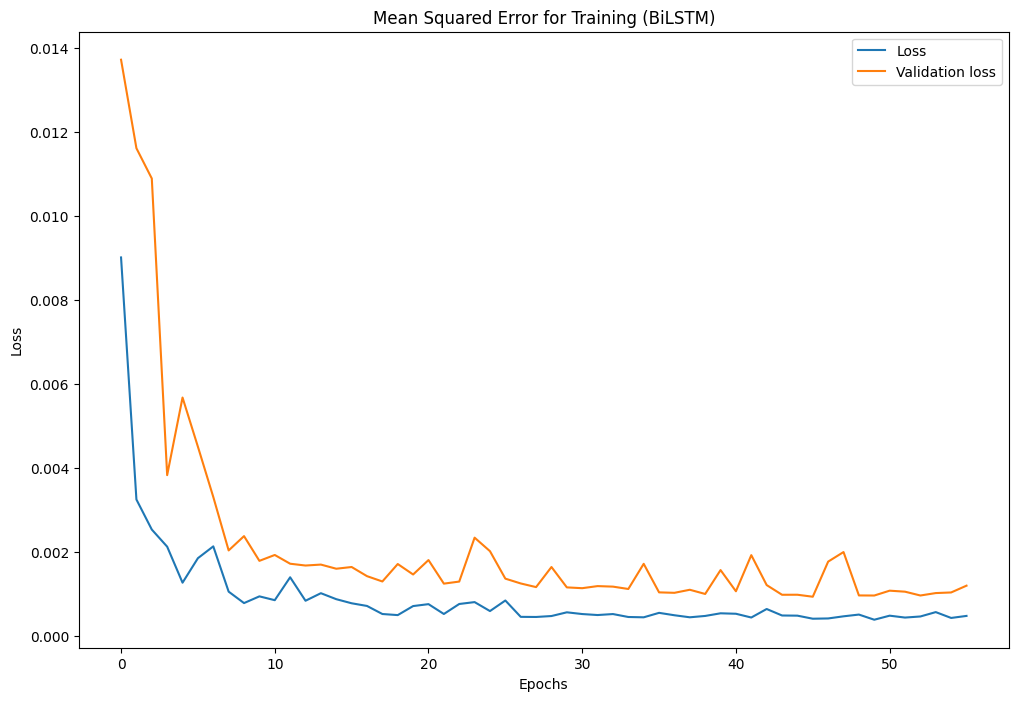

In [24]:
# Plot the loss for the training set.
plot_loss(train_result.history['loss'], train_result.history['val_loss'], "Mean Squared Error for Training (BiLSTM)")

In [25]:
bilstm_model.evaluate(x=feature_test, y=label_test, verbose=1) # Now evaluate the model.

12/12 [==============================] - 0s 33ms/step - loss: 9.2870e-04 - mean_squared_error: 9.2870e-04 - mean_absolute_error: 0.0213 - root_mean_squared_error: 0.0305


[0.0009287046850658953,
 0.0009287046850658953,
 0.02131582796573639,
 0.030474655330181122]

In [26]:
# Now try to predict the training and test values.
training_predict = bilstm_model.predict(feature_training)
test_predict = bilstm_model.predict(feature_test)

12/12 [==============================] - 0s 19ms/step


In [27]:
# Restore the training and test datasets' original shapes.
training_result_bilstm = normalizer.inverse_transform(training_predict.reshape(-1, 1))
test_result_bilstm = normalizer.inverse_transform(test_predict.reshape(-1, 1))

           Dates          Actual Price       Predicted Price
30    2017-12-09   [1201.841827525211]    [1190.06298828125]
31    2017-12-10  [1184.8400991863457]  [1195.3280029296875]
32    2017-12-11  [1224.1145485841962]  [1193.6768798828125]
33    2017-12-12  [1297.0276373650145]   [1207.008544921875]
34    2017-12-13  [1324.4906040502817]   [1246.394287109375]
...          ...                   ...                   ...
1599  2022-03-27  [2709.4138716771517]    [2589.00341796875]
1600  2022-03-28  [2733.5177311196053]   [2644.206787109375]
1601  2022-03-29  [2768.4794493421177]    [2681.89990234375]
1602  2022-03-30  [2759.4760758914417]   [2717.806884765625]
1603  2022-03-31   [2704.099092600401]    [2724.70166015625]

[1574 rows x 3 columns]


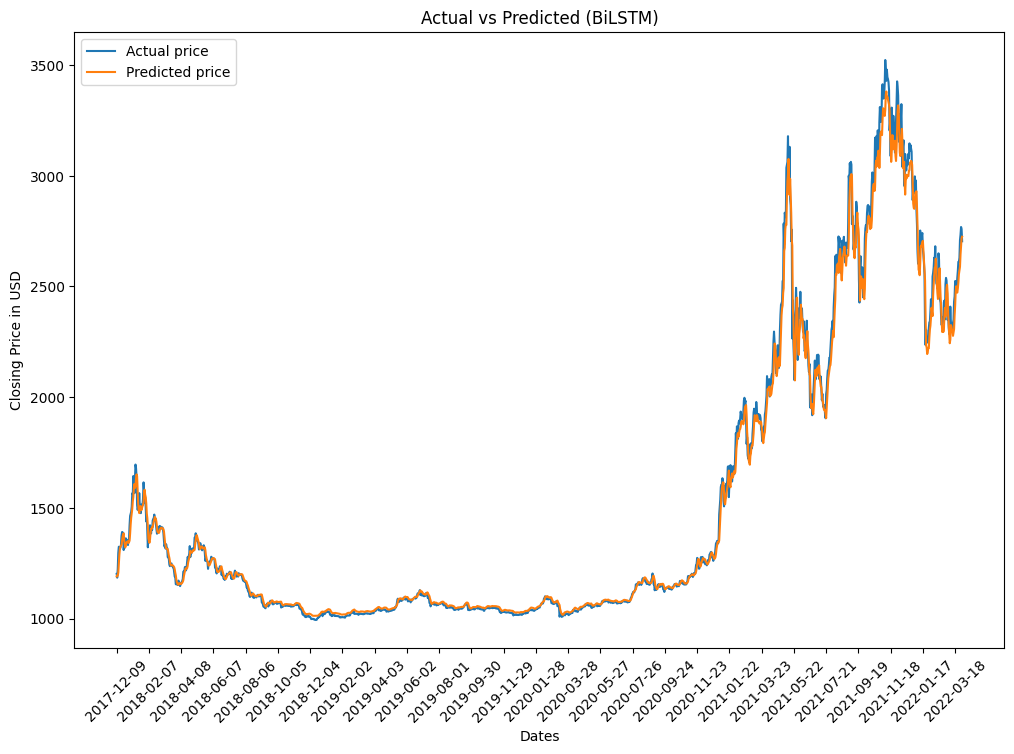

In [28]:
# Plot the obtained training prediction and compare with the actual training data.
plot_result_train(label_training, training_result_bilstm, original_data, "Actual vs Predicted (BiLSTM)")

           Dates          Actual Price       Predicted Price
1634  2022-05-01         [2827.756104]    [2724.89794921875]
1635  2022-05-02           [2857.4104]    [2747.72900390625]
1636  2022-05-03         [2783.476318]   [2783.863037109375]
1637  2022-05-04         [2940.644775]   [2762.284423828125]
1638  2022-05-05         [2749.213135]    [2841.33056640625]
...          ...                   ...                   ...
1988  2023-04-20         [1943.097656]  [1981.8389892578125]
1989  2023-04-21         [1849.999878]   [1931.823486328125]
1990  2023-04-22  [1874.2286380000003]   [1858.304931640625]
1991  2023-04-23         [1862.062012]  [1831.5006103515625]
1992  2023-04-24         [1833.186401]   [1819.915771484375]

[359 rows x 3 columns]


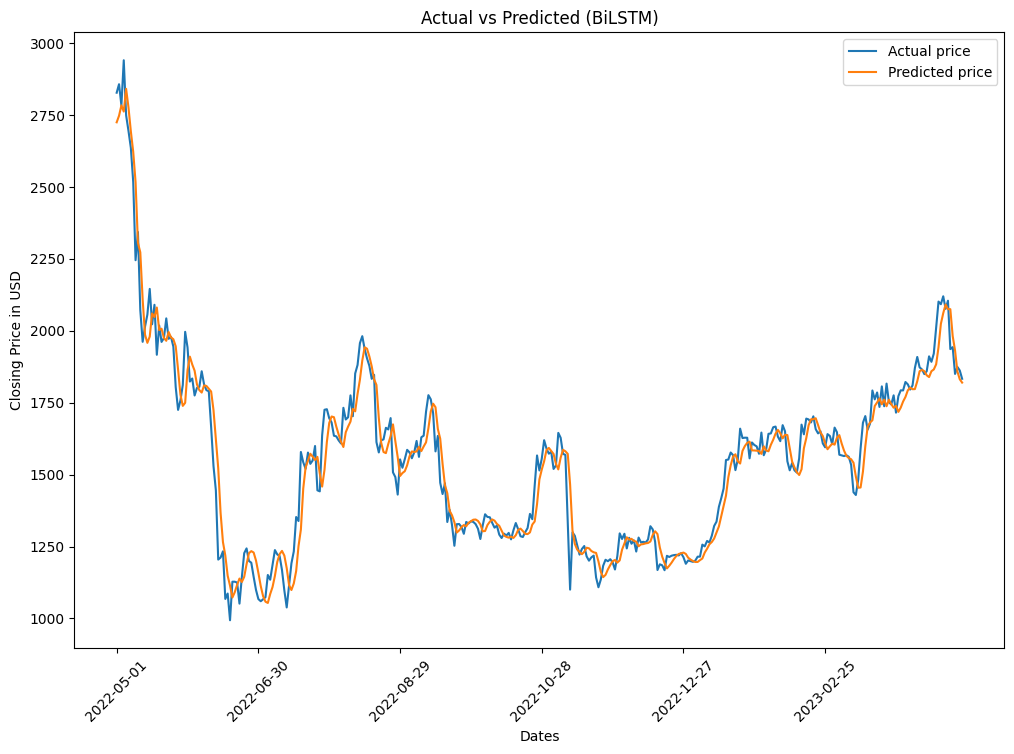

In [29]:
plot_result_test(label_test, test_result_bilstm, label_training.shape[0], original_data, "Actual vs Predicted (BiLSTM)")

In [30]:
tf.backend.clear_session() # Be sure to clear the backend session afterwards.

## BiGRU

In [31]:
# Build a bidirectional GRU model.
bigru_model = tf.models.Sequential()
bigru_model.add(tf.layers.Bidirectional(tf.layers.GRU(units=128, activation='relu', input_shape=(num_steps, 1), return_sequences=True)))
bigru_model.add(tf.layers.Bidirectional(tf.layers.GRU(units=128, return_sequences=True)))
bigru_model.add(tf.layers.Bidirectional(tf.layers.GRU(units=128, return_sequences=True)))
bigru_model.add(tf.layers.Bidirectional(tf.layers.GRU(units=128, return_sequences=True)))
bigru_model.add(tf.layers.Bidirectional(tf.layers.GRU(units=128)))
bigru_model.add(tf.layers.Dense(1))
bigru_model.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(),
                     metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), tf.metrics.RootMeanSquaredError()])

In [32]:
train_result = bigru_model.fit(x=feature_training, y=label_training, validation_data=(feature_test, label_test),
                                  epochs=100, verbose=1, callbacks=[callback], shuffle=True) # Fit the model.

Epoch 1/100
50/50 [==============================] - 32s 229ms/step - loss: 0.0086 - mean_squared_error: 0.0086 - mean_absolute_error: 0.0519 - root_mean_squared_error: 0.0925 - val_loss: 0.0024 - val_mean_squared_error: 0.0024 - val_mean_absolute_error: 0.0364 - val_root_mean_squared_error: 0.0494
Epoch 2/100
50/50 [==============================] - 10s 196ms/step - loss: 9.4360e-04 - mean_squared_error: 9.4360e-04 - mean_absolute_error: 0.0180 - root_mean_squared_error: 0.0307 - val_loss: 0.0021 - val_mean_squared_error: 0.0021 - val_mean_absolute_error: 0.0332 - val_root_mean_squared_error: 0.0454
Epoch 3/100
50/50 [==============================] - 10s 199ms/step - loss: 7.7026e-04 - mean_squared_error: 7.7026e-04 - mean_absolute_error: 0.0156 - root_mean_squared_error: 0.0278 - val_loss: 0.0018 - val_mean_squared_error: 0.0018 - val_mean_absolute_error: 0.0303 - val_root_mean_squared_error: 0.0428
Epoch 4/100
50/50 [==============================] - 7s 150ms/step - loss: 8.0924e-0

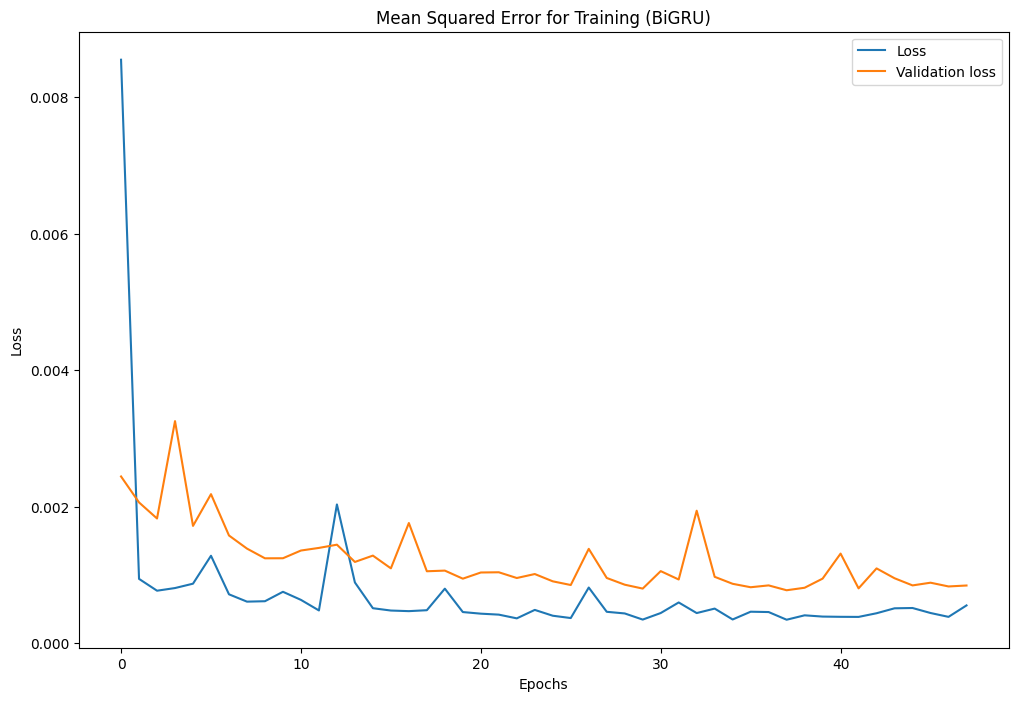

In [33]:
# Plot the loss for the training set.
plot_loss(train_result.history['loss'], train_result.history['val_loss'], "Mean Squared Error for Training (BiGRU)")

In [34]:
bigru_model.evaluate(x=feature_test, y=label_test, verbose=1) # Now evaluate the model.

12/12 [==============================] - 0s 24ms/step - loss: 7.7692e-04 - mean_squared_error: 7.7692e-04 - mean_absolute_error: 0.0191 - root_mean_squared_error: 0.0279


[0.0007769224466755986,
 0.0007769224466755986,
 0.019097886979579926,
 0.0278733279556036]

In [35]:
# Now try to predict the training and test values.
training_predict = bigru_model.predict(feature_training)
test_predict = bigru_model.predict(feature_test)

12/12 [==============================] - 0s 19ms/step


In [36]:
# Restore the training and test datasets' original shapes.
training_result_bigru = normalizer.inverse_transform(training_predict.reshape(-1, 1))
test_result_bigru = normalizer.inverse_transform(test_predict.reshape(-1, 1))

           Dates          Actual Price       Predicted Price
30    2017-12-09   [1201.841827525211]  [1198.7430419921875]
31    2017-12-10  [1184.8400991863457]    [1207.38427734375]
32    2017-12-11  [1224.1145485841962]  [1202.3526611328125]
33    2017-12-12  [1297.0276373650145]  [1220.0379638671875]
34    2017-12-13  [1324.4906040502817]  [1269.5863037109375]
...          ...                   ...                   ...
1599  2022-03-27  [2709.4138716771517]      [2615.908203125]
1600  2022-03-28  [2733.5177311196053]   [2688.475830078125]
1601  2022-03-29  [2768.4794493421177]   [2715.628173828125]
1602  2022-03-30  [2759.4760758914417]     [2743.0771484375]
1603  2022-03-31   [2704.099092600401]   [2734.532470703125]

[1574 rows x 3 columns]


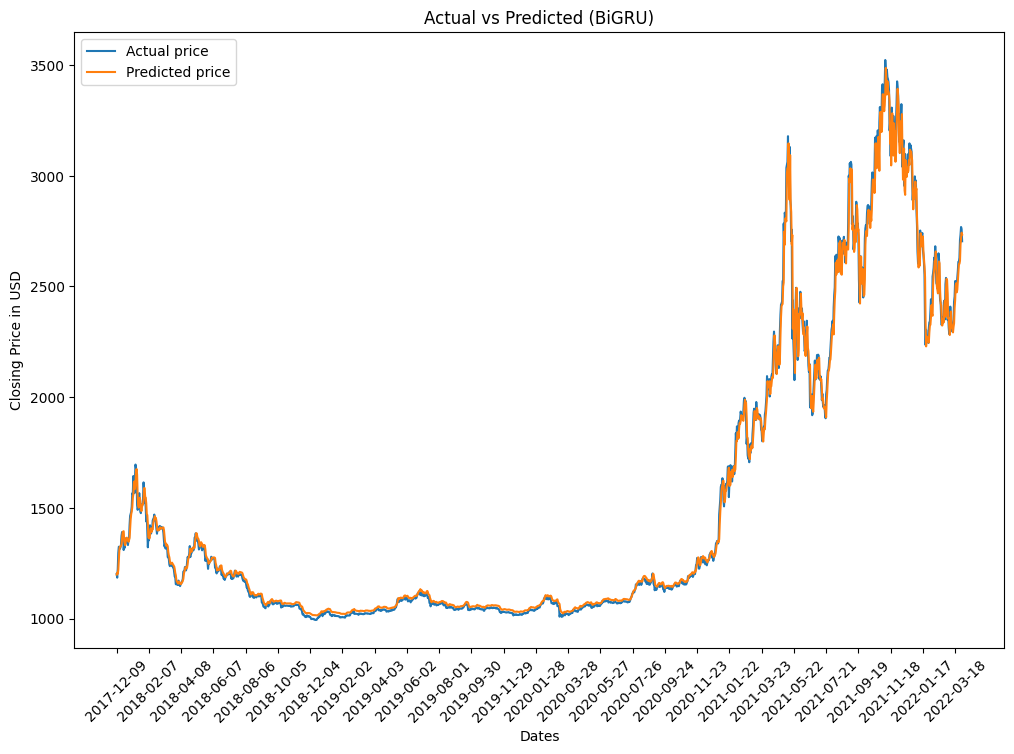

In [37]:
# Plot the obtained training prediction and compare with the actual training data.
plot_result_train(label_training, training_result_bigru, original_data, "Actual vs Predicted (BiGRU)")

           Dates          Actual Price       Predicted Price
1634  2022-05-01         [2827.756104]     [2702.3310546875]
1635  2022-05-02           [2857.4104]    [2787.64794921875]
1636  2022-05-03         [2783.476318]   [2827.168701171875]
1637  2022-05-04         [2940.644775]   [2759.610107421875]
1638  2022-05-05         [2749.213135]   [2906.239990234375]
...          ...                   ...                   ...
1988  2023-04-20         [1943.097656]     [1966.0263671875]
1989  2023-04-21         [1849.999878]  [1936.2816162109375]
1990  2023-04-22  [1874.2286380000003]  [1867.2264404296875]
1991  2023-04-23         [1862.062012]  [1866.6895751953125]
1992  2023-04-24         [1833.186401]    [1862.60205078125]

[359 rows x 3 columns]


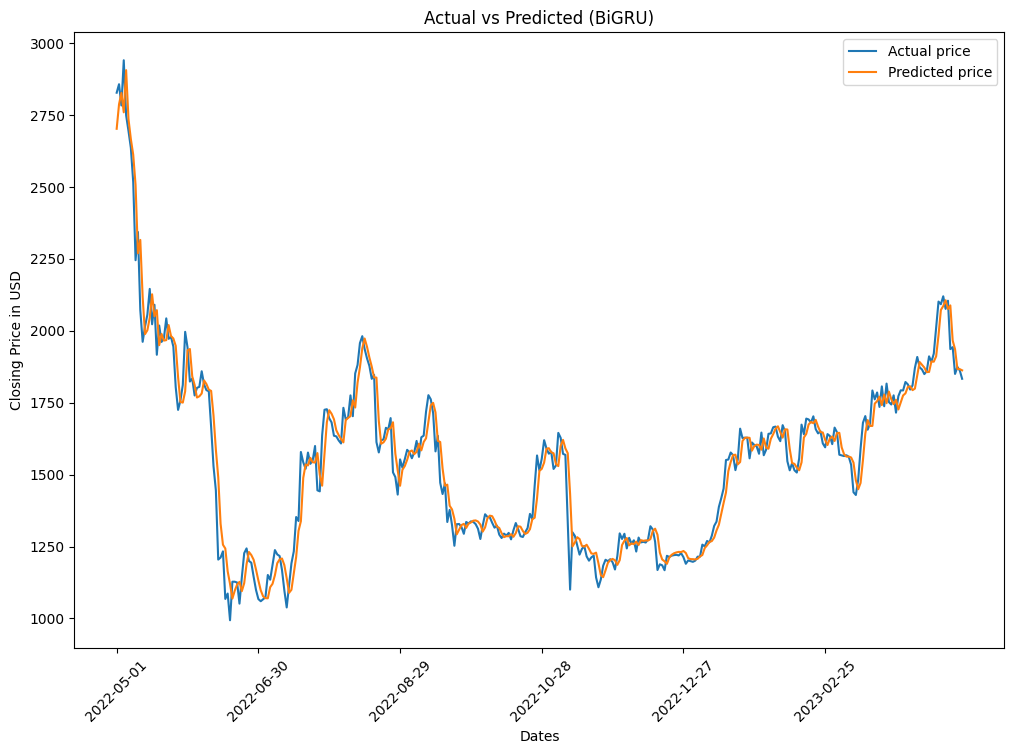

In [38]:
plot_result_test(label_test, test_result_bigru, label_training.shape[0], original_data, "Actual vs Predicted (BiGRU)")

In [39]:
tf.backend.clear_session() # Be sure to clear the backend session afterwards.

## 1-D CNN LSTM

In [40]:
# Combine 1-D CNN and LSTM together.
cnn1d_lstm_model = tf.models.Sequential()
cnn1d_lstm_model.add(tf.layers.Conv1D(filters=30, kernel_size=3, activation='relu', input_shape=(num_steps, 1)))
cnn1d_lstm_model.add(tf.layers.Conv1D(filters=30, kernel_size=3))
cnn1d_lstm_model.add(tf.layers.Conv1D(filters=30, kernel_size=3))
cnn1d_lstm_model.add(tf.layers.AveragePooling1D())
cnn1d_lstm_model.add(tf.layers.LSTM(units=128, activation='relu', return_sequences=True))
cnn1d_lstm_model.add(tf.layers.LSTM(units=128, return_sequences=True))
cnn1d_lstm_model.add(tf.layers.LSTM(units=128))
cnn1d_lstm_model.add(tf.layers.Flatten())
cnn1d_lstm_model.add(tf.layers.Dense(1))
cnn1d_lstm_model.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(),
                         metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), tf.metrics.RootMeanSquaredError()])
cnn1d_lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 28, 30)            120       
                                                                 
 conv1d_1 (Conv1D)           (None, 26, 30)            2730      
                                                                 
 conv1d_2 (Conv1D)           (None, 24, 30)            2730      
                                                                 
 average_pooling1d (AverageP  (None, 12, 30)           0         
 ooling1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 12, 128)           81408     
                                                                 
 lstm_1 (LSTM)               (None, 12, 128)           131584    
                                                        

In [41]:
train_result = cnn1d_lstm_model.fit(x=feature_training, y=label_training, validation_data=(feature_test, label_test),
                                  epochs=100, verbose=1, callbacks=[callback], shuffle=True) # Fit the model.

Epoch 1/100
50/50 [==============================] - 15s 63ms/step - loss: 0.0131 - mean_squared_error: 0.0131 - mean_absolute_error: 0.0644 - root_mean_squared_error: 0.1146 - val_loss: 0.0093 - val_mean_squared_error: 0.0093 - val_mean_absolute_error: 0.0753 - val_root_mean_squared_error: 0.0962
Epoch 2/100
50/50 [==============================] - 4s 73ms/step - loss: 0.0036 - mean_squared_error: 0.0036 - mean_absolute_error: 0.0361 - root_mean_squared_error: 0.0603 - val_loss: 0.0110 - val_mean_squared_error: 0.0110 - val_mean_absolute_error: 0.0793 - val_root_mean_squared_error: 0.1047
Epoch 3/100
50/50 [==============================] - 2s 43ms/step - loss: 0.0031 - mean_squared_error: 0.0031 - mean_absolute_error: 0.0328 - root_mean_squared_error: 0.0558 - val_loss: 0.0085 - val_mean_squared_error: 0.0085 - val_mean_absolute_error: 0.0712 - val_root_mean_squared_error: 0.0924
Epoch 4/100
50/50 [==============================] - 2s 38ms/step - loss: 0.0030 - mean_squared_error: 0.

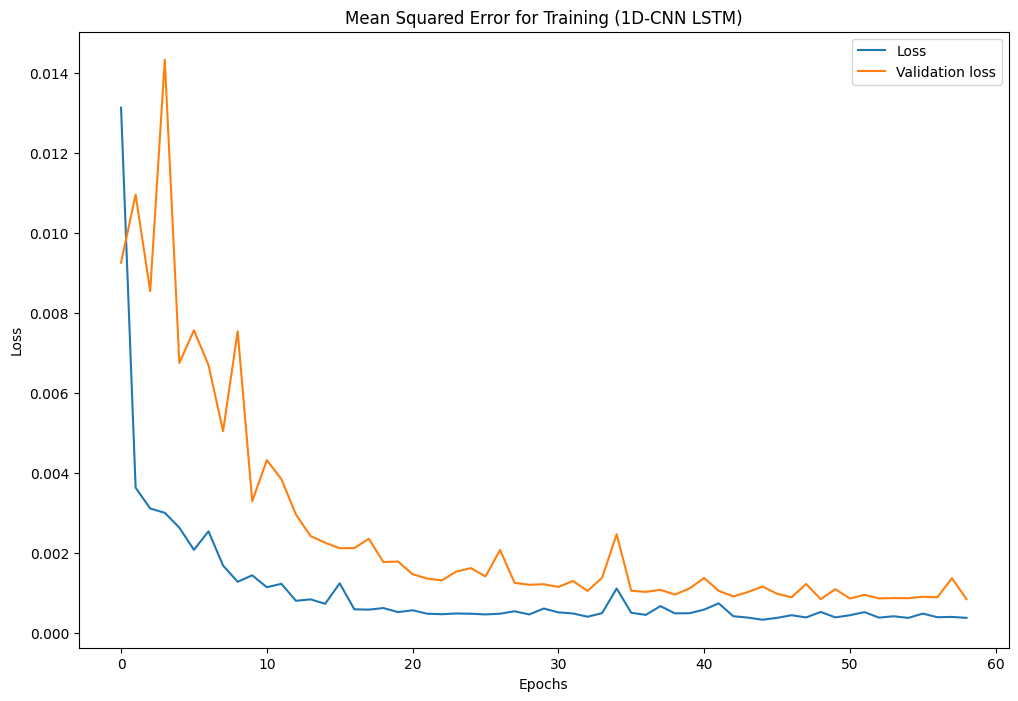

In [42]:
# Plot the loss for the training set.
plot_loss(train_result.history['loss'], train_result.history['val_loss'], "Mean Squared Error for Training (1D-CNN LSTM)")

In [43]:
cnn1d_lstm_model.evaluate(x=feature_test, y=label_test, verbose=1) # Now evaluate the model.

12/12 [==============================] - 0s 12ms/step - loss: 8.4991e-04 - mean_squared_error: 8.4991e-04 - mean_absolute_error: 0.0209 - root_mean_squared_error: 0.0292


[0.0008499073446728289,
 0.0008499073446728289,
 0.020899493247270584,
 0.029153170064091682]

In [44]:
# Now try to predict the training and test values.
training_predict = cnn1d_lstm_model.predict(feature_training)
test_predict = cnn1d_lstm_model.predict(feature_test)

12/12 [==============================] - 0s 8ms/step


In [45]:
# Restore the training and test datasets' original shapes.
training_result_cnn1d_lstm = normalizer.inverse_transform(training_predict.reshape(-1, 1))
test_result_cnn1d_lstm = normalizer.inverse_transform(test_predict.reshape(-1, 1))

           Dates          Actual Price       Predicted Price
30    2017-12-09   [1201.841827525211]  [1186.3858642578125]
31    2017-12-10  [1184.8400991863457]  [1200.4437255859375]
32    2017-12-11  [1224.1145485841962]  [1198.7325439453125]
33    2017-12-12  [1297.0276373650145]  [1209.3995361328125]
34    2017-12-13  [1324.4906040502817]   [1269.996826171875]
...          ...                   ...                   ...
1599  2022-03-27  [2709.4138716771517]   [2588.787353515625]
1600  2022-03-28  [2733.5177311196053]    [2670.73583984375]
1601  2022-03-29  [2768.4794493421177]   [2723.050048828125]
1602  2022-03-30  [2759.4760758914417]   [2740.373291015625]
1603  2022-03-31   [2704.099092600401]   [2737.193603515625]

[1574 rows x 3 columns]


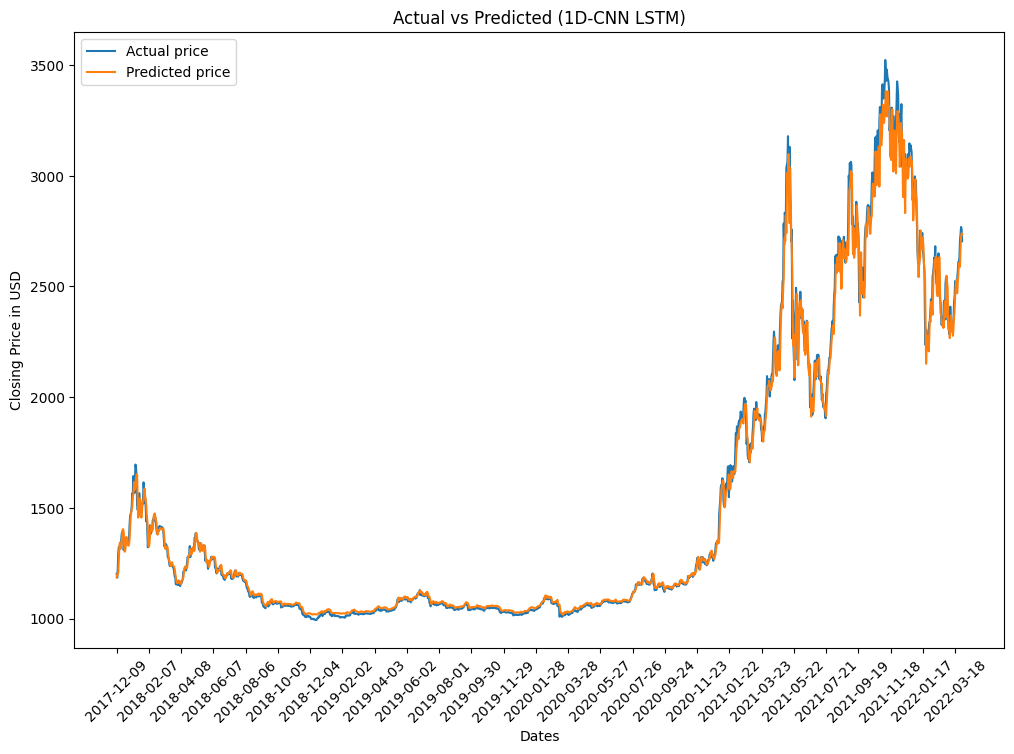

In [46]:
# Plot the obtained training prediction and compare with the actual training data.
plot_result_train(label_training, training_result_cnn1d_lstm, original_data, "Actual vs Predicted (1D-CNN LSTM)")

           Dates          Actual Price       Predicted Price
1634  2022-05-01         [2827.756104]     [2677.6611328125]
1635  2022-05-02           [2857.4104]   [2762.348388671875]
1636  2022-05-03         [2783.476318]   [2836.665771484375]
1637  2022-05-04         [2940.644775]     [2800.3935546875]
1638  2022-05-05         [2749.213135]      [2890.271484375]
...          ...                   ...                   ...
1988  2023-04-20         [1943.097656]  [1998.1983642578125]
1989  2023-04-21         [1849.999878]  [1920.5181884765625]
1990  2023-04-22  [1874.2286380000003]  [1876.4400634765625]
1991  2023-04-23         [1862.062012]  [1836.8328857421875]
1992  2023-04-24         [1833.186401]   [1868.488037109375]

[359 rows x 3 columns]


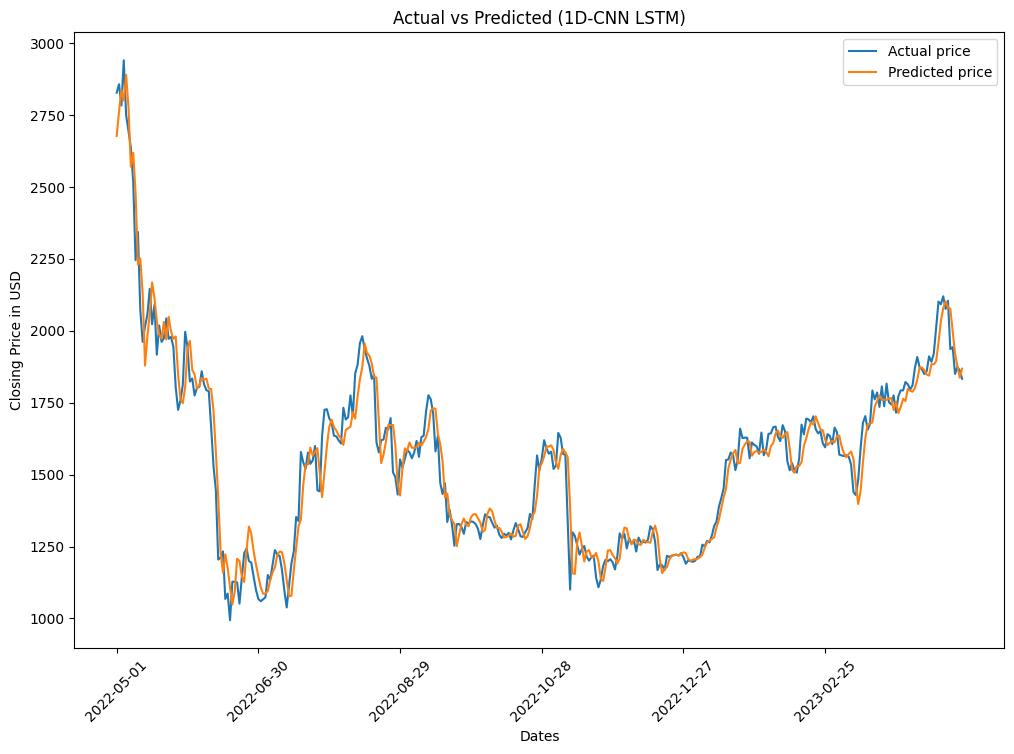

In [47]:
plot_result_test(label_test, test_result_cnn1d_lstm, label_training.shape[0], original_data, "Actual vs Predicted (1D-CNN LSTM)")

In [48]:
tf.backend.clear_session() # Be sure to clear the backend session afterwards.

## 1-D CNN GRU

In [49]:
# Combine 1-D CNN and GRU together.
cnn1d_gru_model = tf.models.Sequential()
cnn1d_gru_model.add(tf.layers.Conv1D(filters=30, kernel_size=3, activation='relu', input_shape=(num_steps, 1)))
cnn1d_gru_model.add(tf.layers.Conv1D(filters=30, kernel_size=3))
cnn1d_gru_model.add(tf.layers.Conv1D(filters=30, kernel_size=3))
cnn1d_gru_model.add(tf.layers.AveragePooling1D())
cnn1d_gru_model.add(tf.layers.GRU(units=128, activation='relu', return_sequences=True))
cnn1d_gru_model.add(tf.layers.GRU(units=128, return_sequences=True))
cnn1d_gru_model.add(tf.layers.GRU(units=128))
cnn1d_gru_model.add(tf.layers.Flatten())
cnn1d_gru_model.add(tf.layers.Dense(1))
cnn1d_gru_model.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(),
                        metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), tf.metrics.RootMeanSquaredError()])
cnn1d_gru_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 28, 30)            120       
                                                                 
 conv1d_1 (Conv1D)           (None, 26, 30)            2730      
                                                                 
 conv1d_2 (Conv1D)           (None, 24, 30)            2730      
                                                                 
 average_pooling1d (AverageP  (None, 12, 30)           0         
 ooling1D)                                                       
                                                                 
 gru (GRU)                   (None, 12, 128)           61440     
                                                                 
 gru_1 (GRU)                 (None, 12, 128)           99072     
                                                        

In [50]:
train_result = cnn1d_gru_model.fit(x=feature_training, y=label_training, validation_data=(feature_test, label_test),
                                  epochs=100, verbose=1, callbacks=[callback], shuffle=True) # Fit the model.

Epoch 1/100
50/50 [==============================] - 9s 60ms/step - loss: 0.0095 - mean_squared_error: 0.0095 - mean_absolute_error: 0.0541 - root_mean_squared_error: 0.0974 - val_loss: 0.0099 - val_mean_squared_error: 0.0099 - val_mean_absolute_error: 0.0705 - val_root_mean_squared_error: 0.0997
Epoch 2/100
50/50 [==============================] - 4s 87ms/step - loss: 0.0022 - mean_squared_error: 0.0022 - mean_absolute_error: 0.0281 - root_mean_squared_error: 0.0470 - val_loss: 0.0065 - val_mean_squared_error: 0.0065 - val_mean_absolute_error: 0.0567 - val_root_mean_squared_error: 0.0808
Epoch 3/100
50/50 [==============================] - 2s 41ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - mean_absolute_error: 0.0248 - root_mean_squared_error: 0.0426 - val_loss: 0.0044 - val_mean_squared_error: 0.0044 - val_mean_absolute_error: 0.0465 - val_root_mean_squared_error: 0.0665
Epoch 4/100
50/50 [==============================] - 2s 41ms/step - loss: 0.0015 - mean_squared_error: 0.0

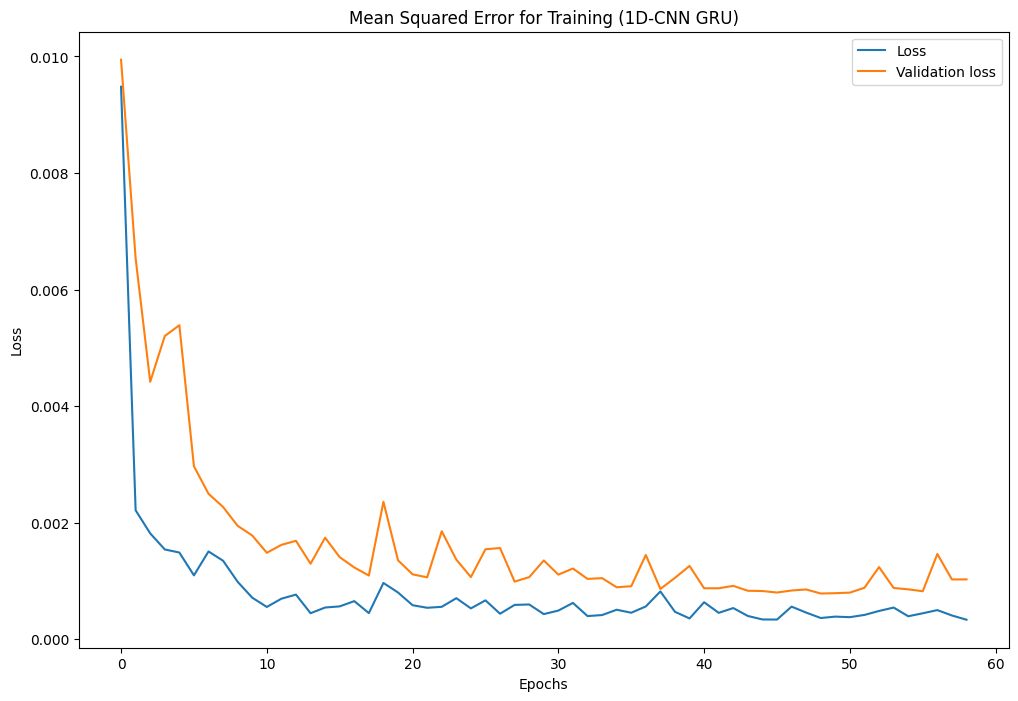

In [51]:
# Plot the loss for the training set.
plot_loss(train_result.history['loss'], train_result.history['val_loss'], "Mean Squared Error for Training (1D-CNN GRU)")

In [52]:
cnn1d_gru_model.evaluate(x=feature_test, y=label_test, verbose=1) # Now evaluate the model.

12/12 [==============================] - 0s 11ms/step - loss: 7.8596e-04 - mean_squared_error: 7.8596e-04 - mean_absolute_error: 0.0199 - root_mean_squared_error: 0.0280


[0.0007859612233005464,
 0.0007859612233005464,
 0.019852718338370323,
 0.0280349999666214]

In [53]:
# Now try to predict the training and test values.
training_predict = cnn1d_gru_model.predict(feature_training)
test_predict = cnn1d_gru_model.predict(feature_test)

12/12 [==============================] - 0s 6ms/step


In [54]:
# Restore the training and test datasets' original shapes.
training_result_cnn1d_gru = normalizer.inverse_transform(training_predict.reshape(-1, 1))
test_result_cnn1d_gru = normalizer.inverse_transform(test_predict.reshape(-1, 1))

           Dates          Actual Price       Predicted Price
30    2017-12-09   [1201.841827525211]  [1184.5013427734375]
31    2017-12-10  [1184.8400991863457]  [1195.0726318359375]
32    2017-12-11  [1224.1145485841962]  [1186.2562255859375]
33    2017-12-12  [1297.0276373650145]      [1204.568359375]
34    2017-12-13  [1324.4906040502817]  [1285.3612060546875]
...          ...                   ...                   ...
1599  2022-03-27  [2709.4138716771517]      [2600.947265625]
1600  2022-03-28  [2733.5177311196053]    [2672.39794921875]
1601  2022-03-29  [2768.4794493421177]   [2706.942138671875]
1602  2022-03-30  [2759.4760758914417]       [2737.37890625]
1603  2022-03-31   [2704.099092600401]       [2745.82421875]

[1574 rows x 3 columns]


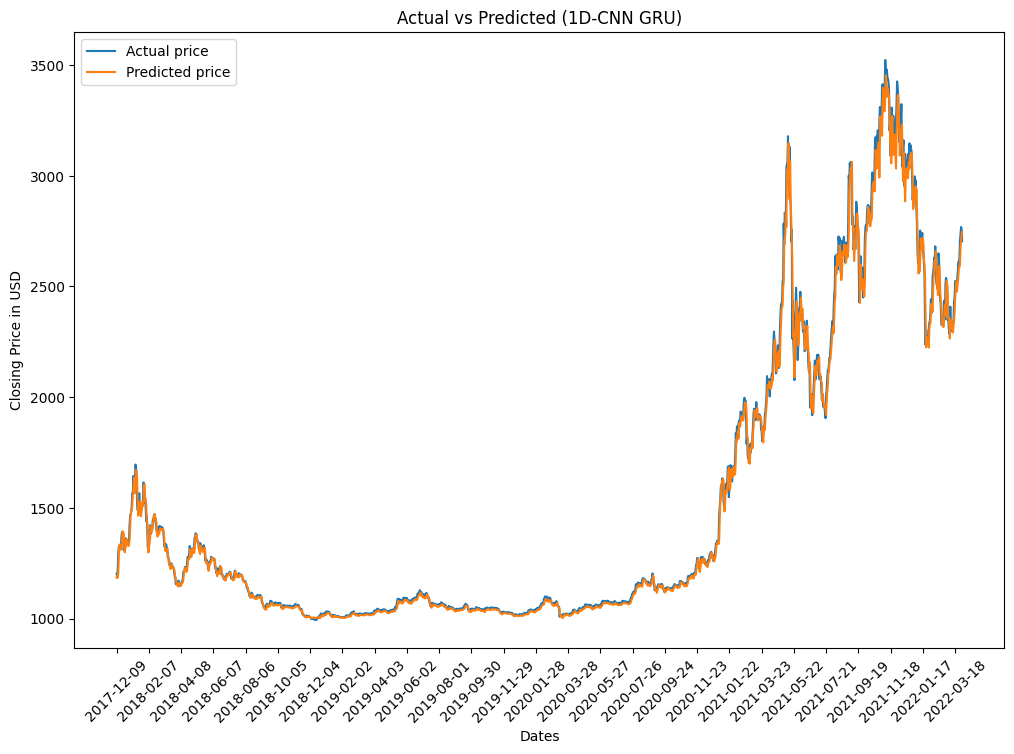

In [55]:
# Plot the obtained training prediction and compare with the actual training data.
plot_result_train(label_training, training_result_cnn1d_gru, original_data, "Actual vs Predicted (1D-CNN GRU)")

           Dates          Actual Price       Predicted Price
1634  2022-05-01         [2827.756104]     [2731.1513671875]
1635  2022-05-02           [2857.4104]   [2758.785400390625]
1636  2022-05-03         [2783.476318]     [2808.2841796875]
1637  2022-05-04         [2940.644775]   [2785.600341796875]
1638  2022-05-05         [2749.213135]   [2867.361572265625]
...          ...                   ...                   ...
1988  2023-04-20         [1943.097656]   [2004.156005859375]
1989  2023-04-21         [1849.999878]  [1928.1124267578125]
1990  2023-04-22  [1874.2286380000003]  [1888.6348876953125]
1991  2023-04-23         [1862.062012]      [1838.404296875]
1992  2023-04-24         [1833.186401]    [1876.41455078125]

[359 rows x 3 columns]


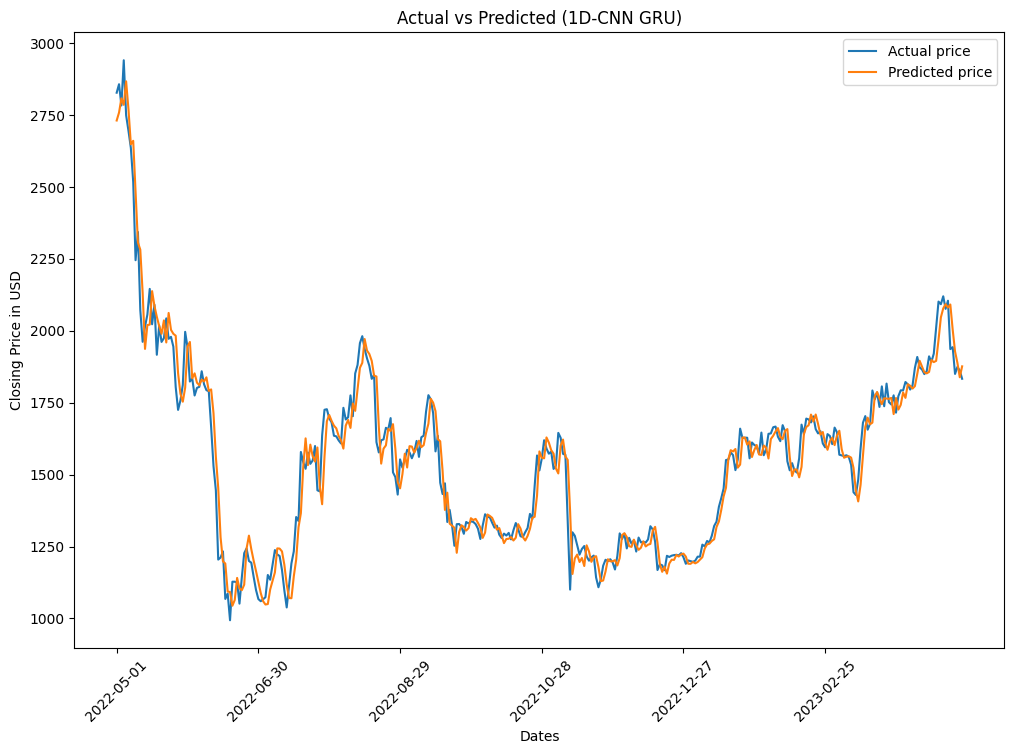

In [56]:
plot_result_test(label_test, test_result_cnn1d_gru, label_training.shape[0], original_data, "Actual vs Predicted (1D-CNN GRU)")

In [57]:
tf.backend.clear_session() # Be sure to clear the backend session afterwards.

# Model with Dropout

## BiLSTM

In [58]:
bilstm_model_dropout = tf.models.Sequential()
bilstm_model_dropout.add(tf.layers.Bidirectional(tf.layers.LSTM(units=128, activation='relu', input_shape=(num_steps, 1), return_sequences=True)))
bilstm_model_dropout.add(tf.layers.Dropout(0.2))
bilstm_model_dropout.add(tf.layers.Bidirectional(tf.layers.LSTM(units=128, return_sequences=True)))
bilstm_model_dropout.add(tf.layers.Dropout(0.2))
bilstm_model_dropout.add(tf.layers.Bidirectional(tf.layers.LSTM(units=128, return_sequences=True)))
bilstm_model_dropout.add(tf.layers.Dropout(0.2))
bilstm_model_dropout.add(tf.layers.Bidirectional(tf.layers.LSTM(units=128, return_sequences=True)))
bilstm_model_dropout.add(tf.layers.Dropout(0.2))
bilstm_model_dropout.add(tf.layers.Bidirectional(tf.layers.LSTM(units=128)))
bilstm_model_dropout.add(tf.layers.Dropout(0.2))
bilstm_model_dropout.add(tf.layers.Dense(1))
bilstm_model_dropout.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(),
                             metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), tf.metrics.RootMeanSquaredError()])

In [59]:
train_result = bilstm_model_dropout.fit(x=feature_training, y=label_training, validation_data=(feature_test, label_test),
                                  epochs=100, verbose=1, callbacks=[callback], shuffle=True) # Fit the model.

Epoch 1/100
50/50 [==============================] - 31s 229ms/step - loss: 0.0089 - mean_squared_error: 0.0089 - mean_absolute_error: 0.0530 - root_mean_squared_error: 0.0942 - val_loss: 0.0089 - val_mean_squared_error: 0.0089 - val_mean_absolute_error: 0.0702 - val_root_mean_squared_error: 0.0944
Epoch 2/100
50/50 [==============================] - 8s 167ms/step - loss: 0.0030 - mean_squared_error: 0.0030 - mean_absolute_error: 0.0325 - root_mean_squared_error: 0.0543 - val_loss: 0.0066 - val_mean_squared_error: 0.0066 - val_mean_absolute_error: 0.0579 - val_root_mean_squared_error: 0.0815
Epoch 3/100
50/50 [==============================] - 6s 127ms/step - loss: 0.0029 - mean_squared_error: 0.0029 - mean_absolute_error: 0.0312 - root_mean_squared_error: 0.0543 - val_loss: 0.0045 - val_mean_squared_error: 0.0045 - val_mean_absolute_error: 0.0514 - val_root_mean_squared_error: 0.0671
Epoch 4/100
50/50 [==============================] - 9s 172ms/step - loss: 0.0024 - mean_squared_error

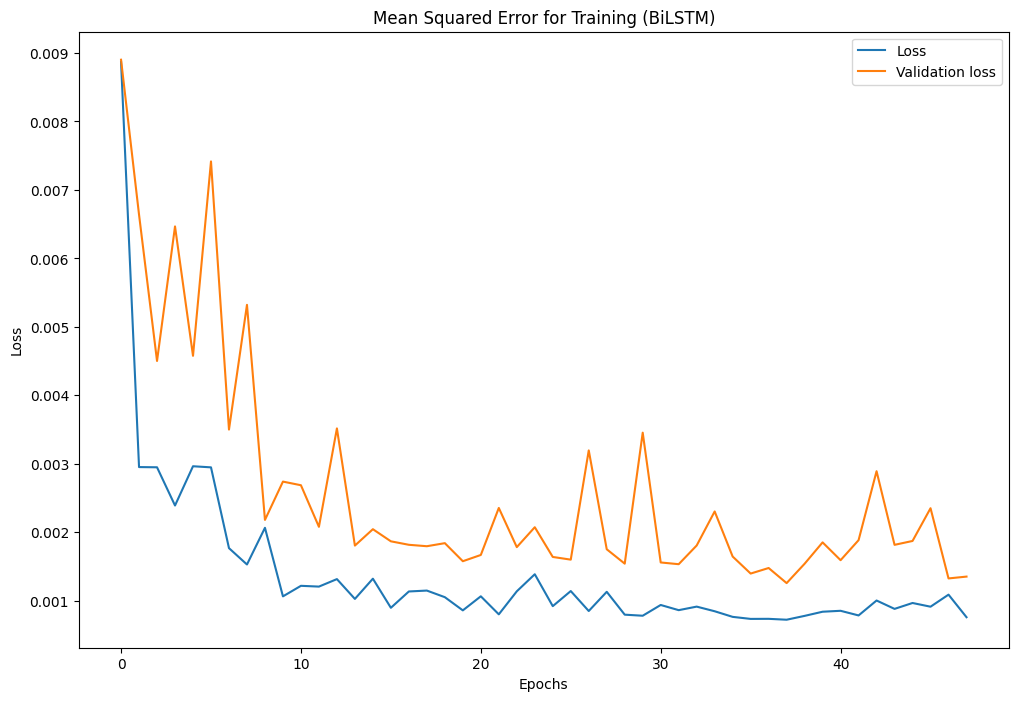

In [60]:
# Plot the loss for the training set.
plot_loss(train_result.history['loss'], train_result.history['val_loss'], "Mean Squared Error for Training (BiLSTM)")

In [61]:
bilstm_model_dropout.evaluate(x=feature_test, y=label_test, verbose=1) # Now evaluate the model.

12/12 [==============================] - 0s 22ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - mean_absolute_error: 0.0250 - root_mean_squared_error: 0.0355


[0.0012579120229929686,
 0.0012579120229929686,
 0.024950962513685226,
 0.035467054694890976]

In [62]:
# Now try to predict the training and test values.
training_predict = bilstm_model_dropout.predict(feature_training)
test_predict = bilstm_model_dropout.predict(feature_test)

12/12 [==============================] - 0s 18ms/step


In [63]:
# Restore the training and test datasets' original shapes.
training_result_bilstm = normalizer.inverse_transform(training_predict.reshape(-1, 1))
test_result_bilstm = normalizer.inverse_transform(test_predict.reshape(-1, 1))

           Dates          Actual Price       Predicted Price
30    2017-12-09   [1201.841827525211]   [1195.012939453125]
31    2017-12-10  [1184.8400991863457]  [1197.8509521484375]
32    2017-12-11  [1224.1145485841962]  [1197.0877685546875]
33    2017-12-12  [1297.0276373650145]  [1205.5914306640625]
34    2017-12-13  [1324.4906040502817]   [1233.362548828125]
...          ...                   ...                   ...
1599  2022-03-27  [2709.4138716771517]   [2627.594482421875]
1600  2022-03-28  [2733.5177311196053]    [2686.62158203125]
1601  2022-03-29  [2768.4794493421177]   [2736.204345703125]
1602  2022-03-30  [2759.4760758914417]   [2776.317138671875]
1603  2022-03-31   [2704.099092600401]   [2792.096923828125]

[1574 rows x 3 columns]


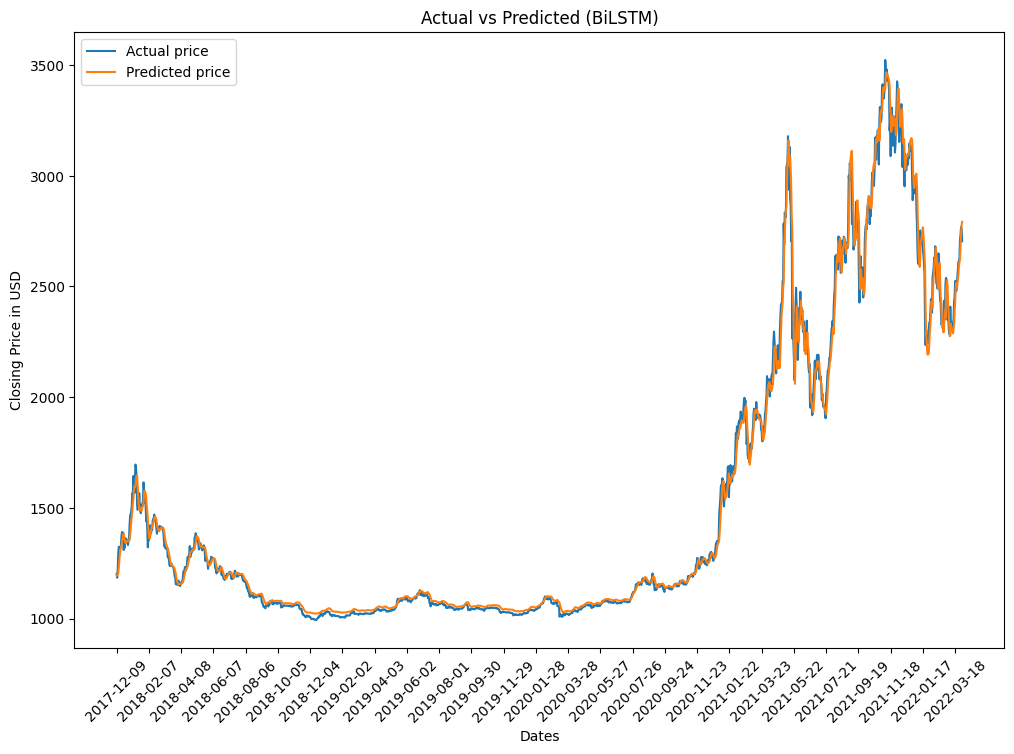

In [64]:
# Plot the obtained training prediction and compare with the actual training data.
plot_result_train(label_training, training_result_bilstm, original_data, "Actual vs Predicted (BiLSTM)")

           Dates          Actual Price       Predicted Price
1634  2022-05-01         [2827.756104]   [2805.015380859375]
1635  2022-05-02           [2857.4104]    [2814.63525390625]
1636  2022-05-03         [2783.476318]    [2857.23193359375]
1637  2022-05-04         [2940.644775]    [2836.00732421875]
1638  2022-05-05         [2749.213135]    [2899.30517578125]
...          ...                   ...                   ...
1988  2023-04-20         [1943.097656]     [2020.5615234375]
1989  2023-04-21         [1849.999878]  [1973.9261474609375]
1990  2023-04-22  [1874.2286380000003]    [1900.19775390625]
1991  2023-04-23         [1862.062012]   [1857.548095703125]
1992  2023-04-24         [1833.186401]   [1827.316650390625]

[359 rows x 3 columns]


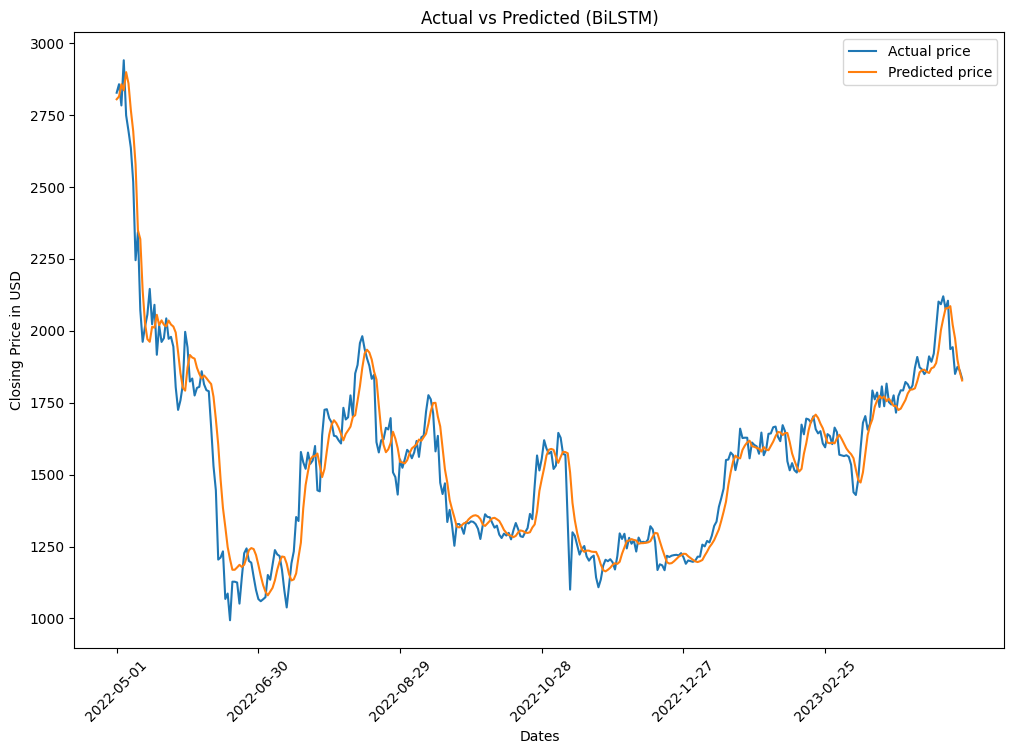

In [65]:
plot_result_test(label_test, test_result_bilstm, label_training.shape[0], original_data, "Actual vs Predicted (BiLSTM)")

In [66]:
tf.backend.clear_session() # Be sure to clear the backend session afterwards.

## BiGRU

In [67]:
bigru_model_dropout = tf.models.Sequential()
bigru_model_dropout.add(tf.layers.Bidirectional(tf.layers.GRU(units=128, activation='relu', input_shape=(num_steps, 1), return_sequences=True)))
bigru_model_dropout.add(tf.layers.Dropout(0.2))
bigru_model_dropout.add(tf.layers.Bidirectional(tf.layers.GRU(units=128, return_sequences=True)))
bigru_model_dropout.add(tf.layers.Dropout(0.2))
bigru_model_dropout.add(tf.layers.Bidirectional(tf.layers.GRU(units=128, return_sequences=True)))
bigru_model_dropout.add(tf.layers.Dropout(0.2))
bigru_model_dropout.add(tf.layers.Bidirectional(tf.layers.GRU(units=128, return_sequences=True)))
bigru_model_dropout.add(tf.layers.Dropout(0.2))
bigru_model_dropout.add(tf.layers.Bidirectional(tf.layers.GRU(units=128)))
bigru_model_dropout.add(tf.layers.Dropout(0.2))
bigru_model_dropout.add(tf.layers.Dense(1))
bigru_model_dropout.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(),
                            metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), tf.metrics.RootMeanSquaredError()])

In [68]:
train_result = bigru_model_dropout.fit(x=feature_training, y=label_training, validation_data=(feature_test, label_test),
                                  epochs=100, verbose=1, callbacks=[callback], shuffle=True) # Fit the model.

Epoch 1/100
50/50 [==============================] - 31s 240ms/step - loss: 0.0079 - mean_squared_error: 0.0079 - mean_absolute_error: 0.0522 - root_mean_squared_error: 0.0888 - val_loss: 0.0034 - val_mean_squared_error: 0.0034 - val_mean_absolute_error: 0.0428 - val_root_mean_squared_error: 0.0585
Epoch 2/100
50/50 [==============================] - 10s 196ms/step - loss: 0.0019 - mean_squared_error: 0.0019 - mean_absolute_error: 0.0244 - root_mean_squared_error: 0.0431 - val_loss: 0.0031 - val_mean_squared_error: 0.0031 - val_mean_absolute_error: 0.0387 - val_root_mean_squared_error: 0.0560
Epoch 3/100
50/50 [==============================] - 8s 155ms/step - loss: 0.0023 - mean_squared_error: 0.0023 - mean_absolute_error: 0.0278 - root_mean_squared_error: 0.0476 - val_loss: 0.0023 - val_mean_squared_error: 0.0023 - val_mean_absolute_error: 0.0353 - val_root_mean_squared_error: 0.0480
Epoch 4/100
50/50 [==============================] - 10s 191ms/step - loss: 0.0026 - mean_squared_err

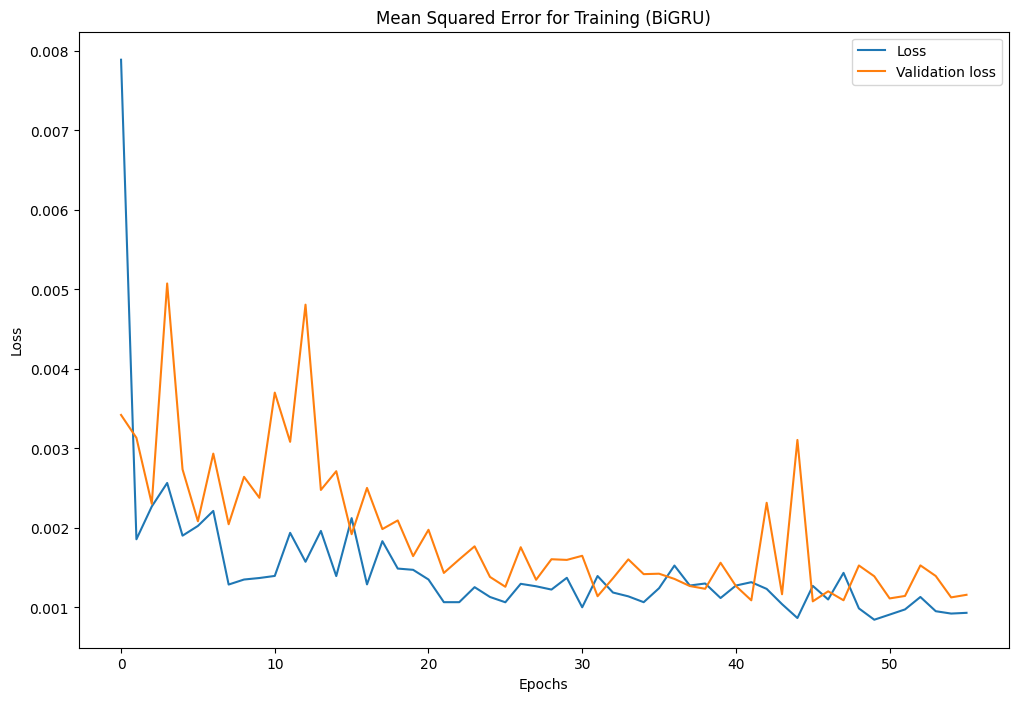

In [69]:
# Plot the loss for the training set.
plot_loss(train_result.history['loss'], train_result.history['val_loss'], "Mean Squared Error for Training (BiGRU)")

In [70]:
bigru_model_dropout.evaluate(x=feature_test, y=label_test, verbose=1) # Now evaluate the model.

12/12 [==============================] - 0s 25ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - mean_absolute_error: 0.0231 - root_mean_squared_error: 0.0328


[0.0010772317182272673,
 0.0010772317182272673,
 0.023110028356313705,
 0.032821208238601685]

In [71]:
# Now try to predict the training and test values.
training_predict = bigru_model_dropout.predict(feature_training)
test_predict = bigru_model_dropout.predict(feature_test)

12/12 [==============================] - 0s 20ms/step


In [72]:
# Restore the training and test datasets' original shapes.
training_result_bigru = normalizer.inverse_transform(training_predict.reshape(-1, 1))
test_result_bigru = normalizer.inverse_transform(test_predict.reshape(-1, 1))

           Dates          Actual Price       Predicted Price
30    2017-12-09   [1201.841827525211]  [1209.1400146484375]
31    2017-12-10  [1184.8400991863457]  [1214.8297119140625]
32    2017-12-11  [1224.1145485841962]  [1212.9405517578125]
33    2017-12-12  [1297.0276373650145]  [1226.4207763671875]
34    2017-12-13  [1324.4906040502817]  [1265.6585693359375]
...          ...                   ...                   ...
1599  2022-03-27  [2709.4138716771517]   [2622.866943359375]
1600  2022-03-28  [2733.5177311196053]      [2679.716796875]
1601  2022-03-29  [2768.4794493421177]   [2709.788330078125]
1602  2022-03-30  [2759.4760758914417]     [2741.1943359375]
1603  2022-03-31   [2704.099092600401]    [2744.30224609375]

[1574 rows x 3 columns]


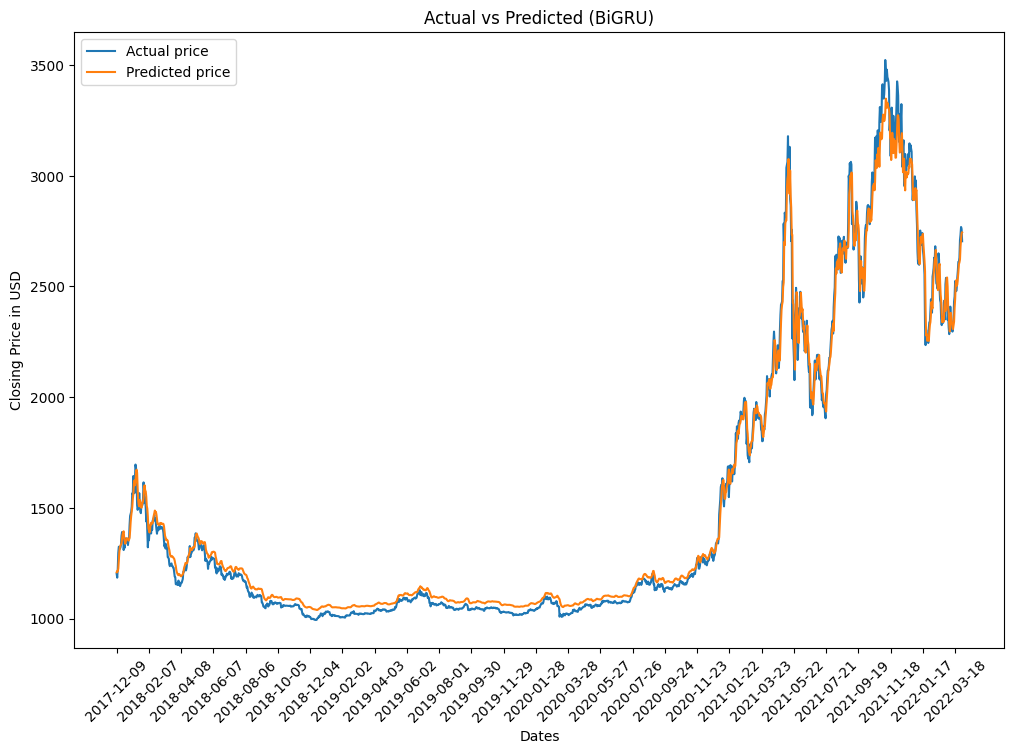

In [73]:
# Plot the obtained training prediction and compare with the actual training data.
plot_result_train(label_training, training_result_bigru, original_data, "Actual vs Predicted (BiGRU)")

           Dates          Actual Price       Predicted Price
1634  2022-05-01         [2827.756104]      [2734.177734375]
1635  2022-05-02           [2857.4104]    [2778.88427734375]
1636  2022-05-03         [2783.476318]   [2811.595458984375]
1637  2022-05-04         [2940.644775]   [2775.364501953125]
1638  2022-05-05         [2749.213135]    [2872.40185546875]
...          ...                   ...                   ...
1988  2023-04-20         [1943.097656]  [2000.1248779296875]
1989  2023-04-21         [1849.999878]   [1961.839599609375]
1990  2023-04-22  [1874.2286380000003]     [1895.7705078125]
1991  2023-04-23         [1862.062012]    [1878.38916015625]
1992  2023-04-24         [1833.186401]  [1867.5372314453125]

[359 rows x 3 columns]


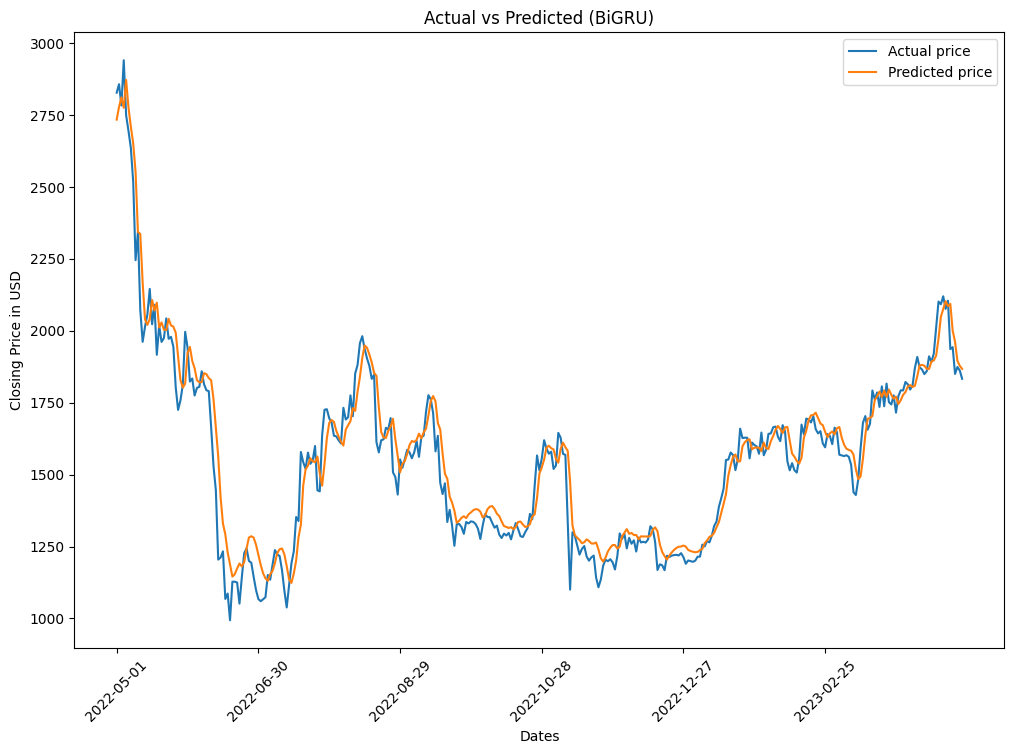

In [74]:
plot_result_test(label_test, test_result_bigru, label_training.shape[0], original_data, "Actual vs Predicted (BiGRU)")

In [75]:
tf.backend.clear_session() # Be sure to clear the backend session afterwards.

## 1-D CNN LSTM

In [76]:
cnn1d_lstm_model_dropout = tf.models.Sequential()
cnn1d_lstm_model_dropout.add(tf.layers.Conv1D(filters=30, kernel_size=3, activation='relu', input_shape=(num_steps, 1)))
cnn1d_lstm_model_dropout.add(tf.layers.Dropout(0.2))
cnn1d_lstm_model_dropout.add(tf.layers.Conv1D(filters=30, kernel_size=3))
cnn1d_lstm_model_dropout.add(tf.layers.Dropout(0.2))
cnn1d_lstm_model_dropout.add(tf.layers.Conv1D(filters=30, kernel_size=3))
cnn1d_lstm_model_dropout.add(tf.layers.Dropout(0.2))
cnn1d_lstm_model_dropout.add(tf.layers.AveragePooling1D())
cnn1d_lstm_model_dropout.add(tf.layers.LSTM(units=128, activation='relu', return_sequences=True))
cnn1d_lstm_model_dropout.add(tf.layers.Dropout(0.2))
cnn1d_lstm_model_dropout.add(tf.layers.LSTM(units=128, return_sequences=True))
cnn1d_lstm_model_dropout.add(tf.layers.Dropout(0.2))
cnn1d_lstm_model_dropout.add(tf.layers.LSTM(units=128))
cnn1d_lstm_model_dropout.add(tf.layers.Dropout(0.2))
cnn1d_lstm_model_dropout.add(tf.layers.Flatten())
cnn1d_lstm_model_dropout.add(tf.layers.Dense(1))
cnn1d_lstm_model_dropout.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(),
                                 metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), tf.metrics.RootMeanSquaredError()])
cnn1d_lstm_model_dropout.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 28, 30)            120       
                                                                 
 dropout (Dropout)           (None, 28, 30)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 26, 30)            2730      
                                                                 
 dropout_1 (Dropout)         (None, 26, 30)            0         
                                                                 
 conv1d_2 (Conv1D)           (None, 24, 30)            2730      
                                                                 
 dropout_2 (Dropout)         (None, 24, 30)            0         
                                                                 
 average_pooling1d (AverageP  (None, 12, 30)           0

In [77]:
train_result = cnn1d_lstm_model_dropout.fit(x=feature_training, y=label_training, validation_data=(feature_test, label_test),
                                  epochs=100, verbose=1, callbacks=[callback], shuffle=True) # Fit the model.

Epoch 1/100
50/50 [==============================] - 11s 54ms/step - loss: 0.0153 - mean_squared_error: 0.0153 - mean_absolute_error: 0.0736 - root_mean_squared_error: 0.1237 - val_loss: 0.0127 - val_mean_squared_error: 0.0127 - val_mean_absolute_error: 0.0861 - val_root_mean_squared_error: 0.1127
Epoch 2/100
50/50 [==============================] - 2s 37ms/step - loss: 0.0045 - mean_squared_error: 0.0045 - mean_absolute_error: 0.0389 - root_mean_squared_error: 0.0671 - val_loss: 0.0147 - val_mean_squared_error: 0.0147 - val_mean_absolute_error: 0.0902 - val_root_mean_squared_error: 0.1211
Epoch 3/100
50/50 [==============================] - 2s 38ms/step - loss: 0.0045 - mean_squared_error: 0.0045 - mean_absolute_error: 0.0388 - root_mean_squared_error: 0.0668 - val_loss: 0.0118 - val_mean_squared_error: 0.0118 - val_mean_absolute_error: 0.0815 - val_root_mean_squared_error: 0.1086
Epoch 4/100
50/50 [==============================] - 3s 66ms/step - loss: 0.0039 - mean_squared_error: 0.

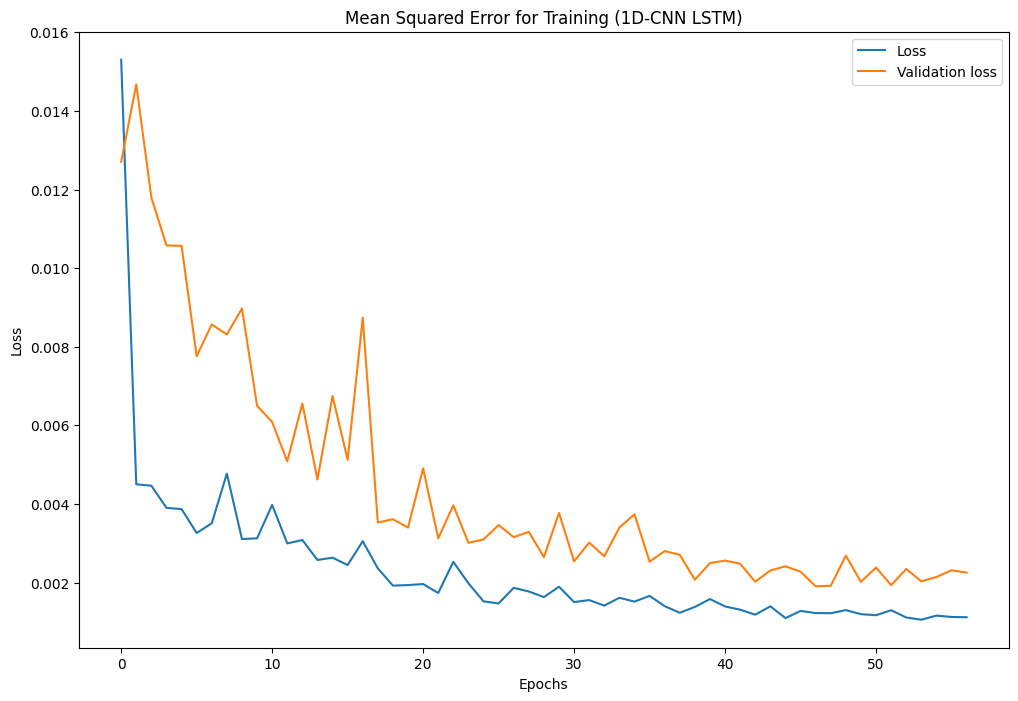

In [78]:
# Plot the loss for the training set.
plot_loss(train_result.history['loss'], train_result.history['val_loss'], "Mean Squared Error for Training (1D-CNN LSTM)")

In [79]:
cnn1d_lstm_model_dropout.evaluate(x=feature_test, y=label_test, verbose=1) # Now evaluate the model.

12/12 [==============================] - 0s 7ms/step - loss: 0.0019 - mean_squared_error: 0.0019 - mean_absolute_error: 0.0324 - root_mean_squared_error: 0.0436


[0.0019050411647185683,
 0.0019050411647185683,
 0.032416217029094696,
 0.04364677518606186]

In [80]:
# Now try to predict the training and test values.
training_predict = cnn1d_lstm_model_dropout.predict(feature_training)
test_predict = cnn1d_lstm_model_dropout.predict(feature_test)

12/12 [==============================] - 0s 6ms/step


In [81]:
# Restore the training and test datasets' original shapes.
training_result_cnn1d_lstm = normalizer.inverse_transform(training_predict.reshape(-1, 1))
test_result_cnn1d_lstm = normalizer.inverse_transform(test_predict.reshape(-1, 1))

           Dates          Actual Price       Predicted Price
30    2017-12-09   [1201.841827525211]   [1165.167724609375]
31    2017-12-10  [1184.8400991863457]  [1166.6776123046875]
32    2017-12-11  [1224.1145485841962]  [1167.8367919921875]
33    2017-12-12  [1297.0276373650145]    [1169.43212890625]
34    2017-12-13  [1324.4906040502817]  [1180.9315185546875]
...          ...                   ...                   ...
1599  2022-03-27  [2709.4138716771517]       [2574.41015625]
1600  2022-03-28  [2733.5177311196053]     [2604.3271484375]
1601  2022-03-29  [2768.4794493421177]      [2646.845703125]
1602  2022-03-30  [2759.4760758914417]   [2681.045654296875]
1603  2022-03-31   [2704.099092600401]       [2696.76953125]

[1574 rows x 3 columns]


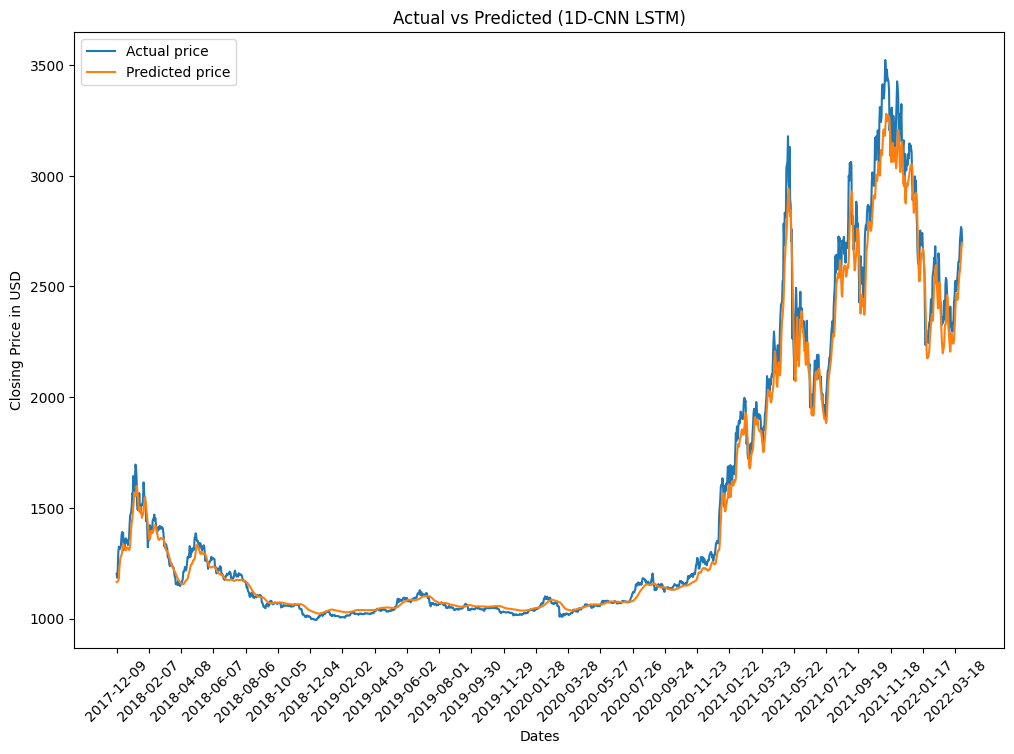

In [82]:
# Plot the obtained training prediction and compare with the actual training data.
plot_result_train(label_training, training_result_cnn1d_lstm, original_data, "Actual vs Predicted (1D-CNN LSTM)")

In [83]:
plot_result_test(label_test, test_result_cnn1d_lstm, label_training.shape[0], original_data, "Actual vs Predicted (1D-CNN LSTM)")

           Dates          Actual Price       Predicted Price
1634  2022-05-01         [2827.756104]   [2724.329345703125]
1635  2022-05-02           [2857.4104]   [2675.188232421875]
1636  2022-05-03         [2783.476318]      [2710.486328125]
1637  2022-05-04         [2940.644775]    [2744.99560546875]
1638  2022-05-05         [2749.213135]   [2764.762451171875]
...          ...                   ...                   ...
1988  2023-04-20         [1943.097656]  [1979.2174072265625]
1989  2023-04-21         [1849.999878]         [1919.390625]
1990  2023-04-22  [1874.2286380000003]   [1860.753662109375]
1991  2023-04-23         [1862.062012]  [1812.5333251953125]
1992  2023-04-24         [1833.186401]   [1792.099365234375]

[359 rows x 3 columns]


In [84]:
tf.backend.clear_session() # Be sure to clear the backend session afterwards.

## 1-D CNN GRU

In [85]:
cnn1d_gru_model_dropout = tf.models.Sequential()
cnn1d_gru_model_dropout.add(tf.layers.Conv1D(filters=30, kernel_size=3, activation='relu', input_shape=(num_steps, 1)))
cnn1d_gru_model_dropout.add(tf.layers.Dropout(0.2))
cnn1d_gru_model_dropout.add(tf.layers.Conv1D(filters=30, kernel_size=3))
cnn1d_gru_model_dropout.add(tf.layers.Dropout(0.2))
cnn1d_gru_model_dropout.add(tf.layers.Conv1D(filters=30, kernel_size=3))
cnn1d_gru_model_dropout.add(tf.layers.Dropout(0.2))
cnn1d_gru_model_dropout.add(tf.layers.AveragePooling1D())
cnn1d_gru_model_dropout.add(tf.layers.GRU(units=128, activation='relu', return_sequences=True))
cnn1d_gru_model_dropout.add(tf.layers.Dropout(0.2))
cnn1d_gru_model_dropout.add(tf.layers.GRU(units=128, return_sequences=True))
cnn1d_gru_model_dropout.add(tf.layers.Dropout(0.2))
cnn1d_gru_model_dropout.add(tf.layers.GRU(units=128))
cnn1d_gru_model_dropout.add(tf.layers.Dropout(0.2))
cnn1d_gru_model_dropout.add(tf.layers.Flatten())
cnn1d_gru_model_dropout.add(tf.layers.Dense(1))
cnn1d_gru_model_dropout.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(),
                                metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), tf.metrics.RootMeanSquaredError()])
cnn1d_gru_model_dropout.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 28, 30)            120       
                                                                 
 dropout (Dropout)           (None, 28, 30)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 26, 30)            2730      
                                                                 
 dropout_1 (Dropout)         (None, 26, 30)            0         
                                                                 
 conv1d_2 (Conv1D)           (None, 24, 30)            2730      
                                                                 
 dropout_2 (Dropout)         (None, 24, 30)            0         
                                                                 
 average_pooling1d (AverageP  (None, 12, 30)           0

In [86]:
train_result = cnn1d_gru_model_dropout.fit(x=feature_training, y=label_training, validation_data=(feature_test, label_test),
                                  epochs=100, verbose=1, callbacks=[callback], shuffle=True) # Fit the model.

Epoch 1/100
50/50 [==============================] - 11s 61ms/step - loss: 0.0112 - mean_squared_error: 0.0112 - mean_absolute_error: 0.0660 - root_mean_squared_error: 0.1057 - val_loss: 0.0074 - val_mean_squared_error: 0.0074 - val_mean_absolute_error: 0.0614 - val_root_mean_squared_error: 0.0862
Epoch 2/100
50/50 [==============================] - 2s 42ms/step - loss: 0.0044 - mean_squared_error: 0.0044 - mean_absolute_error: 0.0384 - root_mean_squared_error: 0.0661 - val_loss: 0.0057 - val_mean_squared_error: 0.0057 - val_mean_absolute_error: 0.0553 - val_root_mean_squared_error: 0.0753
Epoch 3/100
50/50 [==============================] - 2s 43ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - mean_absolute_error: 0.0315 - root_mean_squared_error: 0.0567 - val_loss: 0.0051 - val_mean_squared_error: 0.0051 - val_mean_absolute_error: 0.0520 - val_root_mean_squared_error: 0.0711
Epoch 4/100
50/50 [==============================] - 3s 64ms/step - loss: 0.0034 - mean_squared_error: 0.

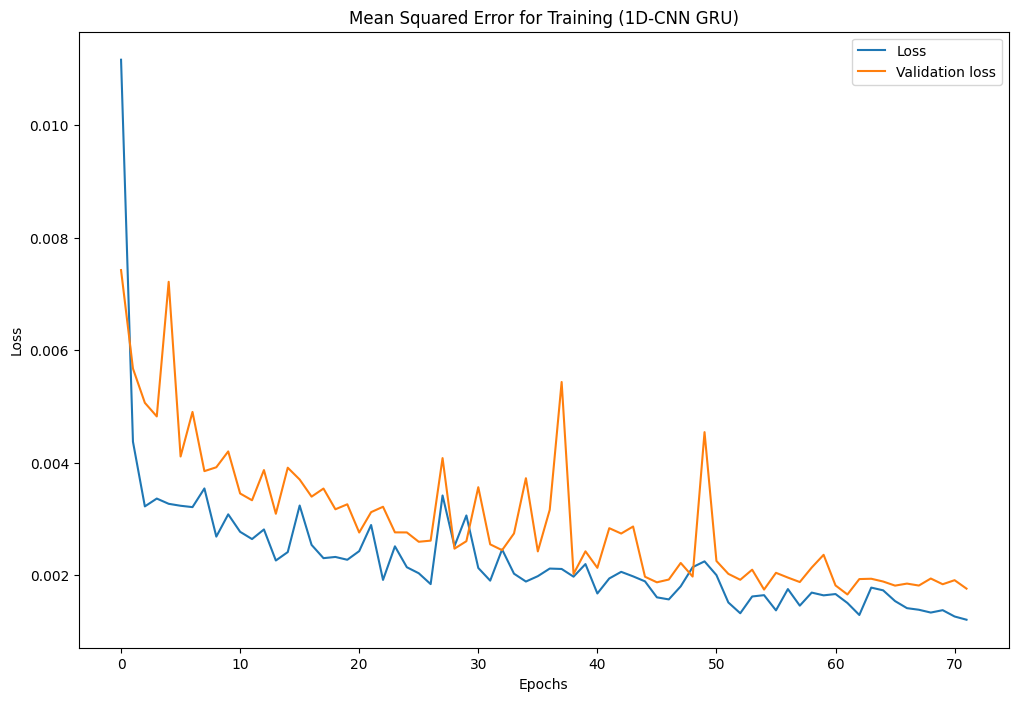

In [87]:
# Plot the loss for the training set.
plot_loss(train_result.history['loss'], train_result.history['val_loss'], "Mean Squared Error for Training (1D-CNN GRU)")

In [88]:
cnn1d_gru_model_dropout.evaluate(x=feature_test, y=label_test, verbose=1) # Now evaluate the model.

12/12 [==============================] - 0s 7ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - mean_absolute_error: 0.0286 - root_mean_squared_error: 0.0407


[0.0016532866284251213,
 0.0016532866284251213,
 0.028557615354657173,
 0.04066062718629837]

In [89]:
# Now try to predict the training and test values.
training_predict = cnn1d_gru_model_dropout.predict(feature_training)
test_predict = cnn1d_gru_model_dropout.predict(feature_test)

12/12 [==============================] - 0s 7ms/step


In [90]:
# Restore the training and test datasets' original shapes.
training_result_cnn1d_gru = normalizer.inverse_transform(training_predict.reshape(-1, 1))
test_result_cnn1d_gru = normalizer.inverse_transform(test_predict.reshape(-1, 1))

           Dates          Actual Price      Predicted Price
30    2017-12-09   [1201.841827525211]  [1194.488037109375]
31    2017-12-10  [1184.8400991863457]  [1199.721435546875]
32    2017-12-11  [1224.1145485841962]  [1202.302001953125]
33    2017-12-12  [1297.0276373650145]  [1208.329345703125]
34    2017-12-13  [1324.4906040502817]   [1231.32373046875]
...          ...                   ...                  ...
1599  2022-03-27  [2709.4138716771517]       [2586.5546875]
1600  2022-03-28  [2733.5177311196053]  [2612.348388671875]
1601  2022-03-29  [2768.4794493421177]   [2647.41357421875]
1602  2022-03-30  [2759.4760758914417]       [2681.5859375]
1603  2022-03-31   [2704.099092600401]  [2703.832275390625]

[1574 rows x 3 columns]


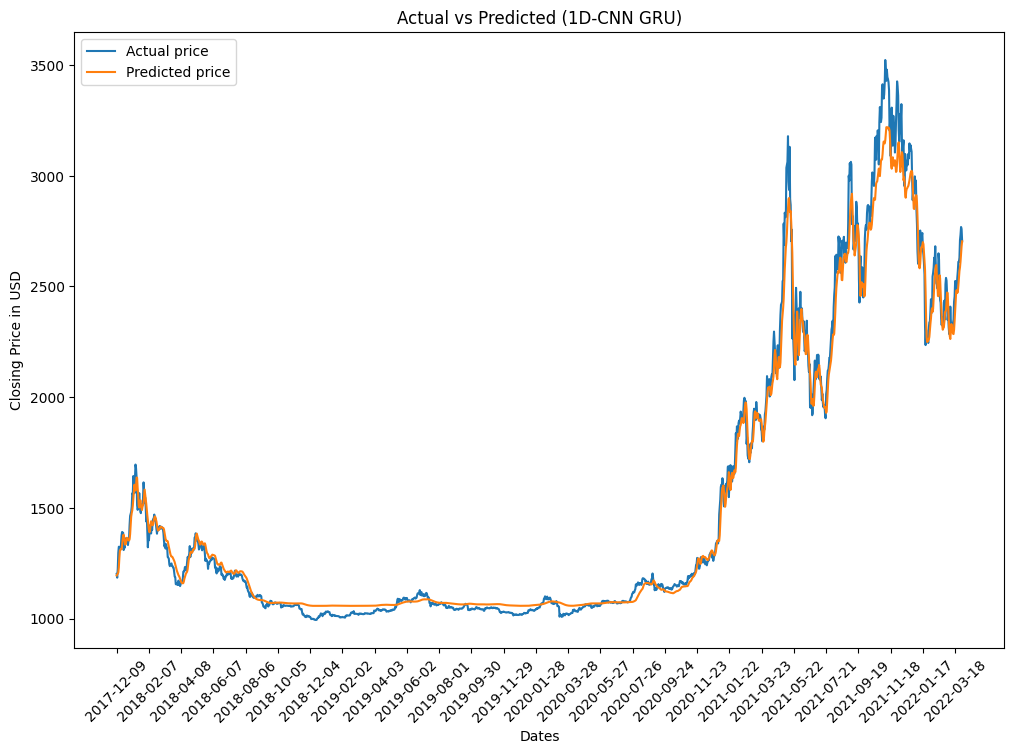

In [91]:
# Plot the obtained training prediction and compare with the actual training data.
plot_result_train(label_training, training_result_cnn1d_gru, original_data, "Actual vs Predicted (1D-CNN GRU)")

           Dates          Actual Price       Predicted Price
1634  2022-05-01         [2827.756104]    [2767.97509765625]
1635  2022-05-02           [2857.4104]    [2735.30908203125]
1636  2022-05-03         [2783.476318]      [2755.478515625]
1637  2022-05-04         [2940.644775]    [2768.72021484375]
1638  2022-05-05         [2749.213135]    [2787.93115234375]
...          ...                   ...                   ...
1988  2023-04-20         [1943.097656]  [2008.7884521484375]
1989  2023-04-21         [1849.999878]  [1944.0487060546875]
1990  2023-04-22  [1874.2286380000003]    [1885.62255859375]
1991  2023-04-23         [1862.062012]     [1841.8662109375]
1992  2023-04-24         [1833.186401]  [1834.2562255859375]

[359 rows x 3 columns]


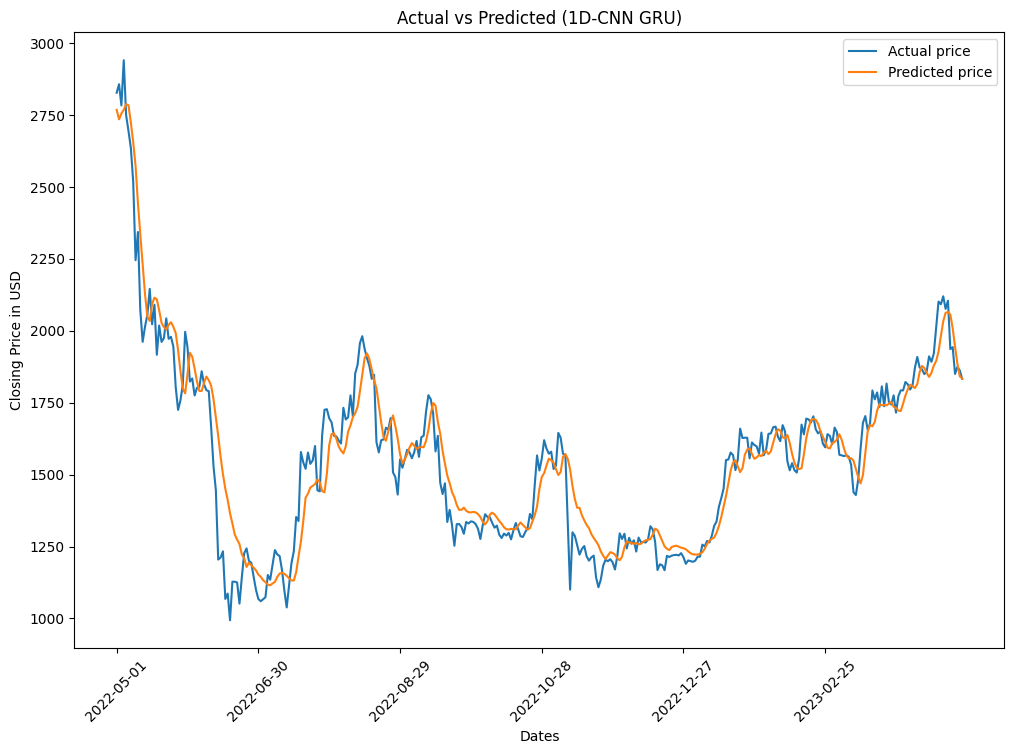

In [92]:
plot_result_test(label_test, test_result_cnn1d_gru, label_training.shape[0], original_data, "Actual vs Predicted (1D-CNN GRU)")

In [93]:
tf.backend.clear_session() # Be sure to clear the backend session afterwards.

# Model with Regularizers

## BiLSTM

In [94]:
bilstm_model_regularizers = tf.models.Sequential()
bilstm_model_regularizers.add(tf.layers.Bidirectional(tf.layers.LSTM(units=128, activation='relu', input_shape=(num_steps, 1), kernel_regularizer="l1_l2", return_sequences=True)))
bilstm_model_regularizers.add(tf.layers.Bidirectional(tf.layers.LSTM(units=128, return_sequences=True)))
bilstm_model_regularizers.add(tf.layers.Bidirectional(tf.layers.LSTM(units=128, return_sequences=True)))
bilstm_model_regularizers.add(tf.layers.Bidirectional(tf.layers.LSTM(units=128, return_sequences=True)))
bilstm_model_regularizers.add(tf.layers.Bidirectional(tf.layers.LSTM(units=128)))
bilstm_model_regularizers.add(tf.layers.Dense(1))
bilstm_model_regularizers.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(),
                                  metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), tf.metrics.RootMeanSquaredError()])

In [95]:
train_result = bilstm_model_regularizers.fit(x=feature_training, y=label_training, validation_data=(feature_test, label_test),
                                  epochs=100, verbose=1, callbacks=[callback], shuffle=True) # Fit the model.

Epoch 1/100
50/50 [==============================] - 31s 184ms/step - loss: 0.3972 - mean_squared_error: 0.0078 - mean_absolute_error: 0.0452 - root_mean_squared_error: 0.0886 - val_loss: 0.1991 - val_mean_squared_error: 0.0083 - val_mean_absolute_error: 0.0663 - val_root_mean_squared_error: 0.0909
Epoch 2/100
50/50 [==============================] - 8s 162ms/step - loss: 0.0897 - mean_squared_error: 0.0026 - mean_absolute_error: 0.0347 - root_mean_squared_error: 0.0514 - val_loss: 0.0310 - val_mean_squared_error: 0.0142 - val_mean_absolute_error: 0.0880 - val_root_mean_squared_error: 0.1192
Epoch 3/100
50/50 [==============================] - 7s 134ms/step - loss: 0.0111 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0452 - root_mean_squared_error: 0.0621 - val_loss: 0.0114 - val_mean_squared_error: 0.0071 - val_mean_absolute_error: 0.0590 - val_root_mean_squared_error: 0.0841
Epoch 4/100
50/50 [==============================] - 8s 153ms/step - loss: 0.0061 - mean_squared_error

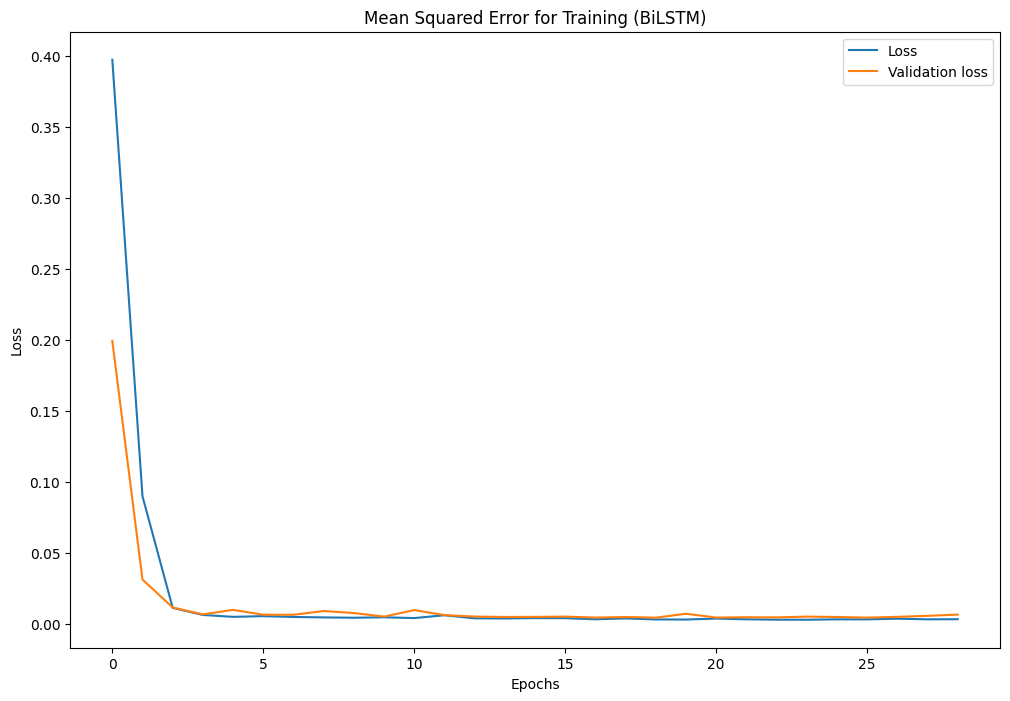

In [96]:
# Plot the loss for the training set.
plot_loss(train_result.history['loss'], train_result.history['val_loss'], "Mean Squared Error for Training (BiLSTM)")

In [97]:
bilstm_model_regularizers.evaluate(x=feature_test, y=label_test, verbose=1) # Now evaluate the model.

12/12 [==============================] - 0s 32ms/step - loss: 0.0042 - mean_squared_error: 0.0022 - mean_absolute_error: 0.0370 - root_mean_squared_error: 0.0472


[0.004219830967485905,
 0.002227218123152852,
 0.03695756569504738,
 0.047193411737680435]

In [98]:
# Now try to predict the training and test values.
training_predict = bilstm_model_regularizers.predict(feature_training)
test_predict = bilstm_model_regularizers.predict(feature_test)

12/12 [==============================] - 0s 18ms/step


In [99]:
# Restore the training and test datasets' original shapes.
training_result_bilstm = normalizer.inverse_transform(training_predict.reshape(-1, 1))
test_result_bilstm = normalizer.inverse_transform(test_predict.reshape(-1, 1))

           Dates          Actual Price       Predicted Price
30    2017-12-09   [1201.841827525211]  [1155.1497802734375]
31    2017-12-10  [1184.8400991863457]  [1155.1048583984375]
32    2017-12-11  [1224.1145485841962]  [1153.1695556640625]
33    2017-12-12  [1297.0276373650145]  [1156.6405029296875]
34    2017-12-13  [1324.4906040502817]   [1170.714599609375]
...          ...                   ...                   ...
1599  2022-03-27  [2709.4138716771517]    [2500.34912109375]
1600  2022-03-28  [2733.5177311196053]      [2527.576171875]
1601  2022-03-29  [2768.4794493421177]   [2554.697509765625]
1602  2022-03-30  [2759.4760758914417]    [2583.45751953125]
1603  2022-03-31   [2704.099092600401]       [2605.58203125]

[1574 rows x 3 columns]


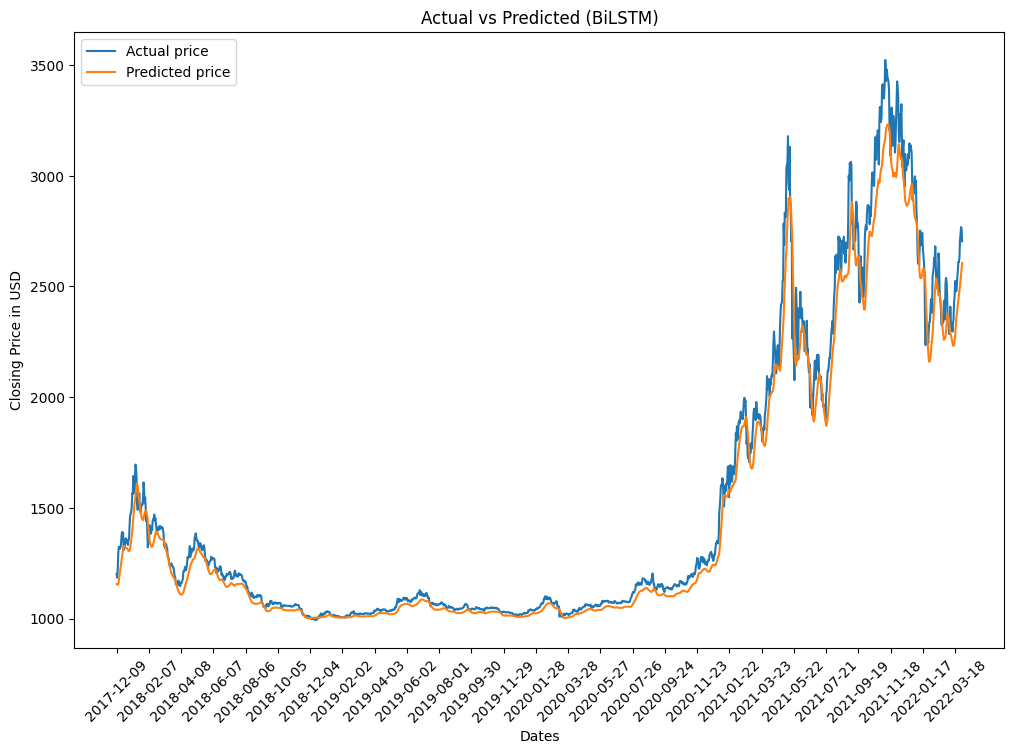

In [100]:
# Plot the obtained training prediction and compare with the actual training data.
plot_result_train(label_training, training_result_bilstm, original_data, "Actual vs Predicted (BiLSTM)")

           Dates          Actual Price       Predicted Price
1634  2022-05-01         [2827.756104]      [2713.326171875]
1635  2022-05-02           [2857.4104]    [2697.58349609375]
1636  2022-05-03         [2783.476318]   [2692.333251953125]
1637  2022-05-04         [2940.644775]   [2678.441162109375]
1638  2022-05-05         [2749.213135]   [2696.586181640625]
...          ...                   ...                   ...
1988  2023-04-20         [1943.097656]  [2008.7025146484375]
1989  2023-04-21         [1849.999878]  [1992.7454833984375]
1990  2023-04-22  [1874.2286380000003]  [1957.3692626953125]
1991  2023-04-23         [1862.062012]    [1924.68212890625]
1992  2023-04-24         [1833.186401]  [1891.1014404296875]

[359 rows x 3 columns]


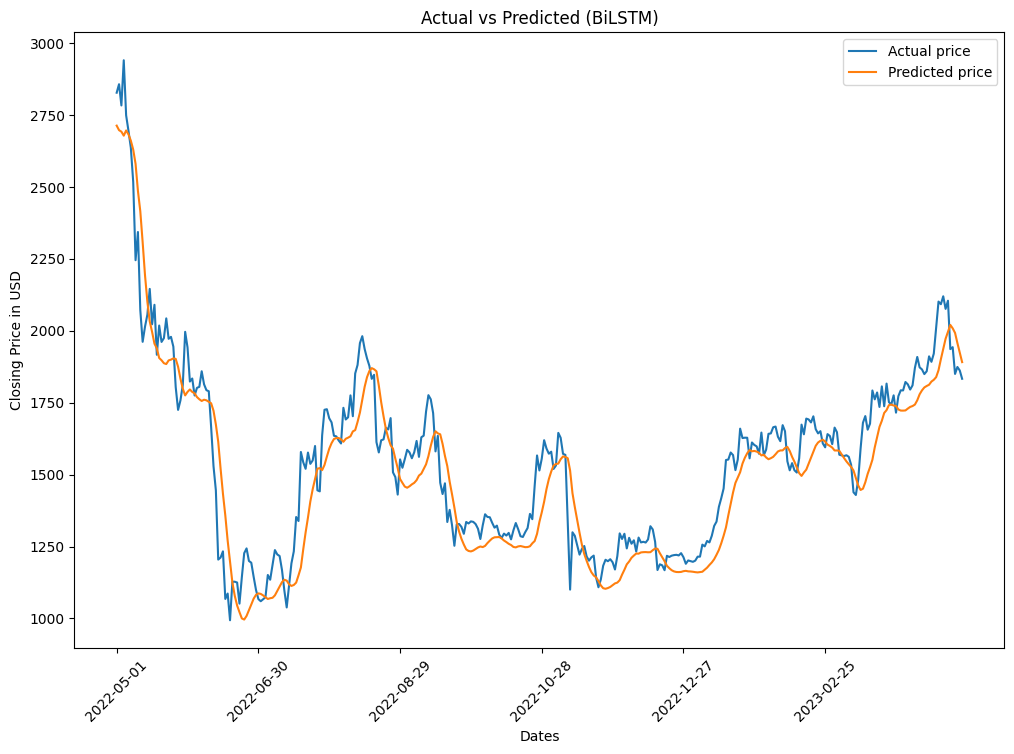

In [101]:
plot_result_test(label_test, test_result_bilstm, label_training.shape[0], original_data, "Actual vs Predicted (BiLSTM)")

In [102]:
tf.backend.clear_session() # Be sure to clear the backend session afterwards.

## BiGRU

In [103]:
bigru_model_regularizers = tf.models.Sequential()
bigru_model_regularizers.add(tf.layers.Bidirectional(tf.layers.GRU(units=128, activation='relu', input_shape=(num_steps, 1), kernel_regularizer="l1_l2", return_sequences=True)))
bigru_model_regularizers.add(tf.layers.Bidirectional(tf.layers.GRU(units=128, return_sequences=True)))
bigru_model_regularizers.add(tf.layers.Bidirectional(tf.layers.GRU(units=128, return_sequences=True)))
bigru_model_regularizers.add(tf.layers.Bidirectional(tf.layers.GRU(units=128, return_sequences=True)))
bigru_model_regularizers.add(tf.layers.Bidirectional(tf.layers.GRU(units=128)))
bigru_model_regularizers.add(tf.layers.Dense(1))
bigru_model_regularizers.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(),
                                 metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), tf.metrics.RootMeanSquaredError()])

In [104]:
train_result = bigru_model_regularizers.fit(x=feature_training, y=label_training, validation_data=(feature_test, label_test),
                                  epochs=100, verbose=1, callbacks=[callback], shuffle=True) # Fit the model.

Epoch 1/100
50/50 [==============================] - 31s 248ms/step - loss: 0.3654 - mean_squared_error: 0.0073 - mean_absolute_error: 0.0470 - root_mean_squared_error: 0.0852 - val_loss: 0.2036 - val_mean_squared_error: 0.0035 - val_mean_absolute_error: 0.0416 - val_root_mean_squared_error: 0.0592
Epoch 2/100
50/50 [==============================] - 10s 194ms/step - loss: 0.1085 - mean_squared_error: 0.0013 - mean_absolute_error: 0.0244 - root_mean_squared_error: 0.0360 - val_loss: 0.0385 - val_mean_squared_error: 0.0033 - val_mean_absolute_error: 0.0456 - val_root_mean_squared_error: 0.0576
Epoch 3/100
50/50 [==============================] - 9s 181ms/step - loss: 0.0155 - mean_squared_error: 0.0024 - mean_absolute_error: 0.0369 - root_mean_squared_error: 0.0489 - val_loss: 0.0070 - val_mean_squared_error: 0.0025 - val_mean_absolute_error: 0.0372 - val_root_mean_squared_error: 0.0495
Epoch 4/100
50/50 [==============================] - 8s 156ms/step - loss: 0.0070 - mean_squared_erro

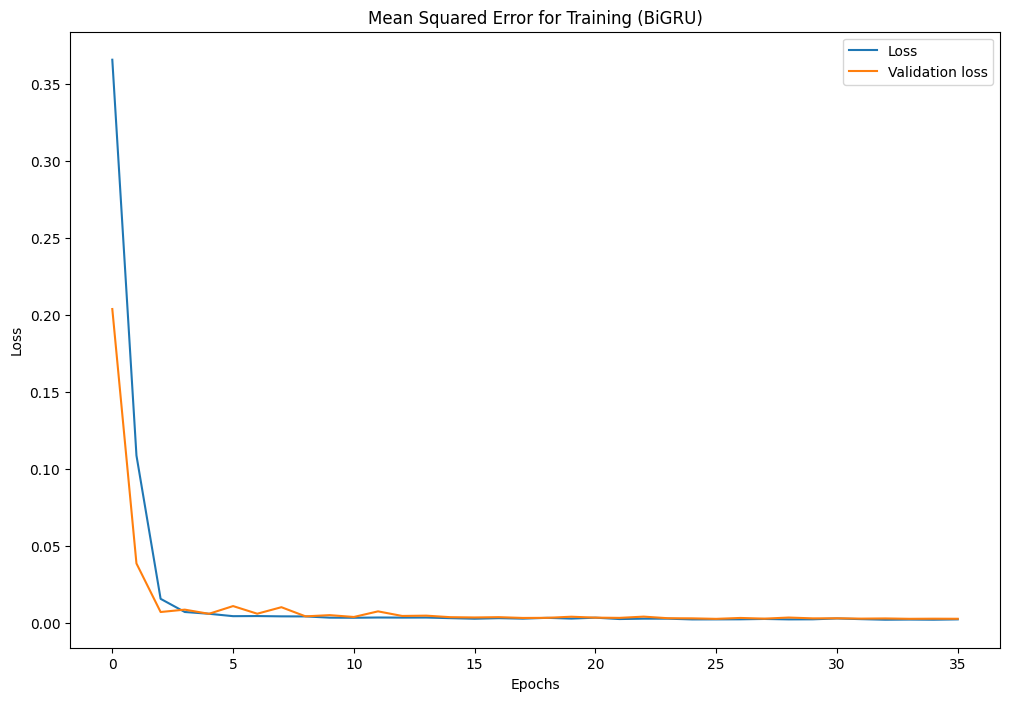

In [105]:
# Plot the loss for the training set.
plot_loss(train_result.history['loss'], train_result.history['val_loss'], "Mean Squared Error for Training (BiGRU)")

In [106]:
bigru_model_regularizers.evaluate(x=feature_test, y=label_test, verbose=1) # Now evaluate the model.

12/12 [==============================] - 0s 20ms/step - loss: 0.0025 - mean_squared_error: 0.0010 - mean_absolute_error: 0.0228 - root_mean_squared_error: 0.0320


[0.0025228403974324465,
 0.001025651814416051,
 0.02281288243830204,
 0.03202579915523529]

In [107]:
# Now try to predict the training and test values.
training_predict = bigru_model_regularizers.predict(feature_training)
test_predict = bigru_model_regularizers.predict(feature_test)

12/12 [==============================] - 0s 18ms/step


In [108]:
# Restore the training and test datasets' original shapes.
training_result_bigru = normalizer.inverse_transform(training_predict.reshape(-1, 1))
test_result_bigru = normalizer.inverse_transform(test_predict.reshape(-1, 1))

           Dates          Actual Price       Predicted Price
30    2017-12-09   [1201.841827525211]     [1182.3251953125]
31    2017-12-10  [1184.8400991863457]  [1188.7137451171875]
32    2017-12-11  [1224.1145485841962]   [1188.930908203125]
33    2017-12-12  [1297.0276373650145]   [1199.290283203125]
34    2017-12-13  [1324.4906040502817]    [1233.48876953125]
...          ...                   ...                   ...
1599  2022-03-27  [2709.4138716771517]   [2588.506103515625]
1600  2022-03-28  [2733.5177311196053]    [2625.39501953125]
1601  2022-03-29  [2768.4794493421177]    [2660.70458984375]
1602  2022-03-30  [2759.4760758914417]       [2678.54296875]
1603  2022-03-31   [2704.099092600401]   [2690.755126953125]

[1574 rows x 3 columns]


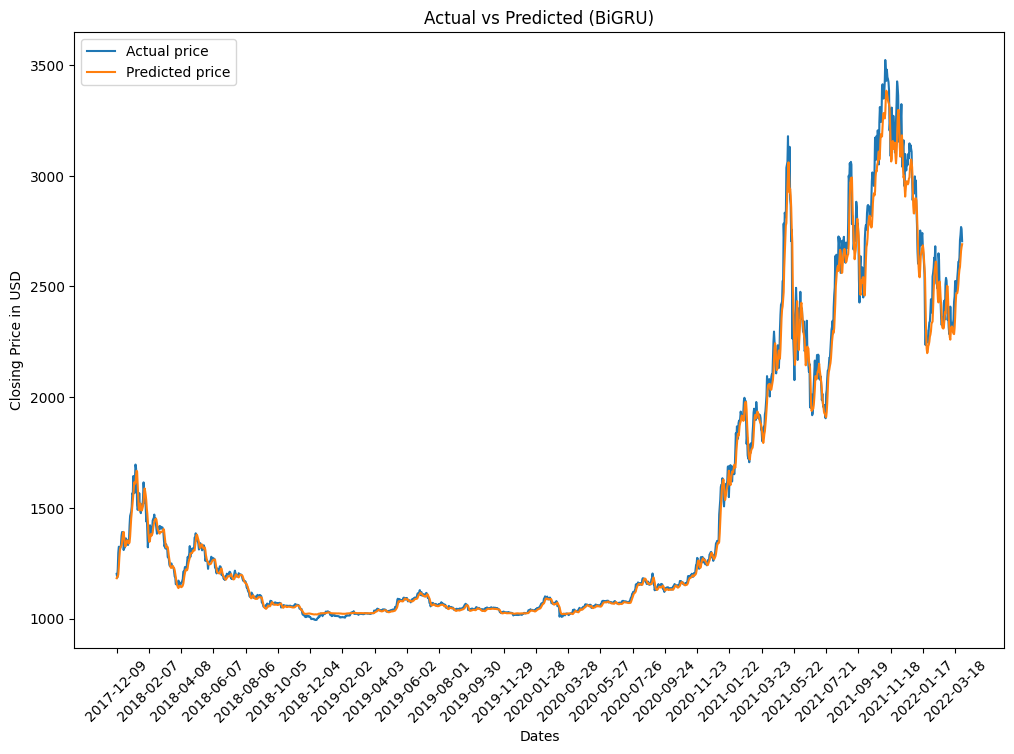

In [109]:
# Plot the obtained training prediction and compare with the actual training data.
plot_result_train(label_training, training_result_bigru, original_data, "Actual vs Predicted (BiGRU)")

           Dates          Actual Price       Predicted Price
1634  2022-05-01         [2827.756104]   [2732.999267578125]
1635  2022-05-02           [2857.4104]   [2706.604248046875]
1636  2022-05-03         [2783.476318]      [2717.533203125]
1637  2022-05-04         [2940.644775]   [2718.952392578125]
1638  2022-05-05         [2749.213135]   [2779.082763671875]
...          ...                   ...                   ...
1988  2023-04-20         [1943.097656]  [2024.3499755859375]
1989  2023-04-21         [1849.999878]     [1966.8955078125]
1990  2023-04-22  [1874.2286380000003]  [1896.1485595703125]
1991  2023-04-23         [1862.062012]      [1864.146484375]
1992  2023-04-24         [1833.186401]  [1849.2496337890625]

[359 rows x 3 columns]


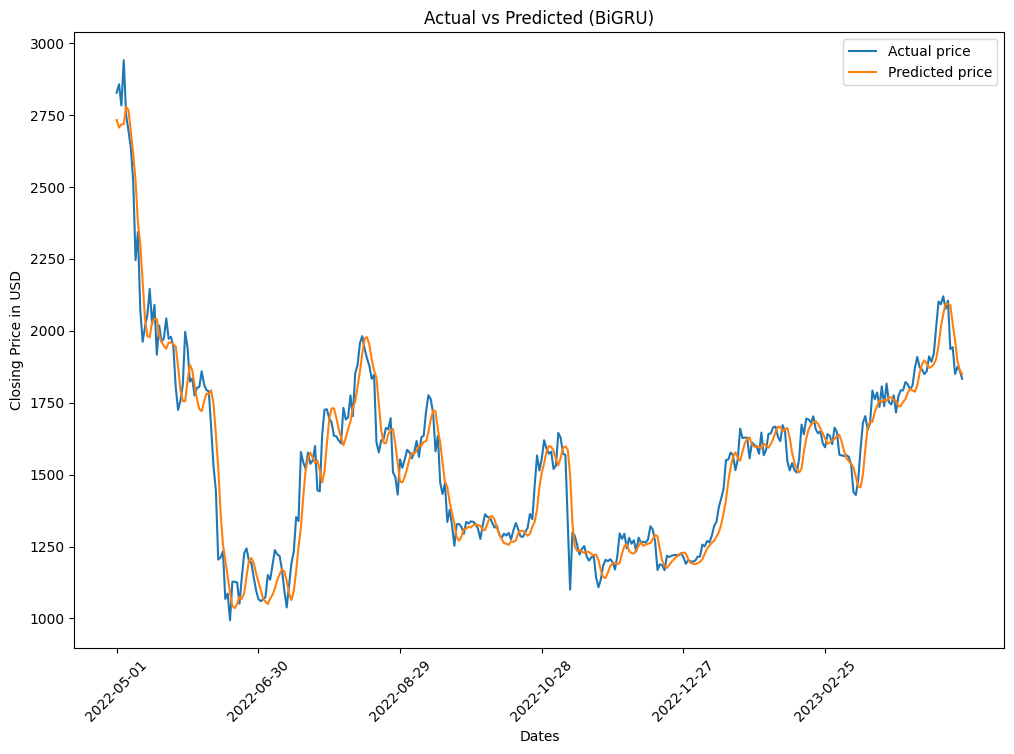

In [110]:
plot_result_test(label_test, test_result_bigru, label_training.shape[0], original_data, "Actual vs Predicted (BiGRU)")

In [111]:
tf.backend.clear_session() # Be sure to clear the backend session afterwards.

## 1-D CNN LSTM

In [112]:
cnn1d_lstm_model_regularizers = tf.models.Sequential()
cnn1d_lstm_model_regularizers.add(tf.layers.Conv1D(filters=30, kernel_size=3, activation='relu', kernel_regularizer="l1_l2", input_shape=(num_steps, 1)))
cnn1d_lstm_model_regularizers.add(tf.layers.Conv1D(filters=30, kernel_size=3))
cnn1d_lstm_model_regularizers.add(tf.layers.Conv1D(filters=30, kernel_size=3))
cnn1d_lstm_model_regularizers.add(tf.layers.AveragePooling1D())
cnn1d_lstm_model_regularizers.add(tf.layers.LSTM(units=128, activation='relu', kernel_regularizer="l1_l2", return_sequences=True))
cnn1d_lstm_model_regularizers.add(tf.layers.LSTM(units=128, return_sequences=True))
cnn1d_lstm_model_regularizers.add(tf.layers.LSTM(units=128))
cnn1d_lstm_model_regularizers.add(tf.layers.Flatten())
cnn1d_lstm_model_regularizers.add(tf.layers.Dense(1))
cnn1d_lstm_model_regularizers.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(),
                                      metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), tf.metrics.RootMeanSquaredError()])
cnn1d_lstm_model_regularizers.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 28, 30)            120       
                                                                 
 conv1d_1 (Conv1D)           (None, 26, 30)            2730      
                                                                 
 conv1d_2 (Conv1D)           (None, 24, 30)            2730      
                                                                 
 average_pooling1d (AverageP  (None, 12, 30)           0         
 ooling1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 12, 128)           81408     
                                                                 
 lstm_1 (LSTM)               (None, 12, 128)           131584    
                                                        

In [113]:
train_result = cnn1d_lstm_model_regularizers.fit(x=feature_training, y=label_training, validation_data=(feature_test, label_test),
                                  epochs=100, verbose=1, callbacks=[callback], shuffle=True) # Fit the model.

Epoch 1/100
50/50 [==============================] - 11s 54ms/step - loss: 5.3822 - mean_squared_error: 0.0115 - mean_absolute_error: 0.0638 - root_mean_squared_error: 0.1073 - val_loss: 2.5170 - val_mean_squared_error: 0.0139 - val_mean_absolute_error: 0.0896 - val_root_mean_squared_error: 0.1177
Epoch 2/100
50/50 [==============================] - 2s 37ms/step - loss: 1.0881 - mean_squared_error: 0.0045 - mean_absolute_error: 0.0444 - root_mean_squared_error: 0.0671 - val_loss: 0.1973 - val_mean_squared_error: 0.0132 - val_mean_absolute_error: 0.0896 - val_root_mean_squared_error: 0.1150
Epoch 3/100
50/50 [==============================] - 2s 35ms/step - loss: 0.1078 - mean_squared_error: 0.0080 - mean_absolute_error: 0.0602 - root_mean_squared_error: 0.0893 - val_loss: 0.0745 - val_mean_squared_error: 0.0143 - val_mean_absolute_error: 0.0909 - val_root_mean_squared_error: 0.1196
Epoch 4/100
50/50 [==============================] - 2s 36ms/step - loss: 0.0537 - mean_squared_error: 0.

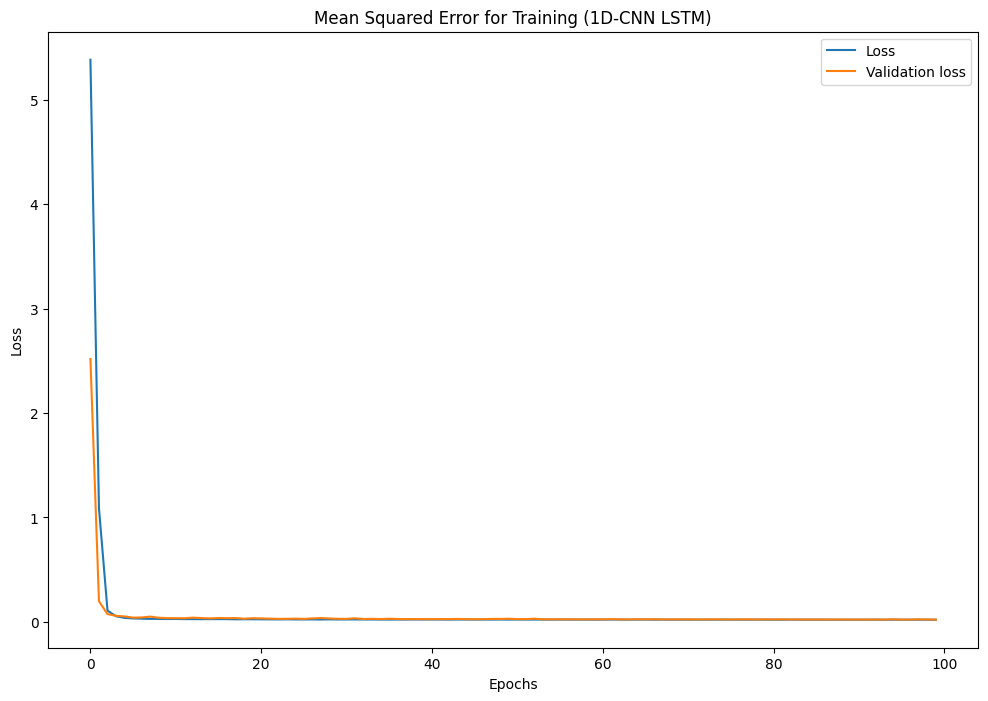

In [114]:
# Plot the loss for the training set.
plot_loss(train_result.history['loss'], train_result.history['val_loss'], "Mean Squared Error for Training (1D-CNN LSTM)")

In [115]:
cnn1d_lstm_model_regularizers.evaluate(x=feature_test, y=label_test, verbose=1) # Now evaluate the model.

12/12 [==============================] - 0s 7ms/step - loss: 0.0220 - mean_squared_error: 0.0024 - mean_absolute_error: 0.0377 - root_mean_squared_error: 0.0494


[0.022033490240573883,
 0.0024380632676184177,
 0.03765365853905678,
 0.049376748502254486]

In [116]:
# Now try to predict the training and test values.
training_predict = cnn1d_lstm_model_regularizers.predict(feature_training)
test_predict = cnn1d_lstm_model_regularizers.predict(feature_test)

12/12 [==============================] - 0s 6ms/step


In [117]:
# Restore the training and test datasets' original shapes.
training_result_cnn1d_lstm = normalizer.inverse_transform(training_predict.reshape(-1, 1))
test_result_cnn1d_lstm = normalizer.inverse_transform(test_predict.reshape(-1, 1))

           Dates          Actual Price       Predicted Price
30    2017-12-09   [1201.841827525211]  [1153.7430419921875]
31    2017-12-10  [1184.8400991863457]  [1152.1588134765625]
32    2017-12-11  [1224.1145485841962]      [1151.443359375]
33    2017-12-12  [1297.0276373650145]  [1152.8914794921875]
34    2017-12-13  [1324.4906040502817]  [1159.6033935546875]
...          ...                   ...                   ...
1599  2022-03-27  [2709.4138716771517]   [2552.023193359375]
1600  2022-03-28  [2733.5177311196053]    [2580.26611328125]
1601  2022-03-29  [2768.4794493421177]   [2610.066650390625]
1602  2022-03-30  [2759.4760758914417]   [2643.468505859375]
1603  2022-03-31   [2704.099092600401]   [2675.118896484375]

[1574 rows x 3 columns]


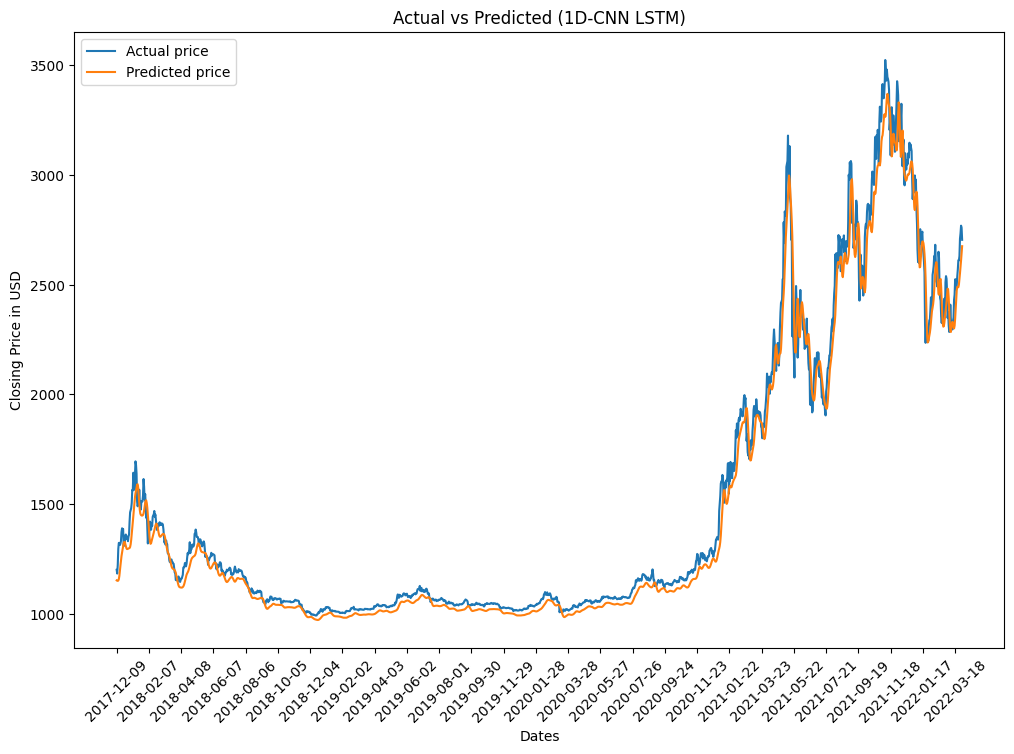

In [118]:
# Plot the obtained training prediction and compare with the actual training data.
plot_result_train(label_training, training_result_cnn1d_lstm, original_data, "Actual vs Predicted (1D-CNN LSTM)")

           Dates          Actual Price       Predicted Price
1634  2022-05-01         [2827.756104]     [2805.3974609375]
1635  2022-05-02           [2857.4104]   [2771.766845703125]
1636  2022-05-03         [2783.476318]   [2754.115478515625]
1637  2022-05-04         [2940.644775]       [2754.80859375]
1638  2022-05-05         [2749.213135]    [2778.44384765625]
...          ...                   ...                   ...
1988  2023-04-20         [1943.097656]    [2066.68408203125]
1989  2023-04-21         [1849.999878]  [2038.1434326171875]
1990  2023-04-22  [1874.2286380000003]   [1985.353271484375]
1991  2023-04-23         [1862.062012]  [1923.0491943359375]
1992  2023-04-24         [1833.186401]  [1871.0325927734375]

[359 rows x 3 columns]


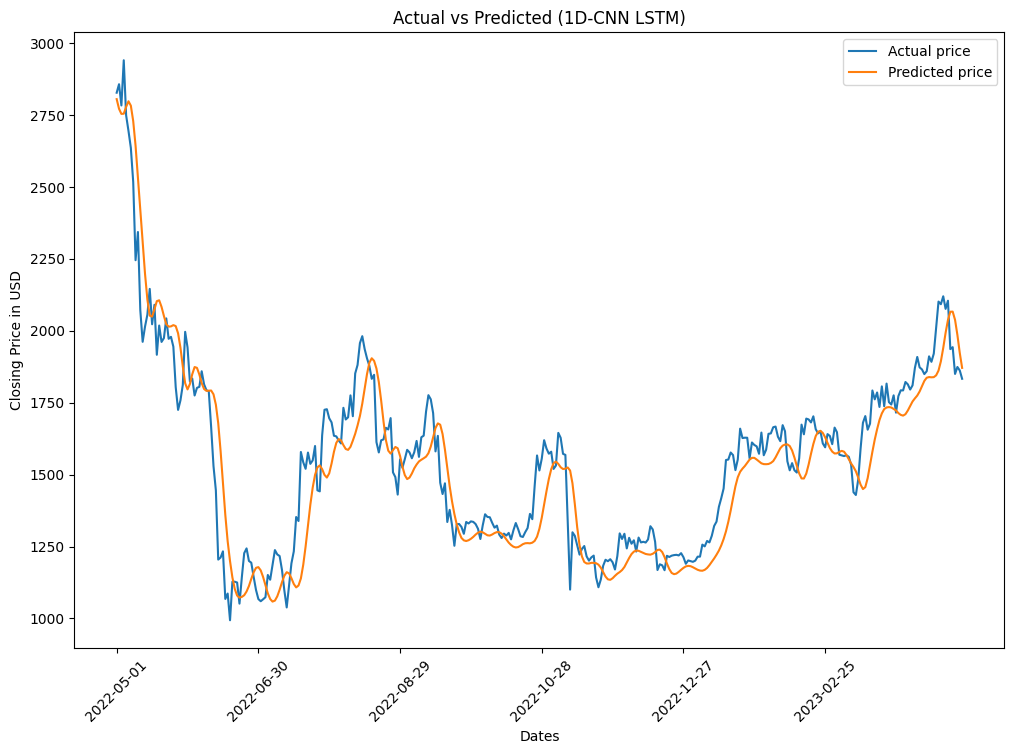

In [119]:
plot_result_test(label_test, test_result_cnn1d_lstm, label_training.shape[0], original_data, "Actual vs Predicted (1D-CNN LSTM)")

In [120]:
tf.backend.clear_session() # Be sure to clear the backend session afterwards.

## 1-D CNN GRU

In [121]:
cnn1d_gru_model_regularizers = tf.models.Sequential()
cnn1d_gru_model_regularizers.add(tf.layers.Conv1D(filters=30, kernel_size=3, activation='relu', kernel_regularizer="l1_l2", input_shape=(num_steps, 1)))
cnn1d_gru_model_regularizers.add(tf.layers.Conv1D(filters=30, kernel_size=3))
cnn1d_gru_model_regularizers.add(tf.layers.Conv1D(filters=30, kernel_size=3))
cnn1d_gru_model_regularizers.add(tf.layers.AveragePooling1D())
cnn1d_gru_model_regularizers.add(tf.layers.GRU(units=128, activation='relu', kernel_regularizer="l1_l2", return_sequences=True))
cnn1d_gru_model_regularizers.add(tf.layers.GRU(units=128, return_sequences=True))
cnn1d_gru_model_regularizers.add(tf.layers.GRU(units=128))
cnn1d_gru_model_regularizers.add(tf.layers.Flatten())
cnn1d_gru_model_regularizers.add(tf.layers.Dense(1))
cnn1d_gru_model_regularizers.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(),
                                     metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), tf.metrics.RootMeanSquaredError()])
cnn1d_gru_model_regularizers.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 28, 30)            120       
                                                                 
 conv1d_1 (Conv1D)           (None, 26, 30)            2730      
                                                                 
 conv1d_2 (Conv1D)           (None, 24, 30)            2730      
                                                                 
 average_pooling1d (AverageP  (None, 12, 30)           0         
 ooling1D)                                                       
                                                                 
 gru (GRU)                   (None, 12, 128)           61440     
                                                                 
 gru_1 (GRU)                 (None, 12, 128)           99072     
                                                        

In [122]:
train_result = cnn1d_gru_model_regularizers.fit(x=feature_training, y=label_training, validation_data=(feature_test, label_test),
                                  epochs=100, verbose=1, callbacks=[callback], shuffle=True) # Fit the model.

Epoch 1/100
50/50 [==============================] - 11s 83ms/step - loss: 4.9707 - mean_squared_error: 0.0131 - mean_absolute_error: 0.0652 - root_mean_squared_error: 0.1146 - val_loss: 2.6596 - val_mean_squared_error: 0.0090 - val_mean_absolute_error: 0.0690 - val_root_mean_squared_error: 0.0950
Epoch 2/100
50/50 [==============================] - 2s 43ms/step - loss: 1.3580 - mean_squared_error: 0.0032 - mean_absolute_error: 0.0373 - root_mean_squared_error: 0.0568 - val_loss: 0.3952 - val_mean_squared_error: 0.0092 - val_mean_absolute_error: 0.0728 - val_root_mean_squared_error: 0.0961
Epoch 3/100
50/50 [==============================] - 2s 42ms/step - loss: 0.1552 - mean_squared_error: 0.0066 - mean_absolute_error: 0.0553 - root_mean_squared_error: 0.0811 - val_loss: 0.0751 - val_mean_squared_error: 0.0094 - val_mean_absolute_error: 0.0731 - val_root_mean_squared_error: 0.0969
Epoch 4/100
50/50 [==============================] - 2s 42ms/step - loss: 0.0537 - mean_squared_error: 0.

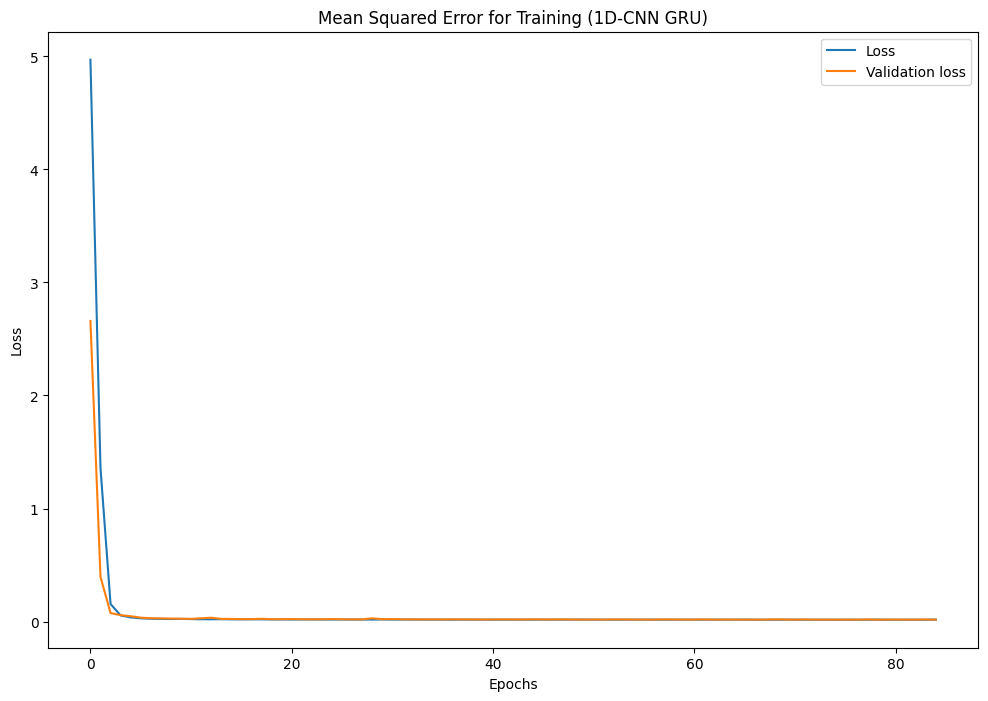

In [123]:
# Plot the loss for the training set.
plot_loss(train_result.history['loss'], train_result.history['val_loss'], "Mean Squared Error for Training (1D-CNN GRU)")

In [124]:
cnn1d_gru_model_regularizers.evaluate(x=feature_test, y=label_test, verbose=1) # Now evaluate the model.

12/12 [==============================] - 0s 7ms/step - loss: 0.0169 - mean_squared_error: 0.0014 - mean_absolute_error: 0.0264 - root_mean_squared_error: 0.0372


[0.016859296709299088,
 0.0013808143557980657,
 0.02638826332986355,
 0.037159308791160583]

In [125]:
# Now try to predict the training and test values.
training_predict = cnn1d_gru_model_regularizers.predict(feature_training)
test_predict = cnn1d_gru_model_regularizers.predict(feature_test)

12/12 [==============================] - 0s 8ms/step


In [126]:
# Restore the training and test datasets' original shapes.
training_result_cnn1d_gru = normalizer.inverse_transform(training_predict.reshape(-1, 1))
test_result_cnn1d_gru = normalizer.inverse_transform(test_predict.reshape(-1, 1))

In [127]:
# Plot the obtained training prediction and compare with the actual training data.
plot_result_train(label_training, training_result_cnn1d_gru, original_data, "Actual vs Predicted (1D-CNN GRU)")

           Dates          Actual Price       Predicted Price
30    2017-12-09   [1201.841827525211]   [1183.557373046875]
31    2017-12-10  [1184.8400991863457]   [1186.358154296875]
32    2017-12-11  [1224.1145485841962]   [1193.362548828125]
33    2017-12-12  [1297.0276373650145]  [1200.1468505859375]
34    2017-12-13  [1324.4906040502817]  [1217.8638916015625]
...          ...                   ...                   ...
1599  2022-03-27  [2709.4138716771517]       [2600.12890625]
1600  2022-03-28  [2733.5177311196053]   [2611.126220703125]
1601  2022-03-29  [2768.4794493421177]   [2651.804443359375]
1602  2022-03-30  [2759.4760758914417]   [2707.672119140625]
1603  2022-03-31   [2704.099092600401]   [2739.523681640625]

[1574 rows x 3 columns]


           Dates          Actual Price       Predicted Price
1634  2022-05-01         [2827.756104]   [2815.545654296875]
1635  2022-05-02           [2857.4104]    [2758.59423828125]
1636  2022-05-03         [2783.476318]   [2725.171630859375]
1637  2022-05-04         [2940.644775]   [2765.263916015625]
1638  2022-05-05         [2749.213135]   [2824.534912109375]
...          ...                   ...                   ...
1988  2023-04-20         [1943.097656]     [2060.2861328125]
1989  2023-04-21         [1849.999878]  [2008.2342529296875]
1990  2023-04-22  [1874.2286380000003]    [1936.98876953125]
1991  2023-04-23         [1862.062012]   [1878.134033203125]
1992  2023-04-24         [1833.186401]  [1859.8795166015625]

[359 rows x 3 columns]


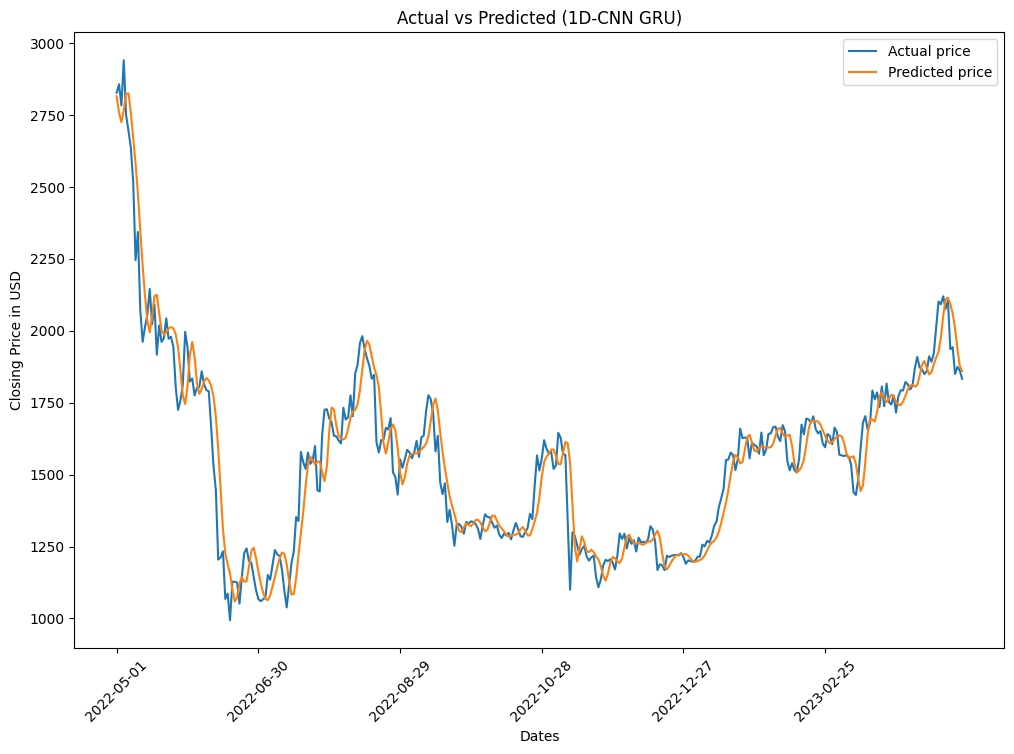

In [128]:
plot_result_test(label_test, test_result_cnn1d_gru, label_training.shape[0], original_data, "Actual vs Predicted (1D-CNN GRU)")

In [129]:
tf.backend.clear_session() # Be sure to clear the backend session afterwards.

# Model with Dropout and Regularizers

## BiLSTM

In [130]:
bilstm_model_dropout_regularizers = tf.models.Sequential()
bilstm_model_dropout_regularizers.add(tf.layers.Bidirectional(tf.layers.LSTM(units=128, activation='relu', input_shape=(num_steps, 1), kernel_regularizer="l1_l2", return_sequences=True)))
bilstm_model_dropout_regularizers.add(tf.layers.Dropout(0.2))
bilstm_model_dropout_regularizers.add(tf.layers.Bidirectional(tf.layers.LSTM(units=128, return_sequences=True)))
bilstm_model_dropout_regularizers.add(tf.layers.Dropout(0.2))
bilstm_model_dropout_regularizers.add(tf.layers.Bidirectional(tf.layers.LSTM(units=128, return_sequences=True)))
bilstm_model_dropout_regularizers.add(tf.layers.Dropout(0.2))
bilstm_model_dropout_regularizers.add(tf.layers.Bidirectional(tf.layers.LSTM(units=128, return_sequences=True)))
bilstm_model_dropout_regularizers.add(tf.layers.Dropout(0.2))
bilstm_model_dropout_regularizers.add(tf.layers.Bidirectional(tf.layers.LSTM(units=128)))
bilstm_model_dropout_regularizers.add(tf.layers.Dropout(0.2))
bilstm_model_dropout_regularizers.add(tf.layers.Dense(1))
bilstm_model_dropout_regularizers.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(),
                                          metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), tf.metrics.RootMeanSquaredError()])

In [131]:
train_result = bilstm_model_dropout_regularizers.fit(x=feature_training, y=label_training, validation_data=(feature_test, label_test),
                                  epochs=100, verbose=1, callbacks=[callback], shuffle=True) # Fit the model.

Epoch 1/100
50/50 [==============================] - 30s 211ms/step - loss: 0.3876 - mean_squared_error: 0.0096 - mean_absolute_error: 0.0556 - root_mean_squared_error: 0.0981 - val_loss: 0.1940 - val_mean_squared_error: 0.0079 - val_mean_absolute_error: 0.0664 - val_root_mean_squared_error: 0.0890
Epoch 2/100
50/50 [==============================] - 6s 123ms/step - loss: 0.0893 - mean_squared_error: 0.0036 - mean_absolute_error: 0.0409 - root_mean_squared_error: 0.0598 - val_loss: 0.0239 - val_mean_squared_error: 0.0064 - val_mean_absolute_error: 0.0640 - val_root_mean_squared_error: 0.0801
Epoch 3/100
50/50 [==============================] - 8s 167ms/step - loss: 0.0118 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0460 - root_mean_squared_error: 0.0627 - val_loss: 0.0112 - val_mean_squared_error: 0.0067 - val_mean_absolute_error: 0.0603 - val_root_mean_squared_error: 0.0819
Epoch 4/100
50/50 [==============================] - 6s 126ms/step - loss: 0.0075 - mean_squared_error

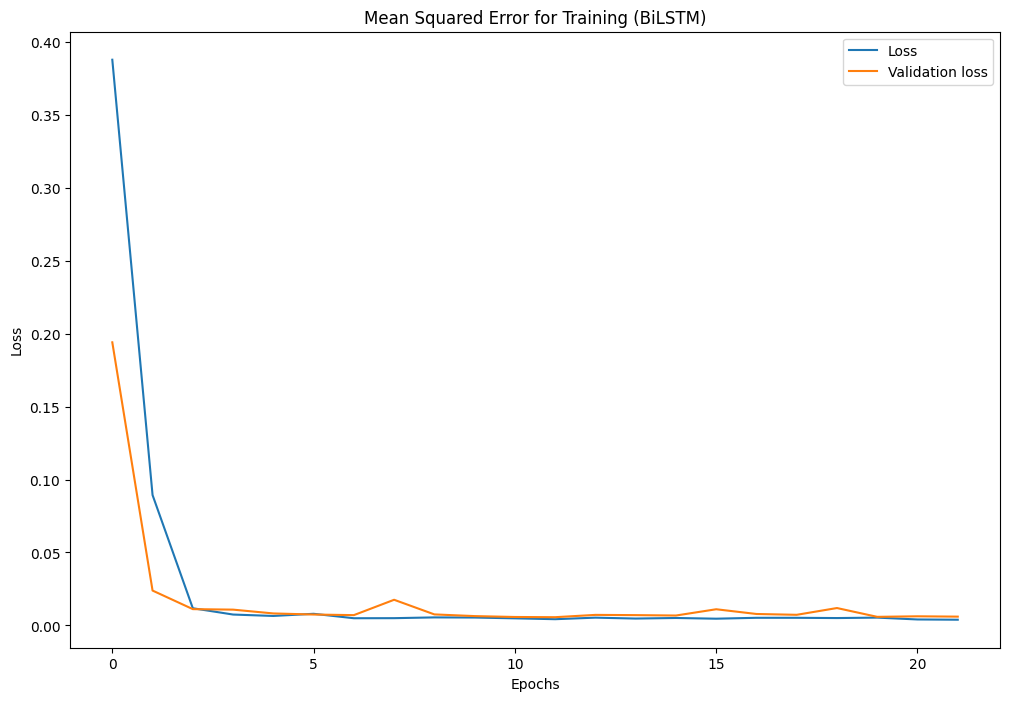

In [132]:
# Plot the loss for the training set.
plot_loss(train_result.history['loss'], train_result.history['val_loss'], "Mean Squared Error for Training (BiLSTM)")

In [133]:
bilstm_model_dropout_regularizers.evaluate(x=feature_test, y=label_test, verbose=1) # Now evaluate the model.

12/12 [==============================] - 0s 29ms/step - loss: 0.0057 - mean_squared_error: 0.0034 - mean_absolute_error: 0.0428 - root_mean_squared_error: 0.0586


[0.005670021288096905,
 0.0034359379205852747,
 0.04276059940457344,
 0.05861687287688255]

In [134]:
# Now try to predict the training and test values.
training_predict = bilstm_model_dropout_regularizers.predict(feature_training)
test_predict = bilstm_model_dropout_regularizers.predict(feature_test)

12/12 [==============================] - 0s 18ms/step


In [135]:
# Restore the training and test datasets' original shapes.
training_result_bilstm = normalizer.inverse_transform(training_predict.reshape(-1, 1))
test_result_bilstm = normalizer.inverse_transform(test_predict.reshape(-1, 1))

           Dates          Actual Price       Predicted Price
30    2017-12-09   [1201.841827525211]   [1242.052490234375]
31    2017-12-10  [1184.8400991863457]   [1243.408935546875]
32    2017-12-11  [1224.1145485841962]   [1243.301025390625]
33    2017-12-12  [1297.0276373650145]     [1246.2216796875]
34    2017-12-13  [1324.4906040502817]  [1255.0450439453125]
...          ...                   ...                   ...
1599  2022-03-27  [2709.4138716771517]    [2457.67431640625]
1600  2022-03-28  [2733.5177311196053]   [2478.857666015625]
1601  2022-03-29  [2768.4794493421177]   [2500.406494140625]
1602  2022-03-30  [2759.4760758914417]     [2523.0458984375]
1603  2022-03-31   [2704.099092600401]        [2542.8359375]

[1574 rows x 3 columns]


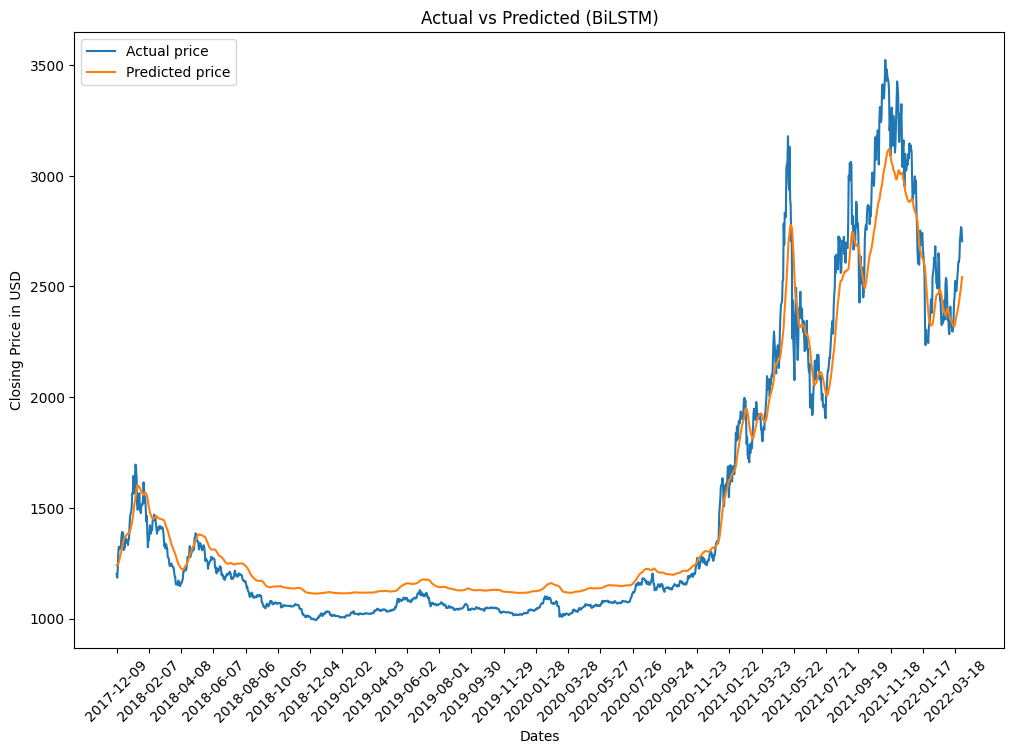

In [136]:
# Plot the obtained training prediction and compare with the actual training data.
plot_result_train(label_training, training_result_bilstm, original_data, "Actual vs Predicted (BiLSTM)")

           Dates          Actual Price       Predicted Price
1634  2022-05-01         [2827.756104]   [2763.405029296875]
1635  2022-05-02           [2857.4104]       [2751.89453125]
1636  2022-05-03         [2783.476318]    [2744.42626953125]
1637  2022-05-04         [2940.644775]    [2732.36083984375]
1638  2022-05-05         [2749.213135]     [2734.5849609375]
...          ...                   ...                   ...
1988  2023-04-20         [1943.097656]  [2006.4395751953125]
1989  2023-04-21         [1849.999878]  [2005.9083251953125]
1990  2023-04-22  [1874.2286380000003]  [1995.0792236328125]
1991  2023-04-23         [1862.062012]   [1985.482666015625]
1992  2023-04-24         [1833.186401]  [1974.3494873046875]

[359 rows x 3 columns]


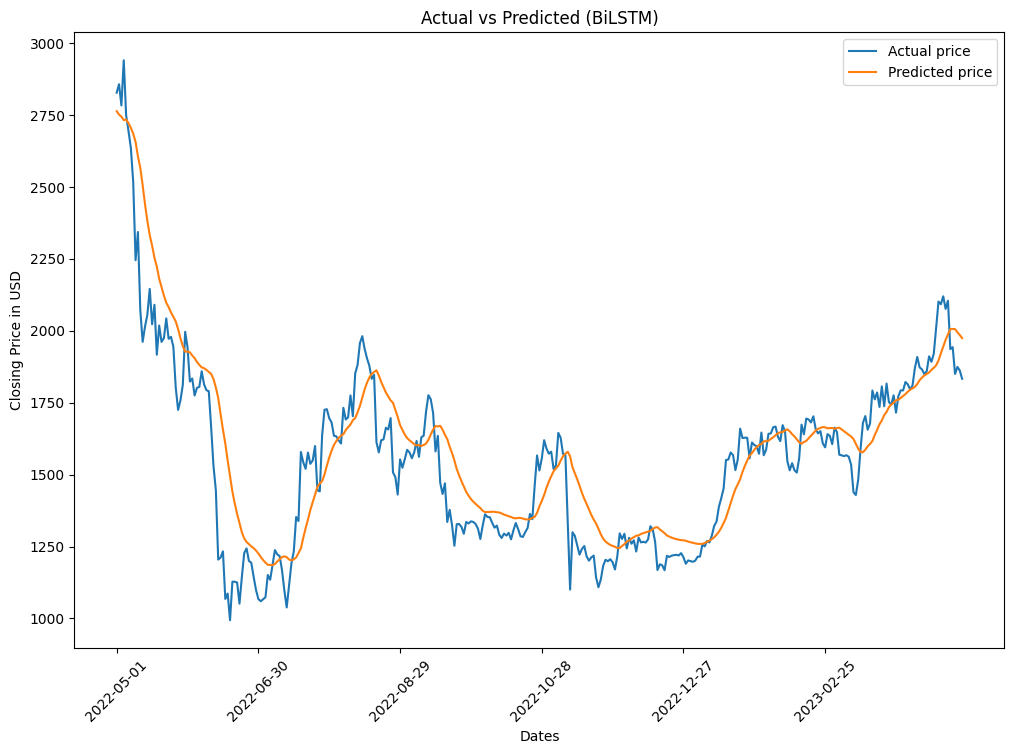

In [137]:
plot_result_test(label_test, test_result_bilstm, label_training.shape[0], original_data, "Actual vs Predicted (BiLSTM)")

In [138]:
tf.backend.clear_session() # Be sure to clear the backend session afterwards.

## BiGRU

In [139]:
bigru_model_dropout_regularizers = tf.models.Sequential()
bigru_model_dropout_regularizers.add(tf.layers.Bidirectional(tf.layers.GRU(units=128, activation='relu', input_shape=(num_steps, 1), kernel_regularizer="l1_l2", return_sequences=True)))
bigru_model_dropout_regularizers.add(tf.layers.Dropout(0.2))
bigru_model_dropout_regularizers.add(tf.layers.Bidirectional(tf.layers.GRU(units=128, return_sequences=True)))
bigru_model_dropout_regularizers.add(tf.layers.Dropout(0.2))
bigru_model_dropout_regularizers.add(tf.layers.Bidirectional(tf.layers.GRU(units=128, return_sequences=True)))
bigru_model_dropout_regularizers.add(tf.layers.Dropout(0.2))
bigru_model_dropout_regularizers.add(tf.layers.Bidirectional(tf.layers.GRU(units=128, return_sequences=True)))
bigru_model_dropout_regularizers.add(tf.layers.Dropout(0.2))
bigru_model_dropout_regularizers.add(tf.layers.Bidirectional(tf.layers.GRU(units=128)))
bigru_model_dropout_regularizers.add(tf.layers.Dropout(0.2))
bigru_model_dropout_regularizers.add(tf.layers.Dense(1))
bigru_model_dropout_regularizers.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(),
                                         metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), tf.metrics.RootMeanSquaredError()])

In [140]:
train_result = bigru_model_dropout_regularizers.fit(x=feature_training, y=label_training, validation_data=(feature_test, label_test),
                                  epochs=100, verbose=1, callbacks=[callback], shuffle=True) # Fit the model.

Epoch 1/100
50/50 [==============================] - 33s 208ms/step - loss: 0.3635 - mean_squared_error: 0.0090 - mean_absolute_error: 0.0576 - root_mean_squared_error: 0.0950 - val_loss: 0.2056 - val_mean_squared_error: 0.0054 - val_mean_absolute_error: 0.0520 - val_root_mean_squared_error: 0.0732
Epoch 2/100
50/50 [==============================] - 9s 186ms/step - loss: 0.1086 - mean_squared_error: 0.0020 - mean_absolute_error: 0.0308 - root_mean_squared_error: 0.0449 - val_loss: 0.0374 - val_mean_squared_error: 0.0033 - val_mean_absolute_error: 0.0408 - val_root_mean_squared_error: 0.0575
Epoch 3/100
50/50 [==============================] - 10s 196ms/step - loss: 0.0156 - mean_squared_error: 0.0025 - mean_absolute_error: 0.0371 - root_mean_squared_error: 0.0504 - val_loss: 0.0174 - val_mean_squared_error: 0.0124 - val_mean_absolute_error: 0.0955 - val_root_mean_squared_error: 0.1112
Epoch 4/100
50/50 [==============================] - 8s 150ms/step - loss: 0.0098 - mean_squared_erro

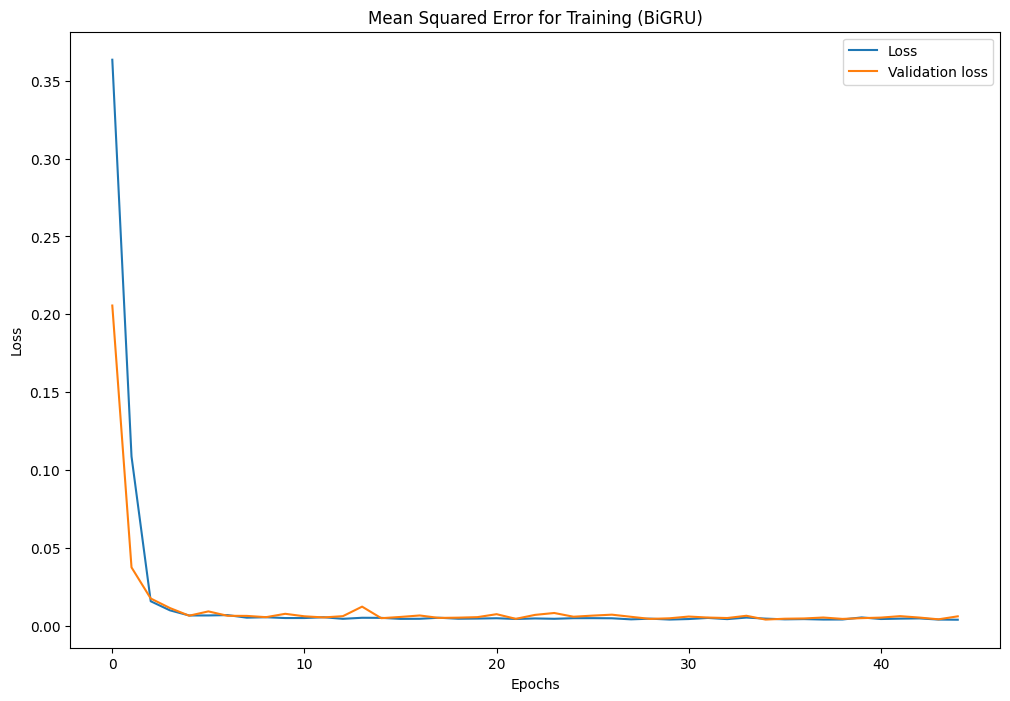

In [141]:
# Plot the loss for the training set.
plot_loss(train_result.history['loss'], train_result.history['val_loss'], "Mean Squared Error for Training (BiGRU)")

In [142]:
bigru_model_dropout_regularizers.evaluate(x=feature_test, y=label_test, verbose=1) # Now evaluate the model.

12/12 [==============================] - 0s 23ms/step - loss: 0.0038 - mean_squared_error: 0.0018 - mean_absolute_error: 0.0300 - root_mean_squared_error: 0.0423


[0.0038362827617675066,
 0.0017900875536724925,
 0.03000553511083126,
 0.04230942577123642]

In [143]:
# Now try to predict the training and test values.
training_predict = bigru_model_dropout_regularizers.predict(feature_training)
test_predict = bigru_model_dropout_regularizers.predict(feature_test)

12/12 [==============================] - 0s 21ms/step


In [144]:
# Restore the training and test datasets' original shapes.
training_result_bigru = normalizer.inverse_transform(training_predict.reshape(-1, 1))
test_result_bigru = normalizer.inverse_transform(test_predict.reshape(-1, 1))

           Dates          Actual Price       Predicted Price
30    2017-12-09   [1201.841827525211]   [1195.522705078125]
31    2017-12-10  [1184.8400991863457]    [1197.89794921875]
32    2017-12-11  [1224.1145485841962]  [1197.5826416015625]
33    2017-12-12  [1297.0276373650145]  [1204.0247802734375]
34    2017-12-13  [1324.4906040502817]  [1223.5653076171875]
...          ...                   ...                   ...
1599  2022-03-27  [2709.4138716771517]   [2501.839111328125]
1600  2022-03-28  [2733.5177311196053]   [2527.169677734375]
1601  2022-03-29  [2768.4794493421177]   [2553.052978515625]
1602  2022-03-30  [2759.4760758914417]      [2579.658203125]
1603  2022-03-31   [2704.099092600401]    [2600.79541015625]

[1574 rows x 3 columns]


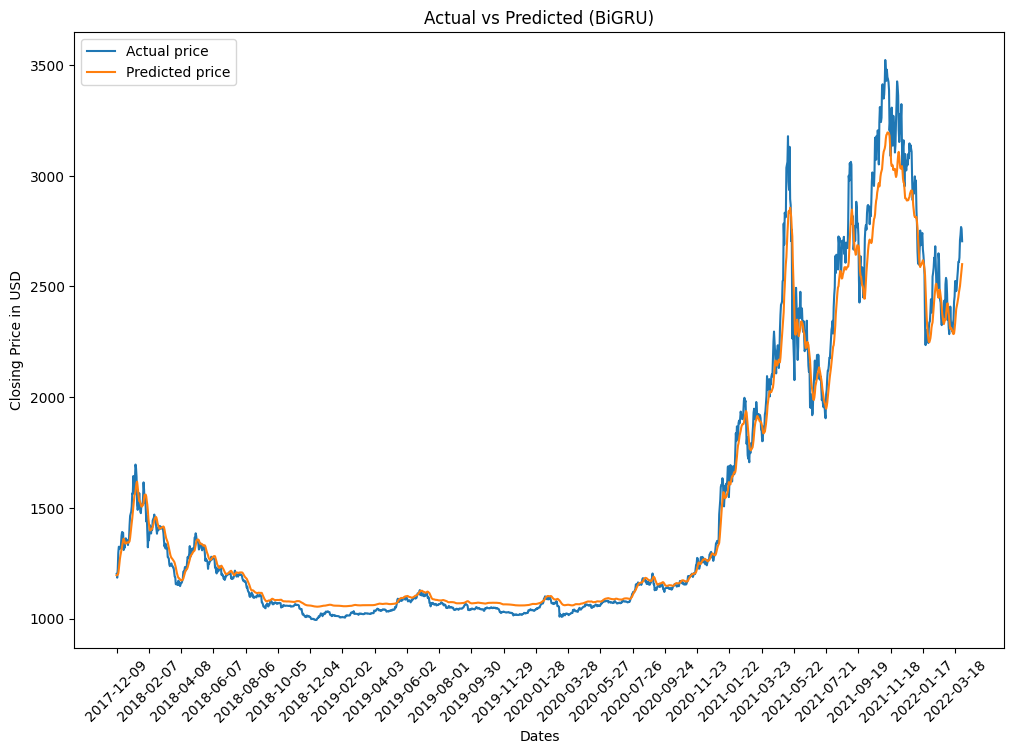

In [145]:
# Plot the obtained training prediction and compare with the actual training data.
plot_result_train(label_training, training_result_bigru, original_data, "Actual vs Predicted (BiGRU)")

           Dates          Actual Price       Predicted Price
1634  2022-05-01         [2827.756104]   [2717.133544921875]
1635  2022-05-02           [2857.4104]    [2705.27099609375]
1636  2022-05-03         [2783.476318]       [2705.43359375]
1637  2022-05-04         [2940.644775]       [2696.52734375]
1638  2022-05-05         [2749.213135]     [2717.5947265625]
...          ...                   ...                   ...
1988  2023-04-20         [1943.097656]  [2014.7489013671875]
1989  2023-04-21         [1849.999878]   [1993.264404296875]
1990  2023-04-22  [1874.2286380000003]    [1956.16357421875]
1991  2023-04-23         [1862.062012]  [1928.0711669921875]
1992  2023-04-24         [1833.186401]   [1903.855224609375]

[359 rows x 3 columns]


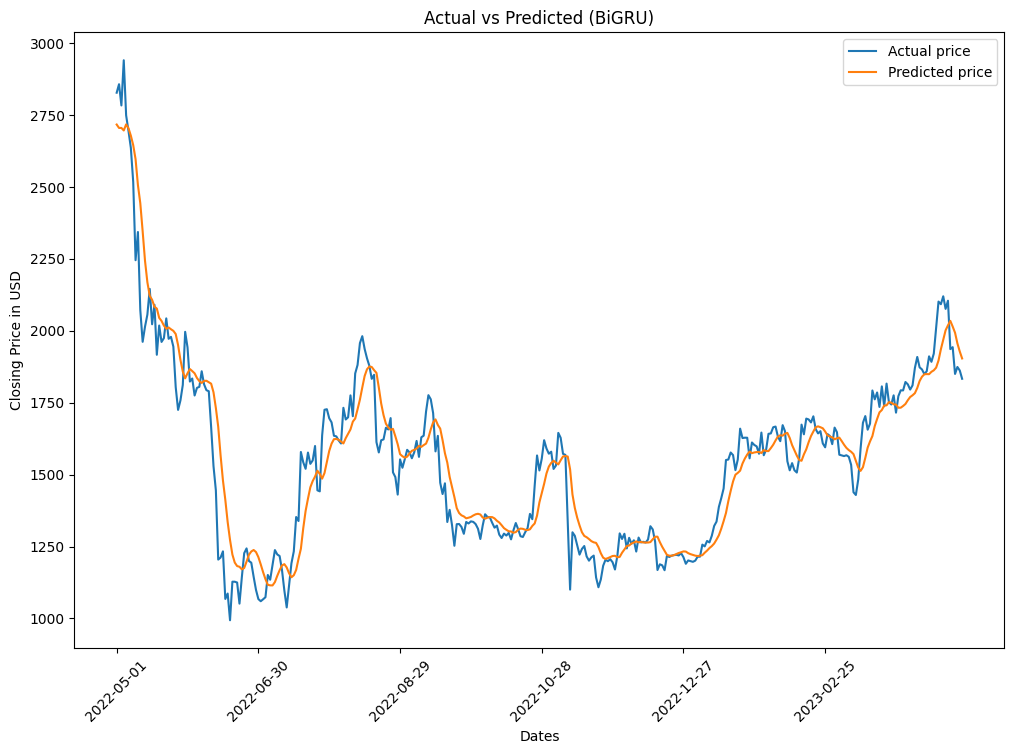

In [146]:
plot_result_test(label_test, test_result_bigru, label_training.shape[0], original_data, "Actual vs Predicted (BiGRU)")

In [147]:
tf.backend.clear_session() # Be sure to clear the backend session afterwards.

## 1-D CNN LSTM

In [148]:
cnn1d_lstm_model_dropout_regularizers = tf.models.Sequential()
cnn1d_lstm_model_dropout_regularizers.add(tf.layers.Conv1D(filters=30, kernel_size=3, activation='relu', kernel_regularizer="l1_l2", input_shape=(num_steps, 1)))
cnn1d_lstm_model_dropout_regularizers.add(tf.layers.Dropout(0.2))
cnn1d_lstm_model_dropout_regularizers.add(tf.layers.Conv1D(filters=30, kernel_size=3))
cnn1d_lstm_model_dropout_regularizers.add(tf.layers.Dropout(0.2))
cnn1d_lstm_model_dropout_regularizers.add(tf.layers.Conv1D(filters=30, kernel_size=3))
cnn1d_lstm_model_dropout_regularizers.add(tf.layers.Dropout(0.2))
cnn1d_lstm_model_dropout_regularizers.add(tf.layers.AveragePooling1D())
cnn1d_lstm_model_dropout_regularizers.add(tf.layers.LSTM(units=128, activation='relu', kernel_regularizer="l1_l2", return_sequences=True))
cnn1d_lstm_model_dropout_regularizers.add(tf.layers.Dropout(0.2))
cnn1d_lstm_model_dropout_regularizers.add(tf.layers.LSTM(units=128, return_sequences=True))
cnn1d_lstm_model_dropout_regularizers.add(tf.layers.Dropout(0.2))
cnn1d_lstm_model_dropout_regularizers.add(tf.layers.LSTM(units=128))
cnn1d_lstm_model_dropout_regularizers.add(tf.layers.Dropout(0.2))
cnn1d_lstm_model_dropout_regularizers.add(tf.layers.Flatten())
cnn1d_lstm_model_dropout_regularizers.add(tf.layers.Dense(1))
cnn1d_lstm_model_dropout_regularizers.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(),
                                              metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), tf.metrics.RootMeanSquaredError()])
cnn1d_lstm_model_dropout_regularizers.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 28, 30)            120       
                                                                 
 dropout (Dropout)           (None, 28, 30)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 26, 30)            2730      
                                                                 
 dropout_1 (Dropout)         (None, 26, 30)            0         
                                                                 
 conv1d_2 (Conv1D)           (None, 24, 30)            2730      
                                                                 
 dropout_2 (Dropout)         (None, 24, 30)            0         
                                                                 
 average_pooling1d (AverageP  (None, 12, 30)           0

In [149]:
train_result = cnn1d_lstm_model_dropout_regularizers.fit(x=feature_training, y=label_training, validation_data=(feature_test, label_test),
                                  epochs=100, verbose=1, callbacks=[callback], shuffle=True) # Fit the model.

Epoch 1/100
50/50 [==============================] - 11s 93ms/step - loss: 5.4351 - mean_squared_error: 0.0175 - mean_absolute_error: 0.0747 - root_mean_squared_error: 0.1325 - val_loss: 2.5433 - val_mean_squared_error: 0.0106 - val_mean_absolute_error: 0.0798 - val_root_mean_squared_error: 0.1029
Epoch 2/100
50/50 [==============================] - 2s 39ms/step - loss: 1.0985 - mean_squared_error: 0.0049 - mean_absolute_error: 0.0448 - root_mean_squared_error: 0.0702 - val_loss: 0.1962 - val_mean_squared_error: 0.0120 - val_mean_absolute_error: 0.0864 - val_root_mean_squared_error: 0.1095
Epoch 3/100
50/50 [==============================] - 2s 40ms/step - loss: 0.1027 - mean_squared_error: 0.0068 - mean_absolute_error: 0.0566 - root_mean_squared_error: 0.0822 - val_loss: 0.0865 - val_mean_squared_error: 0.0287 - val_mean_absolute_error: 0.1284 - val_root_mean_squared_error: 0.1693
Epoch 4/100
50/50 [==============================] - 2s 37ms/step - loss: 0.0527 - mean_squared_error: 0.

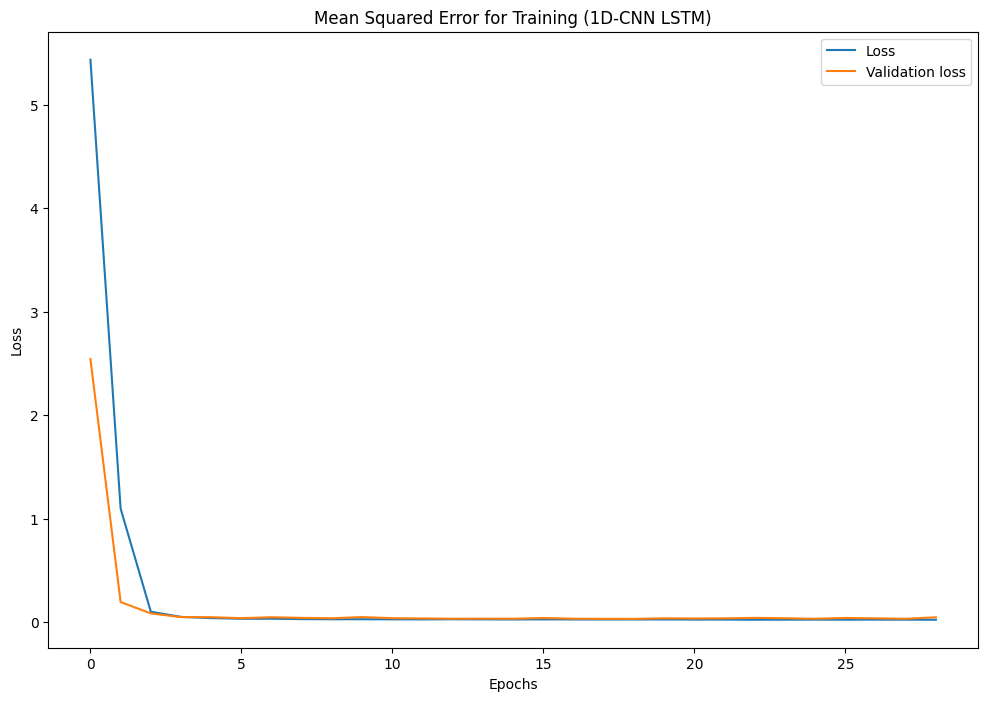

In [150]:
# Plot the loss for the training set.
plot_loss(train_result.history['loss'], train_result.history['val_loss'], "Mean Squared Error for Training (1D-CNN LSTM)")

In [151]:
cnn1d_lstm_model_dropout_regularizers.evaluate(x=feature_test, y=label_test, verbose=1) # Now evaluate the model.

12/12 [==============================] - 0s 7ms/step - loss: 0.0333 - mean_squared_error: 0.0113 - mean_absolute_error: 0.0875 - root_mean_squared_error: 0.1063


[0.03333278000354767,
 0.011305942200124264,
 0.08750515431165695,
 0.10632940381765366]

In [152]:
# Now try to predict the training and test values.
training_predict = cnn1d_lstm_model_dropout_regularizers.predict(feature_training)
test_predict = cnn1d_lstm_model_dropout_regularizers.predict(feature_test)

12/12 [==============================] - 0s 6ms/step


In [153]:
# Restore the training and test datasets' original shapes.
training_result_cnn1d_lstm = normalizer.inverse_transform(training_predict.reshape(-1, 1))
test_result_cnn1d_lstm = normalizer.inverse_transform(test_predict.reshape(-1, 1))

           Dates          Actual Price       Predicted Price
30    2017-12-09   [1201.841827525211]   [1070.293212890625]
31    2017-12-10  [1184.8400991863457]    [1073.46728515625]
32    2017-12-11  [1224.1145485841962]    [1076.48681640625]
33    2017-12-12  [1297.0276373650145]  [1079.3670654296875]
34    2017-12-13  [1324.4906040502817]  [1082.1561279296875]
...          ...                   ...                   ...
1599  2022-03-27  [2709.4138716771517]     [2190.6005859375]
1600  2022-03-28  [2733.5177311196053]    [2192.20751953125]
1601  2022-03-29  [2768.4794493421177]     [2194.7607421875]
1602  2022-03-30  [2759.4760758914417]    [2199.15478515625]
1603  2022-03-31   [2704.099092600401]   [2205.757568359375]

[1574 rows x 3 columns]


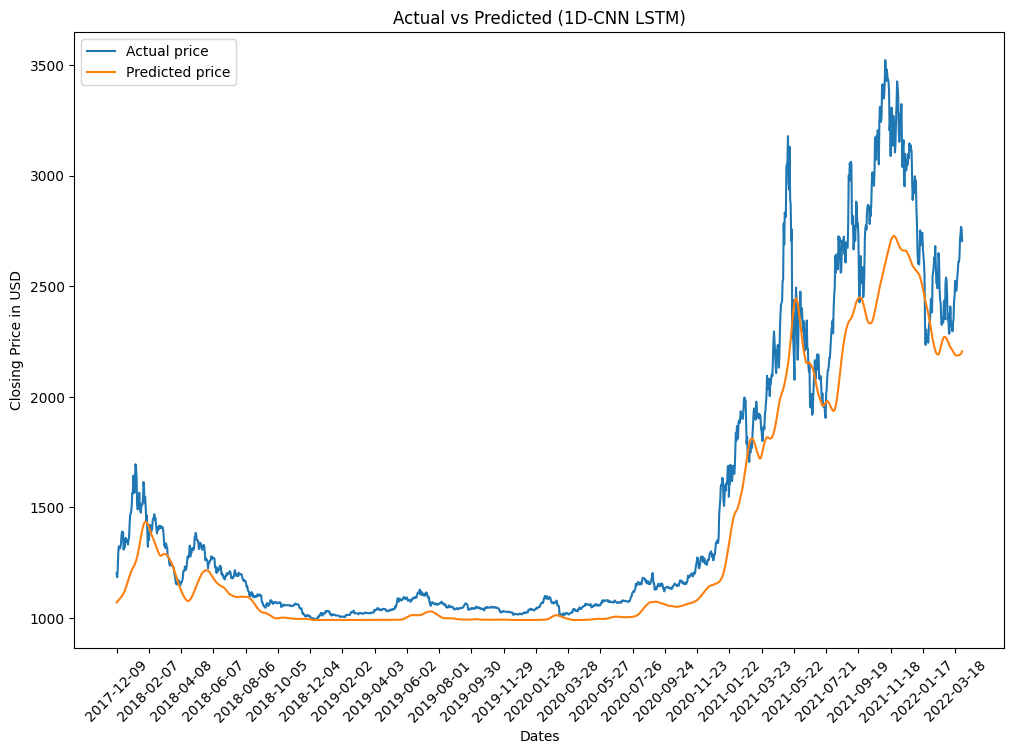

In [154]:
# Plot the obtained training prediction and compare with the actual training data.
plot_result_train(label_training, training_result_cnn1d_lstm, original_data, "Actual vs Predicted (1D-CNN LSTM)")

           Dates          Actual Price       Predicted Price
1634  2022-05-01         [2827.756104]   [2573.097412109375]
1635  2022-05-02           [2857.4104]     [2563.4111328125]
1636  2022-05-03         [2783.476318]   [2554.572509765625]
1637  2022-05-04         [2940.644775]   [2546.256591796875]
1638  2022-05-05         [2749.213135]    [2538.01806640625]
...          ...                   ...                   ...
1988  2023-04-20         [1943.097656]  [1739.6788330078125]
1989  2023-04-21         [1849.999878]    [1752.03955078125]
1990  2023-04-22  [1874.2286380000003]    [1765.35595703125]
1991  2023-04-23         [1862.062012]   [1779.263427734375]
1992  2023-04-24         [1833.186401]     [1792.8603515625]

[359 rows x 3 columns]


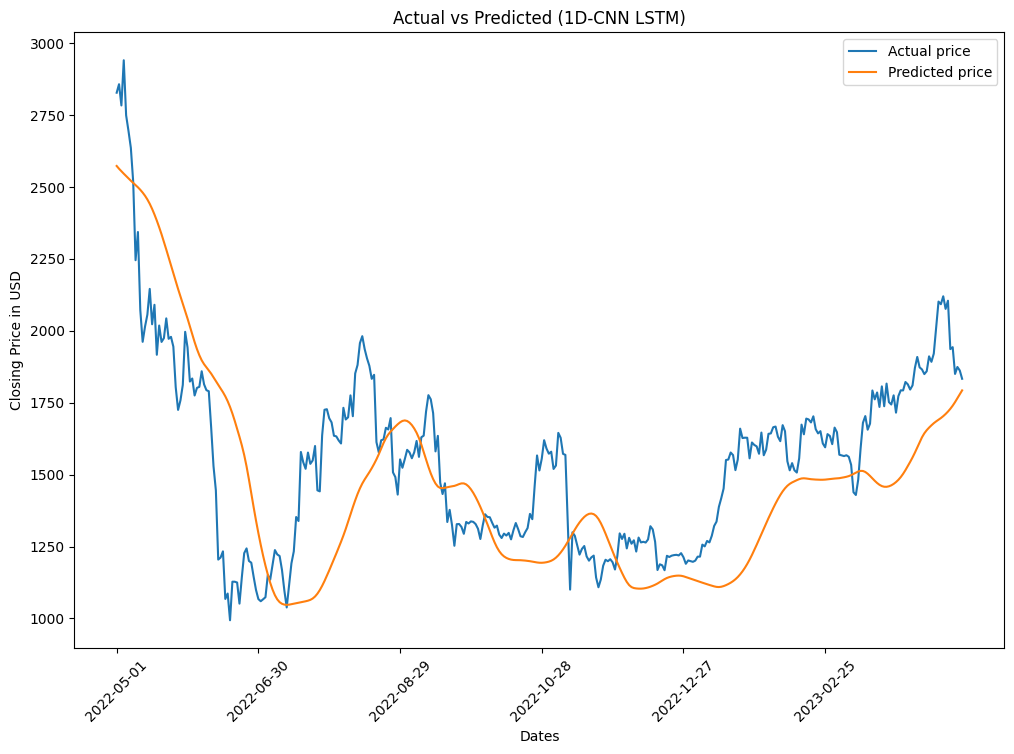

In [155]:
plot_result_test(label_test, test_result_cnn1d_lstm, label_training.shape[0], original_data, "Actual vs Predicted (1D-CNN LSTM)")

In [156]:
tf.backend.clear_session() # Be sure to clear the backend session afterwards.

## 1-D CNN GRU

In [157]:
cnn1d_gru_model_dropout_regularizers = tf.models.Sequential()
cnn1d_gru_model_dropout_regularizers.add(tf.layers.Conv1D(filters=30, kernel_size=3, activation='relu', kernel_regularizer="l1_l2", input_shape=(num_steps, 1)))
cnn1d_gru_model_dropout_regularizers.add(tf.layers.Dropout(0.2))
cnn1d_gru_model_dropout_regularizers.add(tf.layers.Conv1D(filters=30, kernel_size=3))
cnn1d_gru_model_dropout_regularizers.add(tf.layers.Dropout(0.2))
cnn1d_gru_model_dropout_regularizers.add(tf.layers.Conv1D(filters=30, kernel_size=3))
cnn1d_gru_model_dropout_regularizers.add(tf.layers.Dropout(0.2))
cnn1d_gru_model_dropout_regularizers.add(tf.layers.AveragePooling1D())
cnn1d_gru_model_dropout_regularizers.add(tf.layers.GRU(units=128, activation='relu', kernel_regularizer="l1_l2", return_sequences=True))
cnn1d_gru_model_dropout_regularizers.add(tf.layers.Dropout(0.2))
cnn1d_gru_model_dropout_regularizers.add(tf.layers.GRU(units=128, return_sequences=True))
cnn1d_gru_model_dropout_regularizers.add(tf.layers.Dropout(0.2))
cnn1d_gru_model_dropout_regularizers.add(tf.layers.GRU(units=128))
cnn1d_gru_model_dropout_regularizers.add(tf.layers.Dropout(0.2))
cnn1d_gru_model_dropout_regularizers.add(tf.layers.Flatten())
cnn1d_gru_model_dropout_regularizers.add(tf.layers.Dense(1))
cnn1d_gru_model_dropout_regularizers.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(),
                                             metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), tf.metrics.RootMeanSquaredError()])
cnn1d_gru_model_dropout_regularizers.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 28, 30)            120       
                                                                 
 dropout (Dropout)           (None, 28, 30)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 26, 30)            2730      
                                                                 
 dropout_1 (Dropout)         (None, 26, 30)            0         
                                                                 
 conv1d_2 (Conv1D)           (None, 24, 30)            2730      
                                                                 
 dropout_2 (Dropout)         (None, 24, 30)            0         
                                                                 
 average_pooling1d (AverageP  (None, 12, 30)           0

In [158]:
train_result = cnn1d_gru_model_dropout_regularizers.fit(x=feature_training, y=label_training, validation_data=(feature_test, label_test),
                                  epochs=100, verbose=1, callbacks=[callback], shuffle=True) # Fit the model.

Epoch 1/100
50/50 [==============================] - 10s 60ms/step - loss: 5.0084 - mean_squared_error: 0.0084 - mean_absolute_error: 0.0585 - root_mean_squared_error: 0.0914 - val_loss: 2.6776 - val_mean_squared_error: 0.0076 - val_mean_absolute_error: 0.0638 - val_root_mean_squared_error: 0.0873
Epoch 2/100
50/50 [==============================] - 2s 42ms/step - loss: 1.3552 - mean_squared_error: 0.0047 - mean_absolute_error: 0.0432 - root_mean_squared_error: 0.0682 - val_loss: 0.3758 - val_mean_squared_error: 0.0096 - val_mean_absolute_error: 0.0726 - val_root_mean_squared_error: 0.0978
Epoch 3/100
50/50 [==============================] - 4s 73ms/step - loss: 0.1374 - mean_squared_error: 0.0072 - mean_absolute_error: 0.0568 - root_mean_squared_error: 0.0847 - val_loss: 0.0599 - val_mean_squared_error: 0.0089 - val_mean_absolute_error: 0.0722 - val_root_mean_squared_error: 0.0944
Epoch 4/100
50/50 [==============================] - 3s 51ms/step - loss: 0.0465 - mean_squared_error: 0.

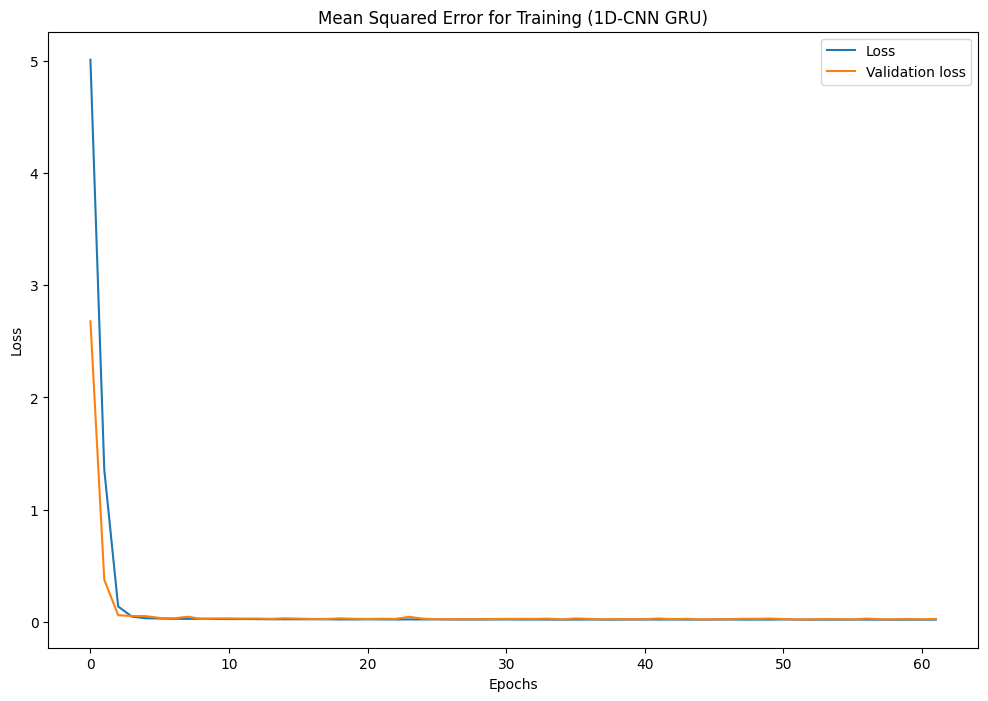

In [159]:
# Plot the loss for the training set.
plot_loss(train_result.history['loss'], train_result.history['val_loss'], "Mean Squared Error for Training (1D-CNN GRU)")

In [160]:
cnn1d_gru_model_dropout_regularizers.evaluate(x=feature_test, y=label_test, verbose=1) # Now evaluate the model.

12/12 [==============================] - 0s 11ms/step - loss: 0.0216 - mean_squared_error: 0.0050 - mean_absolute_error: 0.0528 - root_mean_squared_error: 0.0704


[0.0216374471783638,
 0.004962415434420109,
 0.0528307743370533,
 0.07044441252946854]

In [161]:
# Now try to predict the training and test values.
training_predict = cnn1d_gru_model_dropout_regularizers.predict(feature_training)
test_predict = cnn1d_gru_model_dropout_regularizers.predict(feature_test)

12/12 [==============================] - 0s 6ms/step


In [162]:
# Restore the training and test datasets' original shapes.
training_result_cnn1d_gru = normalizer.inverse_transform(training_predict.reshape(-1, 1))
test_result_cnn1d_gru = normalizer.inverse_transform(test_predict.reshape(-1, 1))

           Dates          Actual Price       Predicted Price
30    2017-12-09   [1201.841827525211]  [1179.1710205078125]
31    2017-12-10  [1184.8400991863457]  [1178.9381103515625]
32    2017-12-11  [1224.1145485841962]      [1178.548828125]
33    2017-12-12  [1297.0276373650145]    [1178.40673828125]
34    2017-12-13  [1324.4906040502817]  [1179.3035888671875]
...          ...                   ...                   ...
1599  2022-03-27  [2709.4138716771517]   [2381.848388671875]
1600  2022-03-28  [2733.5177311196053]      [2397.771484375]
1601  2022-03-29  [2768.4794493421177]   [2414.882080078125]
1602  2022-03-30  [2759.4760758914417]    [2433.50146484375]
1603  2022-03-31   [2704.099092600401]   [2453.355712890625]

[1574 rows x 3 columns]


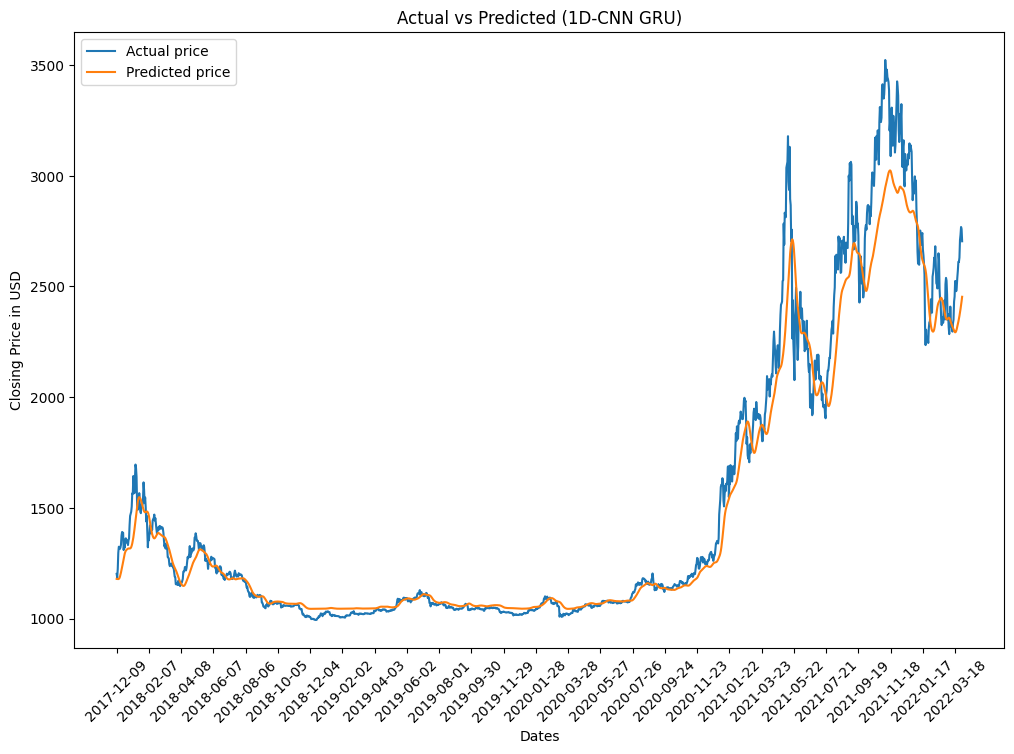

In [163]:
# Plot the obtained training prediction and compare with the actual training data.
plot_result_train(label_training, training_result_cnn1d_gru, original_data, "Actual vs Predicted (1D-CNN GRU)")

           Dates          Actual Price       Predicted Price
1634  2022-05-01         [2827.756104]      [2762.466796875]
1635  2022-05-02           [2857.4104]    [2749.92431640625]
1636  2022-05-03         [2783.476318]   [2737.084228515625]
1637  2022-05-04         [2940.644775]   [2724.748779296875]
1638  2022-05-05         [2749.213135]    [2714.45849609375]
...          ...                   ...                   ...
1988  2023-04-20         [1943.097656]     [1918.3583984375]
1989  2023-04-21         [1849.999878]  [1935.2615966796875]
1990  2023-04-22  [1874.2286380000003]    [1946.40185546875]
1991  2023-04-23         [1862.062012]     [1951.1982421875]
1992  2023-04-24         [1833.186401]    [1950.10400390625]

[359 rows x 3 columns]


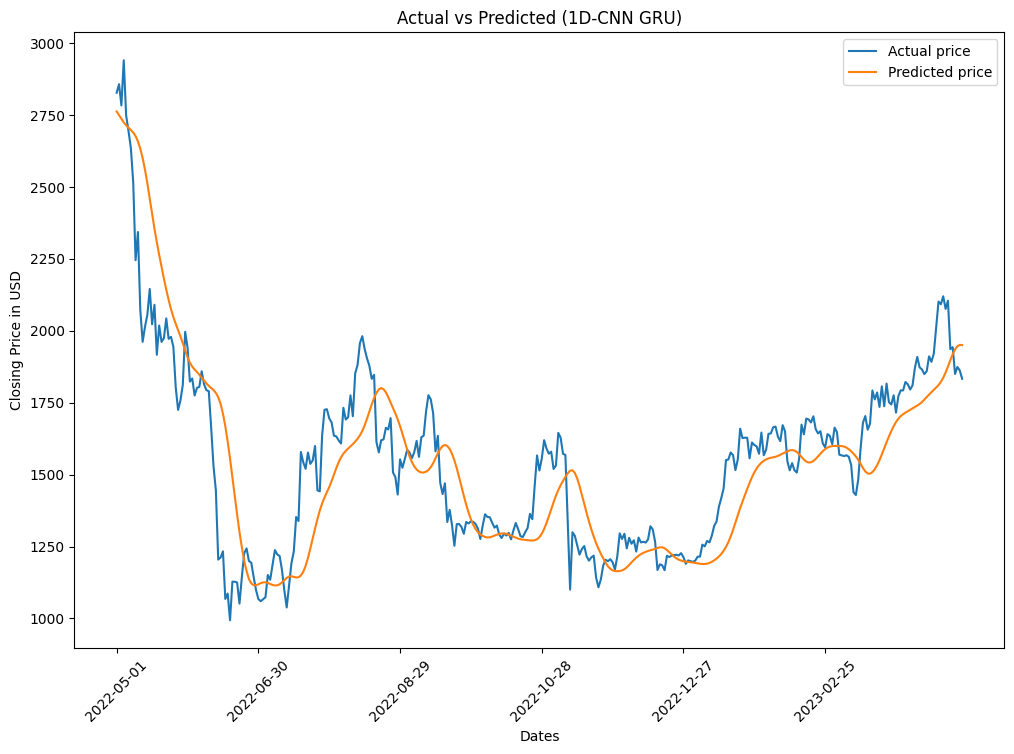

In [164]:
plot_result_test(label_test, test_result_cnn1d_gru, label_training.shape[0], original_data, "Actual vs Predicted (1D-CNN GRU)")

In [165]:
tf.backend.clear_session() # Be sure to clear the backend session afterwards.